In [1]:
library(ggplot2)
library(tidyverse)
library(rpart)
library(rpart.plot)
library(caret)
library(car)
library(sjPlot)
library(sjmisc)
library(gplots)
library(RColorBrewer)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ tibble  1.4.1     ✔ purrr   0.2.4
✔ tidyr   0.7.2     ✔ dplyr   0.7.4
✔ readr   1.1.1     ✔ stringr 1.2.0
✔ tibble  1.4.1     ✔ forcats 0.2.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
Loading required package: lattice

Attaching package: ‘caret’

The following object is masked from ‘package:purrr’:

    lift


Attaching package: ‘car’

The following object is masked from ‘package:dplyr’:

    recode

The following object is masked from ‘package:purrr’:

    some


Attaching package: ‘sjmisc’

The following object is masked from ‘package:purrr’:

    is_empty

The following object is masked from ‘package:tidyr’:

    replace_na


Attaching package: ‘gplots’

The following object is masked from ‘package:stats’:

    lowess



In [2]:
# Store all 10 dataframes into a list
years <- list()
for (i in 1:10) {
    name <- paste("year", as.character(i), "_linreg.csv", sep = "")
    years[[i]] <- read.csv(name, header=T)
    row.names(years[[i]]) <- years[[i]]$Company
    years[[i]] <- years[[i]][-1]
}

years[[1]]

Avg_Volume Volume_Change Logret_Change Marketcap_Change Degree_Centrality
A     1130264      231600     -0.0939467483 -0.0939467483    0.55474453       
AAL         0           0      0.0000000000  0.0000000000    0.00000000       
AAP    524078      245500     -0.0683157046 -0.0683157046    0.07542579       
AAPL 99622979   -96743094      0.0112107192  0.0112107192    0.16545012       
ABBV        0           0      0.0000000000  0.0000000000    0.00000000       
ABC   1278323      282000     -0.0334010898 -0.0334010898    0.09732360       
ABT   2548028      905900     -0.0003622317 -0.0003622317    0.06812652       
ACN   1297861      205100     -0.0368004192 -0.0368004192    0.24087591       
ADBE  3736770     -585758     -0.0165661735 -0.0165661735    0.50121655       
ADI         0           0      0.0000000000  0.0000000000    0.00000000       
ADM   2378248      -48700     -0.0688252192 -0.0688252192    0.08759124       
ADP   2165243     3061919     -0.0333484143 -0.0333484143    0.62530414       
ADS    514002     -214500      0.0015519753  0.0015519753    0.07542579       
ADSK  1896713      377635     -0.0435531816 -0.0435531816    0.14111922       
AEE    547467     -202600     -0.0467320607 -0.0467320607    0.33333333       
AEP   1051175     -270200     -0.0457120965 -0.0457120965    0.20437956       
AES   2212386     1970400     -0.1430452247 -0.1430452247    0.09489051       
AET   1537413     1085400     -0.1267601422 -0.1267601422    0.02676399       
AFL   1658559     1555900     -0.0399965607 -0.0399965607    0.04866180       
AGN    424330      369200     -0.0950552424 -0.0950552424    0.08759124       
AIG    606436      601660      0.0036344030  0.0036344030    0.00000000       
AIV   1151269     1392323     -0.0548812058 -0.0548812058    0.38929440       
AIZ    642800      154100     -0.0850861169 -0.0850861169    0.09975669       
AJG    378810      392400     -0.0199316474 -0.0199316474    0.00000000       
AKAM  2226503      620643     -0.0535723776 -0.0535723776    0.16301703       
ALB    383957       87600     -0.0435800293 -0.0435800293    0.63746959       
ALGN   345091     -205238     -0.0614570486 -0.0614570486    0.00000000       
ALK   1464893      101200     -0.0405957888 -0.0405957888    0.00243309       
ALL   1851810      713500     -0.0324610798 -0.0324610798    0.27007299       
ALLE        0           0      0.0000000000  0.0000000000    0.00000000       
⋮    ⋮          ⋮             ⋮             ⋮                ⋮                
VTR    976104    1076300      -0.075121992  -0.075121992     0.42092457       
VZ    5342788    2383900      -0.035219515  -0.035219515     0.35036496       
WAT    419338    -151100      -0.059717760  -0.059717760     0.02919708       
WBA         0          0       0.000000000   0.000000000     0.00000000       
WDC         0          0       0.000000000   0.000000000     0.00000000       
WEC    866511     135400      -0.040440539  -0.040440539     0.14598540       
WELL   783761    1023800      -0.073832006  -0.073832006     0.27250608       
WFC  12659236   14436000      -0.097569871  -0.097569871     0.19464720       
WHR    656572     329500      -0.054006092  -0.054006092     0.17274939       
WLTW        0          0       0.000000000   0.000000000     0.00000000       
WM    1382691     414300      -0.053567472  -0.053567472     0.30900243       
WMB   2595647    1577200      -0.132538718  -0.132538718     0.36496350       
WMT   6574900   -1142700      -0.030703685  -0.030703685     0.10218978       
WRK         0          0       0.000000000   0.000000000     0.00000000       
WU    1985509     308100      -0.051767874  -0.051767874     0.10218978       
WY    2345325     533885      -0.113318859  -0.113318859     0.45742092       
WYN    893381     707100      -0.124727742  -0.124727742     0.15571776       
WYNN  1130316     726668      -0.152375563  -0.152375563     0.09489051       
XEC    512994     -79100      -0.149690084  -0.14969008

In [3]:
# Calculate change in degree centrality between year i and year i-1 for each stock
for (i in 1:length(years)) {
    if (i==length(years)) {
        break
    } else if (i!=1) {
        years[[i]]$Change_Deg_Centr <- years[[i+1]]$Degree_Centrality - years[[i]]$Degree_Centrality - years[[i-1]]$Degree_Centrality
        years[[i]]$Stays_In_Network <- years[[i+1]]$Clustering_Coefficient
        years[[i]]$Stays_In_Network <- ifelse(!is.na(years[[i]]$Stays_In_Network), 1, 0)
            } else {
        years[[i]]$Change_Deg_Centr <- years[[i+1]]$Degree_Centrality - years[[i]]$Degree_Centrality
        years[[i]]$Stays_In_Network <- years[[i+1]]$Clustering_Coefficient
        years[[i]]$Stays_In_Network <- ifelse(!is.na(years[[i]]$Stays_In_Network), 1, 0)
    }
        } 

years[[4]]

Avg_Volume Volume_Change Logret_Change Marketcap_Change Degree_Centrality
A      975123     -460114     -0.042288113  -0.042288113     0.744779582      
AAL         0           0      0.000000000   0.000000000     0.000000000      
AAP    360176     -133917     -0.014138234  -0.014138234     0.002320186      
AAPL 29448755   -23485931     -0.019603816  -0.019603816     0.006960557      
ABBV        0           0      0.000000000   0.000000000     0.000000000      
ABC    735672     -166638     -0.031255406  -0.031255406     0.190255220      
ABT   2036810      -73280     -0.012734474  -0.012734474     0.357308585      
ACN   1461131     -493949     -0.037436681  -0.037436681     0.559164733      
ADBE  1882367       63963      0.002458199   0.002458199     0.542923434      
ADI         0           0      0.000000000   0.000000000     0.000000000      
ADM   1888542     -478280     -0.010243021  -0.010243021     0.700696056      
ADP   1099900     -404808     -0.021817368  -0.021817368     0.851508121      
ADS    213146      -72643     -0.042355944  -0.042355944     0.517401392      
ADSK  1113423       29095     -0.044094017  -0.044094017     0.631090487      
AEE    567783     -468938     -0.021108324  -0.021108324     0.422273782      
AEP   1116724      306479     -0.004265070  -0.004265070     0.157772622      
AES   1655919     -842081     -0.026109954  -0.026109954     0.728538283      
AET   1121802     -587500     -0.044474205  -0.044474205     0.559164733      
AFL   1283696     -253496     -0.028314374  -0.028314374     0.716937355      
AGN    422452       13482     -0.028391368  -0.028391368     0.000000000      
AIG   1796619      799085      0.006200246   0.006200246     0.712296984      
AIV    613627       10561     -0.019304427  -0.019304427     0.654292343      
AIZ    336959     -275078     -0.026470257  -0.026470257     0.626450116      
AJG    250796        9179     -0.030748904  -0.030748904     0.677494200      
AKAM  1489724    -1100677      0.019777299   0.019777299     0.004640371      
ALB    262897       23983     -0.066709130  -0.066709130     0.635730858      
ALGN   217380      127917     -0.045024240  -0.045024240     0.025522042      
ALK    630404      131420     -0.045285427  -0.045285427     0.371229698      
ALL   1209805     -399481     -0.019640347  -0.019640347     0.665893271      
ALLE        0           0      0.000000000   0.000000000     0.000000000      
⋮    ⋮          ⋮             ⋮             ⋮                ⋮                
VTR   743248     -364377      -0.011026923  -0.011026923     0.72389791       
VZ   3430323    -1277986       0.005675495   0.005675495     0.31554524       
WAT   251662     -143327      -0.037263805  -0.037263805     0.59164733       
WBA        0           0       0.000000000   0.000000000     0.00000000       
WDC        0           0       0.000000000   0.000000000     0.00000000       
WEC   535454     -392066      -0.027348467  -0.027348467     0.49651972       
WELL  711537    -1161062      -0.014109654  -0.014109654     0.55452436       
WFC  7563649    -2262093      -0.035171094  -0.035171094     0.70765661       
WHR   493070      120106      -0.029659746  -0.029659746     0.12993039       
WLTW       0           0       0.000000000   0.000000000     0.00000000       
WM   1306188     -478950      -0.018760517  -0.018760517     0.43851508       
WMB  1954133     -753812      -0.012426649  -0.012426649     0.68213457       
WMT  3226692     -935259       0.002455609   0.002455609     0.05568445       
WRK        0           0       0.000000000   0.000000000     0.00000000       
WU   1547343       -3042      -0.020124576  -0.020124576     0.49187935       
WY   1692476     -473396      -0.030050462  -0.030050462     0.62645012       
WYN   688767     -649132      -0.024071664  -0.024071664     0.83294664       
WYNN  767304     2676222       0.007111628   0.007111628     0.25754060       
XEC   284169      -87045      -0.042768946  -0.04276894

In [4]:
years[[5]]

Avg_Volume Volume_Change Logret_Change Marketcap_Change Degree_Centrality
A      723662    -128808       0.0325261007  0.0325261007    0.048701299      
AAL         0          0       0.0000000000  0.0000000000    0.000000000      
AAP    273082     152204      -0.0011052260 -0.0011052260    0.000000000      
AAPL 27615349   -6328182      -0.0029113378 -0.0029113378    0.000000000      
ABBV  1660745    1433799       0.0238202083  0.0238202083    0.000000000      
ABC    577782    -228627       0.0174841577  0.0174841577    0.000000000      
ABT   1847834     209334      -0.0037214554 -0.0037214554    0.000000000      
ACN    943748    -750881      -0.0150820734 -0.0150820734    0.032467532      
ADBE  1268357    -497305       0.0286314232  0.0286314232    0.009740260      
ADI    760409     836147       0.0002211166  0.0002211166    0.246753247      
ADM   1272626     326243       0.0031306529  0.0031306529    0.000000000      
ADP    736299    -302207       0.0037961476  0.0037961476    0.129870130      
ADS    137879      24592      -0.0081222572 -0.0081222572    0.000000000      
ADSK   924909     552380       0.0292130108  0.0292130108    0.003246753      
AEE    432999     -74840      -0.0054548697 -0.0054548697    0.048701299      
AEP    678966     -83472      -0.0095832206 -0.0095832206    0.051948052      
AES   1193155     602018       0.0345161002  0.0345161002    0.000000000      
AET    861383     -26391       0.0020494649  0.0020494649    0.009740260      
AFL    866110     253283       0.0058558850  0.0058558850    0.149350649      
AGN    360448    -108334       0.0096601704  0.0096601704    0.000000000      
AIG   3228129      49905      -0.0238235165 -0.0238235165    0.012987013      
AIV    426950     -99971      -0.0166090842 -0.0166090842    0.048701299      
AIZ    296366    -105662      -0.0161247123 -0.0161247123    0.000000000      
AJG    208121     173132      -0.0135973982 -0.0135973982    0.006493506      
AKAM   976341     -61245       0.0062853696  0.0062853696    0.000000000      
ALB    220197     -23178       0.0426634260  0.0426634260    0.042207792      
ALGN   362948      77893      -0.0060539282 -0.0060539282    0.000000000      
ALK    585683    -131390       0.0250740990  0.0250740990    0.006493506      
ALL    909009    -148970      -0.0027290566 -0.0027290566    0.009740260      
ALLE        0          0       0.0000000000  0.0000000000    0.000000000      
⋮    ⋮          ⋮             ⋮             ⋮                ⋮                
VTR   481412     188095        0.0048155738  0.0048155738    0.045454545      
VZ   2887296    1129789       -0.0044224678 -0.0044224678    0.003246753      
WAT   180903     -20126        0.0159730032  0.0159730032    0.029220779      
WBA        0          0        0.0000000000  0.0000000000    0.000000000      
WDC  1176868     716808        0.0213979215  0.0213979215    0.003246753      
WEC   407829     -75121        0.0014116922  0.0014116922    0.055194805      
WELL  572696     128148       -0.0001959382 -0.0001959382    0.029220779      
WFC  4910616     180899        0.0187580485  0.0187580485    0.178571429      
WHR   315289     -71329        0.0162378663  0.0162378663    0.000000000      
WLTW       0          0        0.0000000000  0.0000000000    0.000000000      
WM    757830      85603       -0.0173187002 -0.0173187002    0.000000000      
WMB  1514757     706247       -0.0286496562 -0.0286496562    0.012987013      
WMT  2114918     333393        0.0068846919  0.0068846919    0.000000000      
WRK        0          0        0.0000000000  0.0000000000    0.000000000      
WU   1462995     596337        0.0249739074  0.0249739074    0.000000000      
WY   1094648     -78730        0.0025940551  0.0025940551    0.094155844      
WYN   377863     109052        0.0021466083  0.0021466083    0.061688312      
WYNN  538638    -431753        0.0333341298  0.0333341298    0.003246753      
XEC   195114     160365       -0.0070667233 -0.00706672

In [5]:
# Shows variable types in dataframe
sapply(years[[2]], class)

Avg_Volume          Volume_Change          Logret_Change 
             "integer"              "numeric"              "numeric" 
      Marketcap_Change      Degree_Centrality   Closeness_Centrality 
             "numeric"              "numeric"              "numeric" 
Betweenness_Centrality Eigenvector_Centrality Clustering_Coefficient 
             "numeric"              "numeric"              "numeric" 
                Sector       Change_Deg_Centr       Stays_In_Network 
              "factor"              "numeric"              "numeric"

In [6]:
# Omit rows with NA values (stocks not in network) in each year
for (i in 1:length(years)) {
    years[[i]] <- na.omit(years[[i]])
}

years[[1]]

Avg_Volume Volume_Change Logret_Change Marketcap_Change Degree_Centrality
A     1130264      231600     -0.0939467483 -0.0939467483    0.55474453       
AAP    524078      245500     -0.0683157046 -0.0683157046    0.07542579       
AAPL 99622979   -96743094      0.0112107192  0.0112107192    0.16545012       
ABC   1278323      282000     -0.0334010898 -0.0334010898    0.09732360       
ABT   2548028      905900     -0.0003622317 -0.0003622317    0.06812652       
ACN   1297861      205100     -0.0368004192 -0.0368004192    0.24087591       
ADBE  3736770     -585758     -0.0165661735 -0.0165661735    0.50121655       
ADM   2378248      -48700     -0.0688252192 -0.0688252192    0.08759124       
ADP   2165243     3061919     -0.0333484143 -0.0333484143    0.62530414       
ADS    514002     -214500      0.0015519753  0.0015519753    0.07542579       
ADSK  1896713      377635     -0.0435531816 -0.0435531816    0.14111922       
AEE    547467     -202600     -0.0467320607 -0.0467320607    0.33333333       
AEP   1051175     -270200     -0.0457120965 -0.0457120965    0.20437956       
AES   2212386     1970400     -0.1430452247 -0.1430452247    0.09489051       
AET   1537413     1085400     -0.1267601422 -0.1267601422    0.02676399       
AFL   1658559     1555900     -0.0399965607 -0.0399965607    0.04866180       
AGN    424330      369200     -0.0950552424 -0.0950552424    0.08759124       
AIV   1151269     1392323     -0.0548812058 -0.0548812058    0.38929440       
AIZ    642800      154100     -0.0850861169 -0.0850861169    0.09975669       
AKAM  2226503      620643     -0.0535723776 -0.0535723776    0.16301703       
ALB    383957       87600     -0.0435800293 -0.0435800293    0.63746959       
ALK   1464893      101200     -0.0405957888 -0.0405957888    0.00243309       
ALL   1851810      713500     -0.0324610798 -0.0324610798    0.27007299       
ALXN  1301714     -487072     -0.0538342742 -0.0538342742    0.00973236       
AMAT 10809946     1942352     -0.0246289949 -0.0246289949    0.18004866       
AME    797640       93600     -0.0922836685 -0.0922836685    0.61557178       
AMG    329547      189300     -0.0378129693 -0.0378129693    0.42092457       
AMGN  4675444     -607429     -0.0214731168 -0.0214731168    0.03406326       
AMP   1060129      728000     -0.0586799197 -0.0586799197    0.42822384       
AMT   1400007      100500     -0.0342985327 -0.0342985327    0.46715328       
⋮    ⋮          ⋮             ⋮             ⋮                ⋮                
V    11920686   10532400      -0.046007933  -0.046007933     0.08272506       
VAR    534186     445500      -0.040318329  -0.040318329     0.05352798       
VFC   1679438    -256800      -0.047172444  -0.047172444     0.32116788       
VLO   3090905     301500      -0.134277943  -0.134277943     0.38929440       
VMC    562899    -432600      -0.035287713  -0.035287713     0.18004866       
VNO   1191991    1563451      -0.089451237  -0.089451237     0.53771290       
VRSN  1809809   -1628925      -0.021336270  -0.021336270     0.42822384       
VTR    976104    1076300      -0.075121992  -0.075121992     0.42092457       
VZ    5342788    2383900      -0.035219515  -0.035219515     0.35036496       
WAT    419338    -151100      -0.059717760  -0.059717760     0.02919708       
WEC    866511     135400      -0.040440539  -0.040440539     0.14598540       
WELL   783761    1023800      -0.073832006  -0.073832006     0.27250608       
WFC  12659236   14436000      -0.097569871  -0.097569871     0.19464720       
WHR    656572     329500      -0.054006092  -0.054006092     0.17274939       
WM    1382691     414300      -0.053567472  -0.053567472     0.30900243       
WMB   2595647    1577200      -0.132538718  -0.132538718     0.36496350       
WMT   6574900   -1142700      -0.030703685  -0.030703685     0.10218978       
WU    1985509     308100      -0.051767874  -0.051767874     0.10218978       
WY    2345325     533885      -0.113318859  -0.11331885

In [7]:
# Shows number of stocks in the network for each year
for (i in 1:length(years)) {
    print(nrow(years[[i]]))
}

[1] 412
[1] 383
[1] 354
[1] 432
[1] 309
[1] 305
[1] 320
[1] 423
[1] 321
[1] 334


In [8]:
# To find multicollinearity between stock measures 
# Change in log return and change in market capitalization perfectly correlated (-1 or 1) -> remove one of these variables
# Avg volume and volume change moderately correlated -> remove one of these variables
for (i in 1:length(years)) {
    print(i)
    print(cor(years[[i]][1:4]))
    png(filename=paste("HM_fin", as.character(i), ".png"), width=1000, height=800)
    heatmap.2(cor(years[[i]][1:4]), col=brewer.pal(11,"RdBu"), Colv=NA, Rowv=NA, scale="row", 
                trace="none", cexRow=1, cexCol=1, margins=c(9,9), symkey=FALSE, symbreaks=FALSE, 
                dendrogram='none', density.info='histogram', denscol="black", keysize=1, 
                key.par=list(mar=c(4.5,0.5,4.5,0.5)), main=paste('Correlations for year', as.character(i)))
    dev.off()
}

[1] 1
                 Avg_Volume Volume_Change Logret_Change Marketcap_Change
Avg_Volume        1.0000000    -0.4688931     0.1086444        0.1086444
Volume_Change    -0.4688931     1.0000000    -0.1570115       -0.1570115
Logret_Change     0.1086444    -0.1570115     1.0000000        1.0000000
Marketcap_Change  0.1086444    -0.1570115     1.0000000        1.0000000
[1] 2
                  Avg_Volume Volume_Change Logret_Change Marketcap_Change
Avg_Volume        1.00000000   -0.65840461   -0.04842864      -0.04842864
Volume_Change    -0.65840461    1.00000000    0.02205969       0.02205969
Logret_Change    -0.04842864    0.02205969    1.00000000       1.00000000
Marketcap_Change -0.04842864    0.02205969    1.00000000       1.00000000
[1] 3
                  Avg_Volume Volume_Change Logret_Change Marketcap_Change
Avg_Volume        1.00000000   0.149717618  -0.026896273     -0.026896273
Volume_Change     0.14971762   1.000000000   0.004721787      0.004721787
Logret_Change    -0.02689

In [9]:
# To find multicollinearity between network measures 
# Closeness and eigenvector highly correlated 5/9 times and moderately correlated 4/9 times -> remove one of these variables
# Closeness and betweenness / betweenness and eigenvector moderately correlated -> remove one of these variables
for (i in 1:length(years)) {
    print(i)
    print(cor(years[[i]][6:9]))
    png(filename=paste("HM_net", as.character(i), ".png"), width=1000, height=800)
    heatmap.2(cor(years[[i]][6:9]), col=brewer.pal(11,"RdBu"), Colv=NA, Rowv=NA, scale="row", 
                trace="none", cexRow=1, cexCol=1, margins=c(11,11), symkey=FALSE, symbreaks=FALSE, 
                dendrogram='none', density.info='histogram', denscol="black", keysize=1, 
                key.par=list(mar=c(4.5,0.5,4.5,0.5)), main=paste('Correlations for year', as.character(i)))
    dev.off()
}

[1] 1
                       Closeness_Centrality Betweenness_Centrality
Closeness_Centrality              1.0000000              0.6277644
Betweenness_Centrality            0.6277644              1.0000000
Eigenvector_Centrality            0.9580550              0.5799746
Clustering_Coefficient           -0.2383824             -0.4250606
                       Eigenvector_Centrality Clustering_Coefficient
Closeness_Centrality                0.9580550             -0.2383824
Betweenness_Centrality              0.5799746             -0.4250606
Eigenvector_Centrality              1.0000000             -0.3246872
Clustering_Coefficient             -0.3246872              1.0000000
[1] 2
                       Closeness_Centrality Betweenness_Centrality
Closeness_Centrality              1.0000000              0.2265169
Betweenness_Centrality            0.2265169              1.0000000
Eigenvector_Centrality            0.7507990              0.2134048
Clustering_Coefficient            0.3943

In [10]:
# Run linear regression using all variables that are not perfectly correlated
linreg_year5 <- step(lm(Change_Deg_Centr ~ Avg_Volume + Logret_Change + Betweenness_Centrality + 
                        Eigenvector_Centrality + Clustering_Coefficient + Sector, data=years[[5]]), direction='both')

Start:  AIC=-971.59
Change_Deg_Centr ~ Avg_Volume + Logret_Change + Betweenness_Centrality + 
    Eigenvector_Centrality + Clustering_Coefficient + Sector

                         Df Sum of Sq    RSS     AIC
- Avg_Volume              1   0.00469 12.012 -973.47
- Betweenness_Centrality  1   0.00828 12.015 -973.37
<none>                                12.007 -971.59
- Logret_Change           1   0.42565 12.433 -962.82
- Clustering_Coefficient  1   0.49876 12.506 -961.01
- Sector                 10   1.96863 13.976 -944.67
- Eigenvector_Centrality  1   2.56647 14.573 -913.73

Step:  AIC=-973.47
Change_Deg_Centr ~ Logret_Change + Betweenness_Centrality + Eigenvector_Centrality + 
    Clustering_Coefficient + Sector

                         Df Sum of Sq    RSS     AIC
- Betweenness_Centrality  1   0.00692 12.018 -975.29
<none>                                12.012 -973.47
+ Avg_Volume              1   0.00469 12.007 -971.59
- Logret_Change           1   0.42151 12.433 -964.81
- Clustering

In [11]:
# Summary statistics of linear regression
summary(linreg_year5)


Call:
lm(formula = Change_Deg_Centr ~ Logret_Change + Eigenvector_Centrality + 
    Clustering_Coefficient + Sector, data = years[[5]])

Residuals:
     Min       1Q   Median       3Q      Max 
-0.39573 -0.12173 -0.02876  0.09539  0.60623 

Coefficients:
                                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)                      -0.36433    0.03463 -10.521  < 2e-16 ***
Logret_Change                     2.58945    0.80816   3.204 0.001503 ** 
Eigenvector_Centrality           -3.21533    0.32135 -10.006  < 2e-16 ***
Clustering_Coefficient           -0.13093    0.03757  -3.485 0.000567 ***
SectorConsumer Staples            0.31466    0.09707   3.242 0.001325 ** 
SectorEnergy                     -0.01620    0.05219  -0.310 0.756436    
SectorFinancials                 -0.02016    0.05140  -0.392 0.695218    
SectorHealth Care                -0.05634    0.05190  -1.086 0.278579    
SectorIndustrials                -0.07049    0.04805  -1.467 0.143433    
Sect

In [12]:
# Create coefficient and significance tables
coeffs_year5 <- summary(linreg_year5)$coefficients
sig_year5 <- data.frame(coeffs_year5[2:nrow(coeffs_year5),1], coeffs_year5[2:nrow(coeffs_year5),4] < 0.05)
colnames(sig_year5)[1] <- "Year5_Coeffs"
colnames(sig_year5)[2] <- "Significant"
sig_year5

Year5_Coeffs Significant
Logret_Change                     2.58944569   TRUE      
Eigenvector_Centrality           -3.21532790   TRUE      
Clustering_Coefficient           -0.13092750   TRUE      
SectorConsumer Staples            0.31465706   TRUE      
SectorEnergy                     -0.01620245  FALSE      
SectorFinancials                 -0.02015590  FALSE      
SectorHealth Care                -0.05634286  FALSE      
SectorIndustrials                -0.07048767  FALSE      
SectorInformation Technology      0.03658568  FALSE      
SectorMaterials                  -0.17210851   TRUE      
SectorReal Estate                -0.09352470  FALSE      
SectorTelecommunication Services  0.01073650  FALSE      
SectorUtilities                   0.14217011   TRUE

In [13]:
# Output summary statistics as HTML file
#sjt.lm(linreg_year5, group.pred=FALSE)

In [14]:
# Check variance inflation factors (VIFs) in the linear model
vif(linreg_year5)

GVIF     Df GVIF^(1/(2*Df))
Logret_Change          1.178927  1 1.085784       
Eigenvector_Centrality 1.628834  1 1.276258       
Clustering_Coefficient 1.266936  1 1.125582       
Sector                 2.387948 10 1.044483

In [15]:
# Build decision tree using stock measures
dt_year5 <- rpart(Change_Deg_Centr ~ Avg_Volume + Volume_Change + Logret_Change + Marketcap_Change + 
                   Closeness_Centrality + Betweenness_Centrality + Clustering_Coefficient +
                   Sector, data=years[[5]], 
                     method = "anova", cp = 0.01)

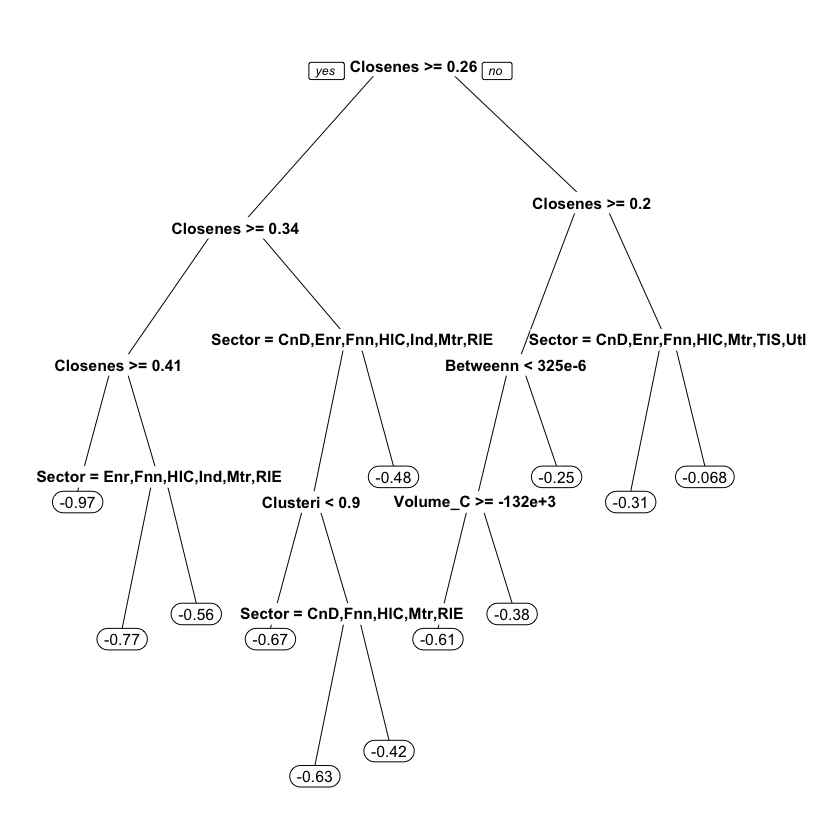

In [16]:
# Decision tree diagram
prp(dt_year5)

## Run multiple linear regressions

In [17]:
# Run multiple linear regressions using only financial measures and sector (low R2 values over the years)
# Use stepwise regression (both ways) to choose best variables for volume and log return 
# (no difference between using log return or market cap)
# Avg_Volume in 3/9 final models and Volume_Change in 1/9 final models -> choose average volume
linregs_financials <- list()

for (i in 1:9) {
    print(i)
    linregs_financials[[i]] <- step(lm(Change_Deg_Centr ~ Volume_Change + Logret_Change + Sector, data=years[[i]]), 
                                    direction='both')
}

[1] 1
Start:  AIC=-1532.06
Change_Deg_Centr ~ Volume_Change + Logret_Change + Sector

                Df Sum of Sq     RSS     AIC
- Volume_Change  1   0.00015  9.3871 -1534.1
<none>                        9.3869 -1532.1
- Logret_Change  1   0.21655  9.6035 -1524.7
- Sector        10   1.28426 10.6712 -1499.2

Step:  AIC=-1534.06
Change_Deg_Centr ~ Logret_Change + Sector

                Df Sum of Sq     RSS     AIC
<none>                        9.3871 -1534.1
+ Volume_Change  1   0.00015  9.3869 -1532.1
- Logret_Change  1   0.21994  9.6070 -1526.5
- Sector        10   1.29467 10.6817 -1500.8
[1] 2
Start:  AIC=-1228.42
Change_Deg_Centr ~ Volume_Change + Logret_Change + Sector

                Df Sum of Sq    RSS     AIC
- Volume_Change  1   0.02157 14.502 -1229.8
<none>                       14.480 -1228.4
- Sector        10   1.31518 15.796 -1215.1
- Logret_Change  1   0.68682 15.167 -1212.7

Step:  AIC=-1229.85
Change_Deg_Centr ~ Logret_Change + Sector

                Df Sum of Sq  

In [18]:
coeffs <- list()
sig <- list()
signif <- list()
df_coeffs_fin <- data.frame()
df_signif_fin <- data.frame()

# Print summary statistics of each linear regression
for (i in 1:length(linregs_financials)) {
    print(i)
    print(summary(linregs_financials[[i]]))
    
    # Create table of coefficients and their significance
    coeffs[[i]] <- summary(linregs_financials[[i]])$coefficients
    sig[[i]] <- data.frame(coeffs[[i]][2:nrow(coeffs[[i]]),1], coeffs[[i]][2:nrow(coeffs[[i]]),4] < 0.05)
    colnames(sig[[i]])[1] <- paste("year", as.character(i+1), "_coeffs", sep = "")
    colnames(sig[[i]])[2] <- paste("year", as.character(i+1), "_signif", sep = "")
    
    df_coeffs_fin <- merge(x = df_coeffs_fin, y = sig[[i]], by = 'row.names', all = TRUE)
    rownames(df_coeffs_fin) <- df_coeffs_fin$Row.names
    df_coeffs_fin <- df_coeffs_fin[,2:ncol(df_coeffs_fin)]
    
    # Create table of only significant coefficients
    signif[[i]] <- data.frame(coeffs[[i]][coeffs[[i]][,4] < 0.05,][,1])
    colnames(signif[[i]])[1] <- paste("year", as.character(i+1), sep = "")
    
    if (i==1) {
        df_signif_fin <- signif[[i]]
    } else {
         df_signif_fin <- merge(x = df_signif_fin, y = signif[[i]], by = 'row.names', all = TRUE)
        rownames(df_signif_fin) <- df_signif_fin$Row.names
        df_signif_fin <- df_signif_fin[,2:ncol(df_signif_fin)]
    
    }
   
}

[1] 1

Call:
lm(formula = Change_Deg_Centr ~ Logret_Change + Sector, data = years[[i]])

Residuals:
     Min       1Q   Median       3Q      Max 
-0.63243 -0.09163  0.02225  0.09553  0.42244 

Coefficients:
                                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)                      -0.22963    0.02286 -10.044  < 2e-16 ***
Logret_Change                    -0.59572    0.19459  -3.061  0.00235 ** 
SectorConsumer Staples            0.11126    0.03700   3.007  0.00281 ** 
SectorEnergy                      0.09707    0.03653   2.657  0.00820 ** 
SectorFinancials                  0.11663    0.02834   4.116 4.69e-05 ***
SectorHealth Care                 0.09284    0.02973   3.123  0.00192 ** 
SectorIndustrials                -0.01577    0.02912  -0.542  0.58829    
SectorInformation Technology     -0.01916    0.02913  -0.658  0.51111    
SectorMaterials                  -0.02077    0.03785  -0.549  0.58351    
SectorReal Estate                 0.04737    0.03477 

In [19]:
# Inspect dataframes
df_coeffs_fin
df_signif_fin

year2_coeffs year2_signif year3_coeffs
Logret_Change                    -0.59571644   TRUE         1.17386873 
SectorConsumer Staples            0.11125770   TRUE         0.04882742 
SectorEnergy                      0.09707343   TRUE        -0.05959425 
SectorFinancials                  0.11662720   TRUE         0.00816916 
SectorHealth Care                 0.09283952   TRUE         0.11664786 
SectorIndustrials                -0.01577415  FALSE        -0.02112321 
SectorInformation Technology     -0.01915930  FALSE         0.00877342 
SectorMaterials                  -0.02076636  FALSE        -0.02953984 
SectorReal Estate                 0.04736709  FALSE        -0.13605749 
SectorTelecommunication Services -0.08794911  FALSE        -0.24306416 
SectorUtilities                   0.02510839  FALSE        -0.01975987 
Volume_Change                             NA     NA                 NA 
                                 year3_signif year4_coeffs  year4_signif
Logret_Change                     TRUE                   NA    NA       
SectorConsumer Staples           FALSE         9.446720e-02 FALSE       
SectorEnergy                     FALSE         6.433150e-02 FALSE       
SectorFinancials                 FALSE         1.064876e-01  TRUE       
SectorHealth Care                 TRUE         3.001231e-01  TRUE       
SectorIndustrials                FALSE         2.355247e-02 FALSE       
SectorInformation Technology     FALSE         1.517253e-01  TRUE       
SectorMaterials                  FALSE         7.001892e-02 FALSE       
SectorReal Estate                 TRUE        -5.976575e-02 FALSE       
SectorTelecommunication Services FALSE         2.855533e-01 FALSE       
SectorUtilities                  FALSE         1.378529e-01  TRUE       
Volume_Change                       NA        -1.965388e-08  TRUE       
                                 year5_coeffs year5_signif year6_coeffs
Logret_Change                     4.33167735   TRUE         3.02712921 
SectorConsumer Staples            0.26077890   TRUE         0.38116368 
SectorEnergy                     -0.04626021  FALSE        -0.16834417 
SectorFinancials                 -0.27393382   TRUE        -0.31965331 
SectorHealth Care                 0.10387993  FALSE        -0.11754950 
SectorIndustrials                -0.36465871   TRUE        -0.24284612 
SectorInformation Technology      0.04903769  FALSE        -0.04733574 
SectorMaterials                  -0.24680527   TRUE        -0.24610084 
SectorReal Estate                -0.31919577   TRUE        -0.16641340 
SectorTelecommunication Services  0.12663389  FALSE         0.07626827 
SectorUtilities                   0.04667749  FALSE         0.10564630 
Volume_Change                             NA     NA                 NA 
                                 year6_signif year7_coeffs year7_signif
Logret_Change                     TRUE                  NA    NA       
SectorConsumer Staples            TRUE         0.018940964 FALSE       
SectorEnergy                      TRUE        -0.001506645 FALSE       
SectorFinancials                  TRUE        -0.079943297  TRUE       
SectorHealth Care                 TRUE         0.004235176 FALSE       
SectorIndustrials                 TRUE        -0.016711419 FALSE       
SectorInformation Technology     FALSE        -0.003527147 FALSE       
SectorMaterials                   TRUE        -0.004126517 FALSE       
SectorReal Estate                 TRUE        -0.040534940  TRUE       
SectorTelecommunication Services FALSE         0.029291667 FALSE       
SectorUtilities                  FALSE        -0.005723808 FALSE       
Volume_Change                       NA                  NA    NA       
                                 year8_coeffs  year8_signif year9_coeffs 
Logret_Change                               NA    NA                   NA
SectorConsumer Staples            7.083634e-05 FALSE         0.0069118476
SectorEnergy                     -4.840093e-02  TRUE  

year2       year3      year4         year5     
(Intercept)                  -0.22963118 -0.2051017  8.370694e-02 -0.4174364
Logret_Change                -0.59571644  1.1738687            NA  4.3316774
SectorConsumer Staples        0.11125770         NA            NA  0.2607789
SectorEnergy                  0.09707343         NA            NA         NA
SectorFinancials              0.11662720         NA  1.064876e-01 -0.2739338
SectorHealth Care             0.09283952  0.1166479  3.001231e-01         NA
SectorIndustrials                     NA         NA            NA -0.3646587
SectorInformation Technology          NA         NA  1.517253e-01         NA
SectorMaterials                       NA         NA            NA -0.2468053
SectorReal Estate                     NA -0.1360575            NA -0.3191958
SectorUtilities                       NA         NA  1.378529e-01         NA
Volume_Change                         NA         NA -1.965388e-08         NA
                             year6      year7       year8       year9      
(Intercept)                  -0.4286575 -0.03269310          NA -0.04480690
Logret_Change                 3.0271292          NA          NA          NA
SectorConsumer Staples        0.3811637          NA          NA          NA
SectorEnergy                 -0.1683442          NA -0.04840093          NA
SectorFinancials             -0.3196533 -0.07994330          NA -0.14020511
SectorHealth Care            -0.1175495          NA          NA          NA
SectorIndustrials            -0.2428461          NA          NA -0.06694247
SectorInformation Technology         NA          NA  0.04361454 -0.03531524
SectorMaterials              -0.2461008          NA          NA          NA
SectorReal Estate            -0.1664134 -0.04053494 -0.08788533          NA
SectorUtilities                      NA          NA -0.09347258          NA
Volume_Change                        NA          NA          NA          NA
                             year10     
(Intercept)                  -0.04753525
Logret_Change                -0.55440911
SectorConsumer Staples                NA
SectorEnergy                          NA
SectorFinancials             -0.21940253
SectorHealth Care                     NA
SectorIndustrials            -0.08414750
SectorInformation Technology          NA
SectorMaterials                       NA
SectorReal Estate                     NA
SectorUtilities                       NA
Volume_Change                         NA

In [20]:
write.csv(df_coeffs_fin, file = "coeffs_fin.csv")

In [21]:
# Make NA values 0 and delete intercept row
df_signif_fin[is.na(df_signif_fin)] <- 0
df_signif_fin <- df_signif_fin[-1,] 
df_signif_fin

year2       year3      year4         year5     
Logret_Change                -0.59571644  1.1738687  0.000000e+00  4.3316774
SectorConsumer Staples        0.11125770  0.0000000  0.000000e+00  0.2607789
SectorEnergy                  0.09707343  0.0000000  0.000000e+00  0.0000000
SectorFinancials              0.11662720  0.0000000  1.064876e-01 -0.2739338
SectorHealth Care             0.09283952  0.1166479  3.001231e-01  0.0000000
SectorIndustrials             0.00000000  0.0000000  0.000000e+00 -0.3646587
SectorInformation Technology  0.00000000  0.0000000  1.517253e-01  0.0000000
SectorMaterials               0.00000000  0.0000000  0.000000e+00 -0.2468053
SectorReal Estate             0.00000000 -0.1360575  0.000000e+00 -0.3191958
SectorUtilities               0.00000000  0.0000000  1.378529e-01  0.0000000
Volume_Change                 0.00000000  0.0000000 -1.965388e-08  0.0000000
                             year6      year7       year8       year9      
Logret_Change                 3.0271292  0.00000000  0.00000000  0.00000000
SectorConsumer Staples        0.3811637  0.00000000  0.00000000  0.00000000
SectorEnergy                 -0.1683442  0.00000000 -0.04840093  0.00000000
SectorFinancials             -0.3196533 -0.07994330  0.00000000 -0.14020511
SectorHealth Care            -0.1175495  0.00000000  0.00000000  0.00000000
SectorIndustrials            -0.2428461  0.00000000  0.00000000 -0.06694247
SectorInformation Technology  0.0000000  0.00000000  0.04361454 -0.03531524
SectorMaterials              -0.2461008  0.00000000  0.00000000  0.00000000
SectorReal Estate            -0.1664134 -0.04053494 -0.08788533  0.00000000
SectorUtilities               0.0000000  0.00000000 -0.09347258  0.00000000
Volume_Change                 0.0000000  0.00000000  0.00000000  0.00000000
                             year10    
Logret_Change                -0.5544091
SectorConsumer Staples        0.0000000
SectorEnergy                  0.0000000
SectorFinancials             -0.2194025
SectorHealth Care             0.0000000
SectorIndustrials            -0.0841475
SectorInformation Technology  0.0000000
SectorMaterials               0.0000000
SectorReal Estate             0.0000000
SectorUtilities               0.0000000
Volume_Change                 0.0000000

In [22]:
# Create heatmap file
png(filename="heatmap_financials.png", width=1000, height=800)
financials_hm <- heatmap.2(as.matrix(df_signif_fin), col=brewer.pal(11,"RdBu"), Colv=NA, Rowv=NA, scale="row", 
                           trace="none", cexRow=0.6, cexCol=0.8, margins=c(5,9), symkey=FALSE, symbreaks=FALSE, 
                           dendrogram='none', density.info='histogram', denscol="black", keysize=1, 
                           key.par=list(mar=c(4.5,0.5,4.5,0.5)))
dev.off()

pdf 
  2

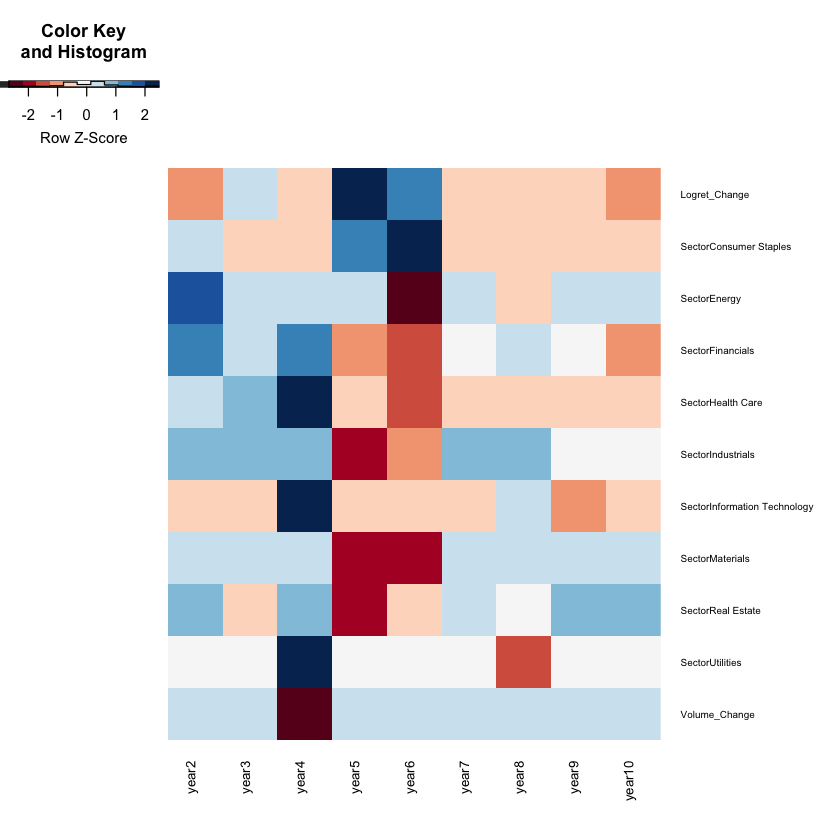

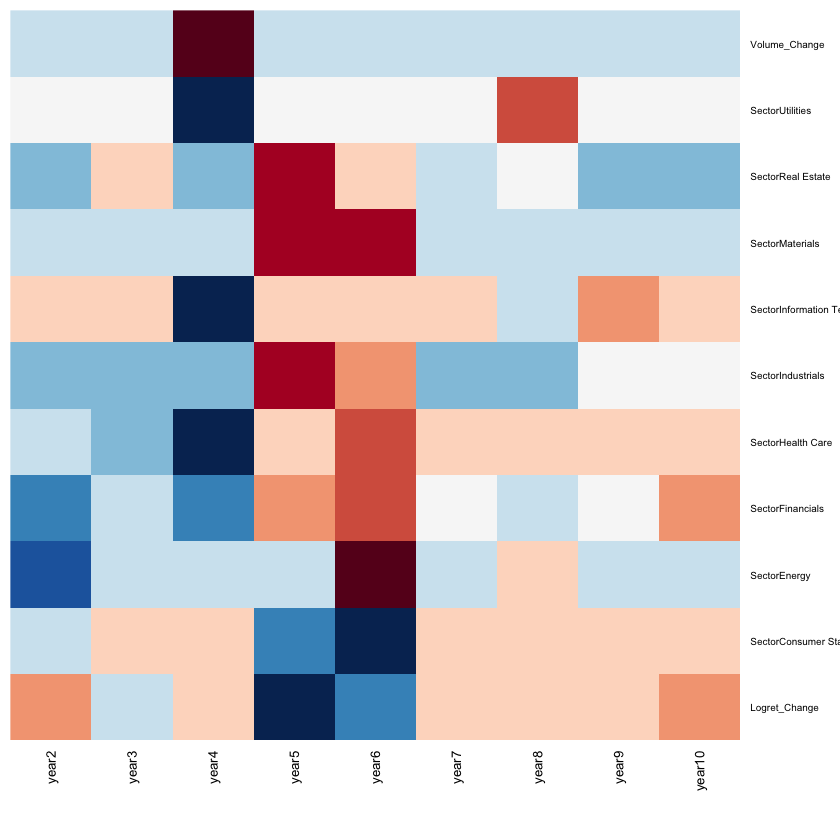

In [23]:
# Create heatmaps
heatmap.2(as.matrix(df_signif_fin), col=brewer.pal(11,"RdBu"), Colv=NA, Rowv=NA, scale = "row", trace="none", 
          cexRow=0.6, cexCol=0.8, margins=c(5,9), symkey=FALSE, symbreaks=FALSE, dendrogram='none',
          density.info='histogram', denscol="black", keysize=1, key.par=list(mar=c(4.5,0.5,4.5,0.5)))

heatmap(as.matrix(df_signif_fin),col=brewer.pal(11,"RdBu"), Colv=NA, Rowv=NA, scale="row", cexRow=0.6, cexCol=0.8)

In [24]:
# Print VIF values for all independent variables in regression
#for (i in 1:length(linregs_financials)) {
#    print(i)
#    print(vif(linregs_financials[[i]]))
#}

In [25]:
# Run multiple linear regressions using only network measures and sector (much better R2 values than using only 
# stock measures, but greater fluctuations over the years)
# Stepwise regression (both directions) to find best variables: eigenvector produces lower AIC than closeness
linregs_network <- list()

for (i in 1:9) {
    print(i)
    linregs_network[[i]] <- step(lm(Change_Deg_Centr ~ Betweenness_Centrality + Eigenvector_Centrality +  
                                    Clustering_Coefficient + Sector, data=years[[i]]), direction='both')
}

[1] 1
Start:  AIC=-1984.28
Change_Deg_Centr ~ Betweenness_Centrality + Eigenvector_Centrality + 
    Clustering_Coefficient + Sector

                         Df Sum of Sq    RSS     AIC
- Betweenness_Centrality  1    0.0001 3.1171 -1986.3
- Clustering_Coefficient  1    0.0056 3.1226 -1985.5
<none>                                3.1170 -1984.3
- Sector                 10    1.5911 4.7081 -1834.4
- Eigenvector_Centrality  1    4.0027 7.1196 -1646.0

Step:  AIC=-1986.26
Change_Deg_Centr ~ Eigenvector_Centrality + Clustering_Coefficient + 
    Sector

                         Df Sum of Sq    RSS     AIC
- Clustering_Coefficient  1    0.0066 3.1237 -1987.4
<none>                                3.1171 -1986.3
+ Betweenness_Centrality  1    0.0001 3.1170 -1984.3
- Sector                 10    1.6019 4.7190 -1835.4
- Eigenvector_Centrality  1    5.3811 8.4982 -1575.0

Step:  AIC=-1987.39
Change_Deg_Centr ~ Eigenvector_Centrality + Sector

                         Df Sum of Sq    RSS     AIC
<

In [26]:
coeffs <- list()
sig <- list()
signif <- list()
df_coeffs_net <- data.frame()
df_signif_net <- data.frame()

# Print summary statistics of each linear regression
for (i in 1:length(linregs_network)) {
    print(i)
    print(summary(linregs_network[[i]]))
    
    # Create table of coefficients and their significance
    coeffs[[i]] <- summary(linregs_network[[i]])$coefficients
    sig[[i]] <- data.frame(coeffs[[i]][2:nrow(coeffs[[i]]),1], coeffs[[i]][2:nrow(coeffs[[i]]),4] < 0.05)
    colnames(sig[[i]])[1] <- paste("year", as.character(i+1), "_coeffs", sep = "")
    colnames(sig[[i]])[2] <- paste("year", as.character(i+1), "_signif", sep = "")
    
    df_coeffs_net <- merge(x = df_coeffs_net, y = sig[[i]], by = 'row.names', all = TRUE)
    rownames(df_coeffs_net) <- df_coeffs_net$Row.names
    df_coeffs_net <- df_coeffs_net[,2:ncol(df_coeffs_net)]
    
    # Create table of only significant coefficients
    signif[[i]] <- data.frame(coeffs[[i]][coeffs[[i]][,4] < 0.05,][,1])
    colnames(signif[[i]])[1] <- paste("year", as.character(i+1), sep = "")
    
    if (i==1) {
        df_signif_net <- signif[[i]]
    } else {
         df_signif_net <- merge(x = df_signif_net, y = signif[[i]], by = 'row.names', all = TRUE)
        rownames(df_signif_net) <- df_signif_net$Row.names
        df_signif_net <- df_signif_net[,2:ncol(df_signif_net)]
    
    }
   
}

[1] 1

Call:
lm(formula = Change_Deg_Centr ~ Eigenvector_Centrality + Sector, 
    data = years[[i]])

Residuals:
     Min       1Q   Median       3Q      Max 
-0.33028 -0.05351  0.00080  0.03562  0.30990 

Coefficients:
                                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)                       0.045790   0.014327   3.196 0.001504 ** 
Eigenvector_Centrality           -5.200247   0.180479 -28.814  < 2e-16 ***
SectorConsumer Staples           -0.066142   0.021875  -3.024 0.002659 ** 
SectorEnergy                      0.075476   0.020189   3.738 0.000212 ***
SectorFinancials                  0.078099   0.016402   4.762 2.69e-06 ***
SectorHealth Care                -0.061445   0.017981  -3.417 0.000698 ***
SectorIndustrials                 0.052620   0.016745   3.142 0.001800 ** 
SectorInformation Technology     -0.043307   0.016719  -2.590 0.009939 ** 
SectorMaterials                   0.004911   0.021784   0.225 0.821763    
SectorReal Estate            

In [27]:
# Inspect dataframes
df_coeffs_net
df_signif_net

year2_coeffs year2_signif year3_coeffs
Betweenness_Centrality                    NA     NA                  NA
Clustering_Coefficient                    NA     NA                  NA
Eigenvector_Centrality           -5.20024662   TRUE        -2.808320555
SectorConsumer Staples           -0.06614186   TRUE        -0.048111388
SectorEnergy                      0.07547583   TRUE        -0.009924258
SectorFinancials                  0.07809887   TRUE         0.099876641
SectorHealth Care                -0.06144473   TRUE         0.038258461
SectorIndustrials                 0.05261997   TRUE         0.044543986
SectorInformation Technology     -0.04330701   TRUE        -0.060225444
SectorMaterials                   0.00491062  FALSE        -0.003883094
SectorReal Estate                 0.14800195   TRUE        -0.012623540
SectorTelecommunication Services -0.10285297  FALSE        -0.322029316
SectorUtilities                  -0.06693998   TRUE        -0.056309783
                                 year3_signif year4_coeffs year4_signif
Betweenness_Centrality              NA        -8.87078848   TRUE       
Clustering_Coefficient              NA         0.16965697   TRUE       
Eigenvector_Centrality            TRUE        -2.46834968   TRUE       
SectorConsumer Staples           FALSE         0.07735324  FALSE       
SectorEnergy                     FALSE         0.06755569  FALSE       
SectorFinancials                  TRUE         0.14242519   TRUE       
SectorHealth Care                FALSE         0.23601274   TRUE       
SectorIndustrials                FALSE         0.11247894   TRUE       
SectorInformation Technology     FALSE         0.11870964   TRUE       
SectorMaterials                  FALSE         0.12183822   TRUE       
SectorReal Estate                FALSE        -0.01625363  FALSE       
SectorTelecommunication Services  TRUE         0.30622918   TRUE       
SectorUtilities                  FALSE         0.06147387  FALSE       
                                 year5_coeffs year5_signif year6_coeffs
Betweenness_Centrality           -16.34338176  TRUE                  NA
Clustering_Coefficient             0.09105133  TRUE        -0.124888527
Eigenvector_Centrality           -13.75069004  TRUE        -3.286626446
SectorConsumer Staples             0.11865198  TRUE         0.284749112
SectorEnergy                       0.08006437  TRUE        -0.017919280
SectorFinancials                   0.07182562  TRUE        -0.007755520
SectorHealth Care                  0.12330008  TRUE        -0.045329534
SectorIndustrials                 -0.07037795  TRUE        -0.073045093
SectorInformation Technology       0.08006660  TRUE         0.059700540
SectorMaterials                   -0.01636569 FALSE        -0.137139853
SectorReal Estate                 -0.04315999 FALSE        -0.117995191
SectorTelecommunication Services   0.12546317 FALSE        -0.007374515
SectorUtilities                    0.06825368  TRUE         0.127984875
                                 year6_signif year7_coeffs year7_signif
Betweenness_Centrality              NA                  NA    NA       
Clustering_Coefficient            TRUE         0.022252809  TRUE       
Eigenvector_Centrality            TRUE        -1.259238329  TRUE       
SectorConsumer Staples            TRUE        -0.008346600 FALSE       
SectorEnergy                     FALSE        -0.030291321 FALSE       
SectorFinancials                 FALSE         0.014726528 FALSE       
SectorHealth Care                FALSE        -0.003227197 FALSE       
SectorIndustrials                FALSE         0.001151053 FALSE       
SectorInformation Technology     FALSE        -0.011030428 FALSE       
SectorMaterials                   TRUE        -0.004034608 FALSE       
SectorReal Estate                 TRUE        -0.066848109  TRUE       
SectorTelecommunication Services FALSE         0.015788710 FALSE       
SectorUtilities                   TRUE        -0.037193067  TRUE       
 

year2       year3       year4     
(Intercept)                       0.04578969 -0.10830044         NA
Betweenness_Centrality                    NA          NA -8.8707885
Clustering_Coefficient                    NA          NA  0.1696570
Eigenvector_Centrality           -5.20024662 -2.80832055 -2.4683497
SectorConsumer Staples           -0.06614186          NA         NA
SectorEnergy                      0.07547583          NA         NA
SectorFinancials                  0.07809887  0.09987664  0.1424252
SectorHealth Care                -0.06144473          NA  0.2360127
SectorIndustrials                 0.05261997          NA  0.1124789
SectorInformation Technology     -0.04330701          NA  0.1187096
SectorMaterials                           NA          NA  0.1218382
SectorReal Estate                 0.14800195          NA         NA
SectorTelecommunication Services          NA -0.32202932  0.3062292
SectorUtilities                  -0.06693998          NA         NA
                                 year5        year6      year7      
(Intercept)                       -0.12148071 -0.3533716          NA
Betweenness_Centrality           -16.34338176         NA          NA
Clustering_Coefficient             0.09105133 -0.1248885  0.02225281
Eigenvector_Centrality           -13.75069004 -3.2866264 -1.25923833
SectorConsumer Staples             0.11865198  0.2847491          NA
SectorEnergy                       0.08006437         NA          NA
SectorFinancials                   0.07182562         NA          NA
SectorHealth Care                  0.12330008         NA          NA
SectorIndustrials                 -0.07037795         NA          NA
SectorInformation Technology       0.08006660         NA          NA
SectorMaterials                            NA -0.1371399          NA
SectorReal Estate                          NA -0.1179952 -0.06684811
SectorTelecommunication Services           NA         NA          NA
SectorUtilities                    0.06825368  0.1279849 -0.03719307
                                 year8       year9       year10     
(Intercept)                       0.02461851          NA -0.04095322
Betweenness_Centrality           -2.30983115 -1.63633386 -3.55415541
Clustering_Coefficient                    NA          NA          NA
Eigenvector_Centrality           -0.41726070 -2.55917969 -0.58512664
SectorConsumer Staples                    NA          NA          NA
SectorEnergy                     -0.04520160 -0.05689292          NA
SectorFinancials                          NA  0.03171906 -0.13782856
SectorHealth Care                         NA          NA          NA
SectorIndustrials                         NA -0.01692379 -0.05420122
SectorInformation Technology      0.05470855          NA          NA
SectorMaterials                           NA          NA          NA
SectorReal Estate                -0.09059081 -0.05592300          NA
SectorTelecommunication Services          NA          NA          NA
SectorUtilities                  -0.09623198 -0.05734124 -0.03902326

In [28]:
# Make NA values 0 and delete Intercept row
df_signif_net[is.na(df_signif_net)] <- 0
df_signif_net <- df_signif_net[-1,]
df_signif_net

year2       year3       year4     
Betweenness_Centrality            0.00000000  0.00000000 -8.8707885
Clustering_Coefficient            0.00000000  0.00000000  0.1696570
Eigenvector_Centrality           -5.20024662 -2.80832055 -2.4683497
SectorConsumer Staples           -0.06614186  0.00000000  0.0000000
SectorEnergy                      0.07547583  0.00000000  0.0000000
SectorFinancials                  0.07809887  0.09987664  0.1424252
SectorHealth Care                -0.06144473  0.00000000  0.2360127
SectorIndustrials                 0.05261997  0.00000000  0.1124789
SectorInformation Technology     -0.04330701  0.00000000  0.1187096
SectorMaterials                   0.00000000  0.00000000  0.1218382
SectorReal Estate                 0.14800195  0.00000000  0.0000000
SectorTelecommunication Services  0.00000000 -0.32202932  0.3062292
SectorUtilities                  -0.06693998  0.00000000  0.0000000
                                 year5        year6      year7      
Betweenness_Centrality           -16.34338176  0.0000000  0.00000000
Clustering_Coefficient             0.09105133 -0.1248885  0.02225281
Eigenvector_Centrality           -13.75069004 -3.2866264 -1.25923833
SectorConsumer Staples             0.11865198  0.2847491  0.00000000
SectorEnergy                       0.08006437  0.0000000  0.00000000
SectorFinancials                   0.07182562  0.0000000  0.00000000
SectorHealth Care                  0.12330008  0.0000000  0.00000000
SectorIndustrials                 -0.07037795  0.0000000  0.00000000
SectorInformation Technology       0.08006660  0.0000000  0.00000000
SectorMaterials                    0.00000000 -0.1371399  0.00000000
SectorReal Estate                  0.00000000 -0.1179952 -0.06684811
SectorTelecommunication Services   0.00000000  0.0000000  0.00000000
SectorUtilities                    0.06825368  0.1279849 -0.03719307
                                 year8       year9       year10     
Betweenness_Centrality           -2.30983115 -1.63633386 -3.55415541
Clustering_Coefficient            0.00000000  0.00000000  0.00000000
Eigenvector_Centrality           -0.41726070 -2.55917969 -0.58512664
SectorConsumer Staples            0.00000000  0.00000000  0.00000000
SectorEnergy                     -0.04520160 -0.05689292  0.00000000
SectorFinancials                  0.00000000  0.03171906 -0.13782856
SectorHealth Care                 0.00000000  0.00000000  0.00000000
SectorIndustrials                 0.00000000 -0.01692379 -0.05420122
SectorInformation Technology      0.05470855  0.00000000  0.00000000
SectorMaterials                   0.00000000  0.00000000  0.00000000
SectorReal Estate                -0.09059081 -0.05592300  0.00000000
SectorTelecommunication Services  0.00000000  0.00000000  0.00000000
SectorUtilities                  -0.09623198 -0.05734124 -0.03902326

In [29]:
# Create heatmap file
png(filename="heatmap_network.png", width=1000, height=800)
network_hm <- heatmap.2(as.matrix(df_signif_net), col=brewer.pal(11,"RdBu"), Colv=NA, Rowv=NA, scale="row", trace="none", 
          cexRow=0.6, cexCol=0.8, margins=c(5,9), symkey=FALSE, symbreaks=FALSE, dendrogram='none',
          density.info='histogram', denscol="black", keysize=1, key.par=list(mar=c(4.5,0.5,4.5,0.5)))
dev.off()

pdf 
  2

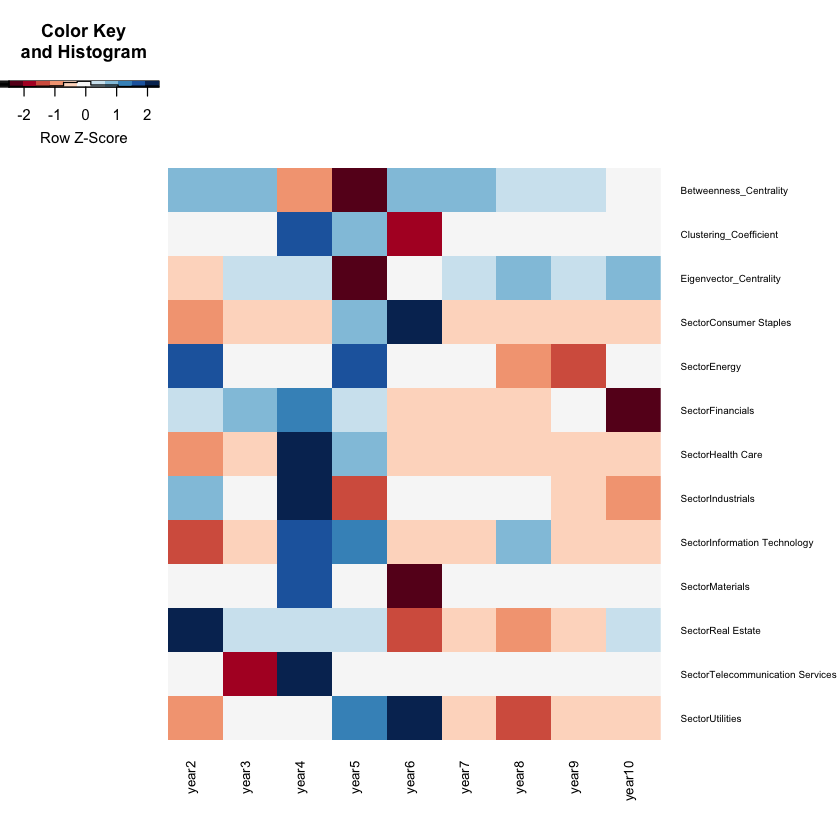

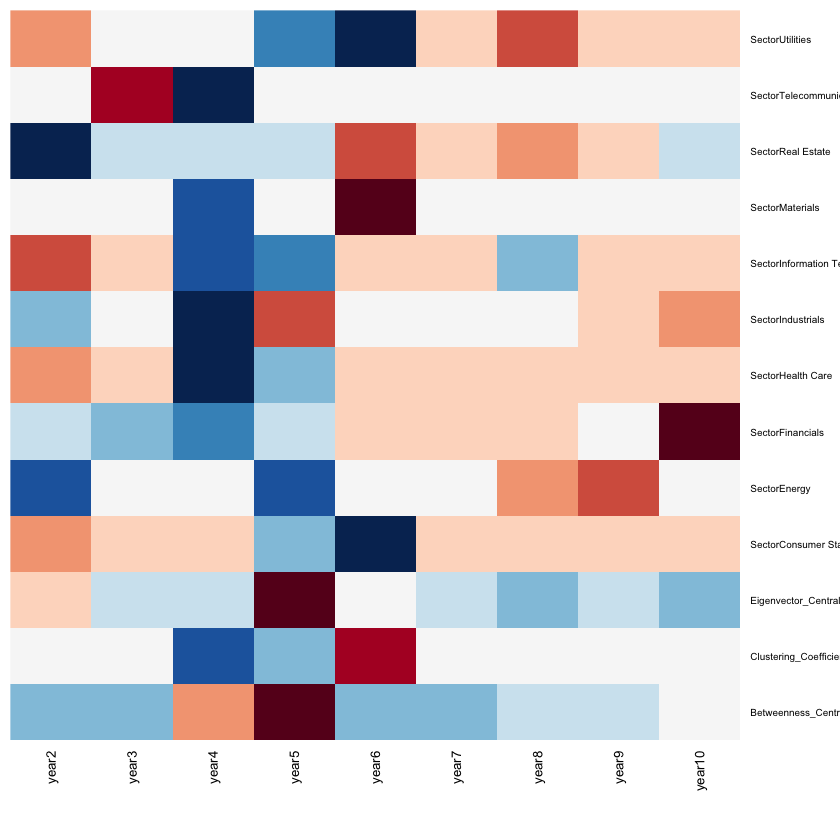

In [30]:
# Create heatmaps
heatmap.2(as.matrix(df_signif_net), col=brewer.pal(11,"RdBu"), Colv=NA, Rowv=NA, scale="row", trace="none", 
          cexRow=0.6, cexCol=0.8, margins=c(5,9), symkey=FALSE, symbreaks=FALSE, dendrogram='none',
          density.info='histogram', denscol="black", keysize=1, key.par=list(mar=c(4.5,0.5,4.5,0.5)))

heatmap(as.matrix(df_signif_net),col=brewer.pal(11,"RdBu"), Colv=NA, Rowv=NA, scale="row", cexRow=0.6, cexCol=0.8)

In [31]:
# Print VIF values for all independent variables in regression
#for (i in 1:length(linregs_network)) {
 #   print(i)
  #  print(vif(linregs_network[[i]]))
#}

In [32]:
# Run new linear regressions for each year using all features (slightly better R2 than using only network features)
linregs_all <- list()

for (i in 1:9) {
    linregs_all[[i]] <- step(lm(Change_Deg_Centr ~ Volume_Change + Logret_Change + Betweenness_Centrality + 
                           Eigenvector_Centrality + Clustering_Coefficient + Sector, data=years[[i]]), direction='both')
}

Start:  AIC=-1991.8
Change_Deg_Centr ~ Volume_Change + Logret_Change + Betweenness_Centrality + 
    Eigenvector_Centrality + Clustering_Coefficient + Sector

                         Df Sum of Sq    RSS     AIC
- Betweenness_Centrality  1    0.0001 3.0311 -1993.8
- Volume_Change           1    0.0014 3.0324 -1993.6
- Clustering_Coefficient  1    0.0040 3.0350 -1993.3
<none>                                3.0310 -1991.8
- Logret_Change           1    0.0859 3.1169 -1982.3
- Sector                 10    1.1866 4.2176 -1875.7
- Eigenvector_Centrality  1    3.9424 6.9734 -1650.5

Step:  AIC=-1993.78
Change_Deg_Centr ~ Volume_Change + Logret_Change + Eigenvector_Centrality + 
    Clustering_Coefficient + Sector

                         Df Sum of Sq    RSS     AIC
- Volume_Change           1    0.0014 3.0326 -1995.6
- Clustering_Coefficient  1    0.0047 3.0358 -1995.1
<none>                                3.0311 -1993.8
+ Betweenness_Centrality  1    0.0001 3.0310 -1991.8
- Logret_Change  

In [33]:
coeffs <- list()
sig <- list()
signif <- list()
df_coeffs_all <- data.frame()
df_signif_all <- data.frame()

# Print summary statistics of each linear regression
# (slightly better R2 than regression with only network measures)
for (i in 1:length(linregs_all)) {
    print(i)
    print(summary(linregs_all[[i]]))
    
    # Create table of coefficients and their significance
    coeffs[[i]] <- summary(linregs_all[[i]])$coefficients
    sig[[i]] <- data.frame(coeffs[[i]][2:nrow(coeffs[[i]]),1], coeffs[[i]][2:nrow(coeffs[[i]]),4] < 0.05)
    colnames(sig[[i]])[1] <- paste("year", as.character(i+1), "_coeffs", sep = "")
    colnames(sig[[i]])[2] <- paste("year", as.character(i+1), "_signif", sep = "")
    
    df_coeffs_all <- merge(x = df_coeffs_all, y = sig[[i]], by = 'row.names', all = TRUE)
    rownames(df_coeffs_all) <- df_coeffs_all$Row.names
    df_coeffs_all <- df_coeffs_all[,2:ncol(df_coeffs_all)]
    
    # Create table of only significant coefficients
    signif[[i]] <- data.frame(coeffs[[i]][coeffs[[i]][,4] < 0.05,][,1])
    colnames(signif[[i]])[1] <- paste("year", as.character(i+1), sep = "")
    
    if (i==1) {
        df_signif_all <- signif[[i]]
    } else {
         df_signif_all <- merge(x = df_signif_all, y = signif[[i]], by = 'row.names', all = TRUE)
        rownames(df_signif_all) <- df_signif_all$Row.names
        df_signif_all <- df_signif_all[,2:ncol(df_signif_all)]
    
    }
   
}

[1] 1

Call:
lm(formula = Change_Deg_Centr ~ Logret_Change + Eigenvector_Centrality + 
    Sector, data = years[[i]])

Residuals:
     Min       1Q   Median       3Q      Max 
-0.34346 -0.05267  0.00020  0.03742  0.28354 

Coefficients:
                                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)                       0.0229769  0.0156860   1.465 0.143762    
Logret_Change                    -0.3738972  0.1110940  -3.366 0.000838 ***
Eigenvector_Centrality           -5.1586847  0.1786208 -28.881  < 2e-16 ***
SectorConsumer Staples           -0.0550491  0.0218484  -2.520 0.012139 *  
SectorEnergy                      0.0547996  0.0208586   2.627 0.008941 ** 
SectorFinancials                  0.0768631  0.0161985   4.745 2.91e-06 ***
SectorHealth Care                -0.0612867  0.0177538  -3.452 0.000616 ***
SectorIndustrials                 0.0443745  0.0167136   2.655 0.008248 ** 
SectorInformation Technology     -0.0373019  0.0166032  -2.247 0.025207 *  
Sec

In [34]:
# Inspect dataframes
df_coeffs_all
df_signif_all

year2_coeffs  year2_signif year3_coeffs
Betweenness_Centrality                      NA    NA        -1.18997613 
Clustering_Coefficient                      NA    NA        -0.04522656 
Eigenvector_Centrality           -5.1586847330  TRUE        -2.62545066 
Logret_Change                    -0.3738972052  TRUE         1.15775763 
SectorConsumer Staples           -0.0550491196  TRUE        -0.02761174 
SectorEnergy                      0.0547995597  TRUE         0.02929656 
SectorFinancials                  0.0768631027  TRUE         0.09511137 
SectorHealth Care                -0.0612866924  TRUE         0.05522819 
SectorIndustrials                 0.0443744941  TRUE         0.06008248 
SectorInformation Technology     -0.0373018781  TRUE        -0.02719127 
SectorMaterials                  -0.0004426018 FALSE         0.01214304 
SectorReal Estate                 0.1341839085  TRUE         0.00698791 
SectorTelecommunication Services -0.0950903804 FALSE        -0.33110177 
SectorUtilities                  -0.0634539707  TRUE        -0.06475244 
Volume_Change                               NA    NA                 NA 
                                 year3_signif year4_coeffs  year4_signif
Betweenness_Centrality           FALSE        -8.534825e+00  TRUE       
Clustering_Coefficient           FALSE         1.758156e-01  TRUE       
Eigenvector_Centrality            TRUE        -2.547698e+00  TRUE       
Logret_Change                     TRUE                   NA    NA       
SectorConsumer Staples           FALSE         8.504133e-02 FALSE       
SectorEnergy                     FALSE         7.141753e-02 FALSE       
SectorFinancials                  TRUE         1.478036e-01  TRUE       
SectorHealth Care                FALSE         2.374427e-01  TRUE       
SectorIndustrials                FALSE         1.151657e-01  TRUE       
SectorInformation Technology     FALSE         1.370541e-01  TRUE       
SectorMaterials                  FALSE         1.179505e-01  TRUE       
SectorReal Estate                FALSE        -5.521597e-04 FALSE       
SectorTelecommunication Services  TRUE         3.307777e-01  TRUE       
SectorUtilities                  FALSE         6.471536e-02 FALSE       
Volume_Change                       NA        -2.297459e-08  TRUE       
                                 year5_coeffs year5_signif year6_coeffs
Betweenness_Centrality           -16.34338176  TRUE                 NA 
Clustering_Coefficient             0.09105133  TRUE        -0.13092750 
Eigenvector_Centrality           -13.75069004  TRUE        -3.21532790 
Logret_Change                              NA    NA         2.58944569 
SectorConsumer Staples             0.11865198  TRUE         0.31465706 
SectorEnergy                       0.08006437  TRUE        -0.01620245 
SectorFinancials                   0.07182562  TRUE        -0.02015590 
SectorHealth Care                  0.12330008  TRUE        -0.05634286 
SectorIndustrials                 -0.07037795  TRUE        -0.07048767 
SectorInformation Technology       0.08006660  TRUE         0.03658568 
SectorMaterials                   -0.01636569 FALSE        -0.17210851 
SectorReal Estate                 -0.04315999 FALSE        -0.09352470 
SectorTelecommunication Services   0.12546317 FALSE         0.01073650 
SectorUtilities                    0.06825368  TRUE         0.14217011 
Volume_Change                              NA    NA                 NA 
                                 year6_signif year7_coeffs year7_signif
Betweenness_Centrality              NA                  NA    NA       
Clustering_Coefficient            TRUE         0.022252809  TRUE       
Eigenvector_Centrality            TRUE        -1.259238329  TRUE       
Logret_Change                     TRUE                  NA    NA       
SectorConsumer Staples            TRUE        -0.008346600 FALSE       
SectorEnergy                     FALSE        -0.030291321 FALSE       
SectorFinancials                 FALSE   

year2       year3       year4        
(Intercept)                               NA -0.11266923            NA
Betweenness_Centrality                    NA          NA -8.534825e+00
Clustering_Coefficient                    NA          NA  1.758156e-01
Eigenvector_Centrality           -5.15868473 -2.62545066 -2.547698e+00
Logret_Change                    -0.37389721  1.15775763            NA
SectorConsumer Staples           -0.05504912          NA            NA
SectorEnergy                      0.05479956          NA            NA
SectorFinancials                  0.07686310  0.09511137  1.478036e-01
SectorHealth Care                -0.06128669          NA  2.374427e-01
SectorIndustrials                 0.04437449          NA  1.151657e-01
SectorInformation Technology     -0.03730188          NA  1.370541e-01
SectorMaterials                           NA          NA  1.179505e-01
SectorReal Estate                 0.13418391          NA            NA
SectorTelecommunication Services          NA -0.33110177  3.307777e-01
SectorUtilities                  -0.06345397          NA            NA
Volume_Change                             NA          NA -2.297459e-08
                                 year5        year6      year7      
(Intercept)                       -0.12148071 -0.3643340          NA
Betweenness_Centrality           -16.34338176         NA          NA
Clustering_Coefficient             0.09105133 -0.1309275  0.02225281
Eigenvector_Centrality           -13.75069004 -3.2153279 -1.25923833
Logret_Change                              NA  2.5894457          NA
SectorConsumer Staples             0.11865198  0.3146571          NA
SectorEnergy                       0.08006437         NA          NA
SectorFinancials                   0.07182562         NA          NA
SectorHealth Care                  0.12330008         NA          NA
SectorIndustrials                 -0.07037795         NA          NA
SectorInformation Technology       0.08006660         NA          NA
SectorMaterials                            NA -0.1721085          NA
SectorReal Estate                          NA         NA -0.06684811
SectorTelecommunication Services           NA         NA          NA
SectorUtilities                    0.06825368  0.1421701 -0.03719307
Volume_Change                              NA         NA          NA
                                 year8       year9       year10     
(Intercept)                       0.02461851          NA -0.04499536
Betweenness_Centrality           -2.30983115 -1.63274153 -3.42877714
Clustering_Coefficient                    NA          NA          NA
Eigenvector_Centrality           -0.41726070 -2.56148561 -0.67646842
Logret_Change                             NA          NA -0.68244804
SectorConsumer Staples                    NA          NA          NA
SectorEnergy                     -0.04520160 -0.05914780          NA
SectorFinancials                          NA  0.03070229 -0.14308166
SectorHealth Care                         NA          NA          NA
SectorIndustrials                         NA -0.01682438 -0.06299232
SectorInformation Technology      0.05470855          NA          NA
SectorMaterials                           NA          NA          NA
SectorReal Estate                -0.09059081 -0.05587093 -0.03677775
SectorTelecommunication Services          NA          NA          NA
SectorUtilities                  -0.09623198 -0.05759875          NA
Volume_Change                             NA          NA          NA

In [35]:
# Make NA values 0 and delete Intercept row
df_signif_all[is.na(df_signif_all)] <- 0
df_signif_all <- df_signif_all[-1,]
df_signif_all

year2       year3       year4        
Betweenness_Centrality            0.00000000  0.00000000 -8.534825e+00
Clustering_Coefficient            0.00000000  0.00000000  1.758156e-01
Eigenvector_Centrality           -5.15868473 -2.62545066 -2.547698e+00
Logret_Change                    -0.37389721  1.15775763  0.000000e+00
SectorConsumer Staples           -0.05504912  0.00000000  0.000000e+00
SectorEnergy                      0.05479956  0.00000000  0.000000e+00
SectorFinancials                  0.07686310  0.09511137  1.478036e-01
SectorHealth Care                -0.06128669  0.00000000  2.374427e-01
SectorIndustrials                 0.04437449  0.00000000  1.151657e-01
SectorInformation Technology     -0.03730188  0.00000000  1.370541e-01
SectorMaterials                   0.00000000  0.00000000  1.179505e-01
SectorReal Estate                 0.13418391  0.00000000  0.000000e+00
SectorTelecommunication Services  0.00000000 -0.33110177  3.307777e-01
SectorUtilities                  -0.06345397  0.00000000  0.000000e+00
Volume_Change                     0.00000000  0.00000000 -2.297459e-08
                                 year5        year6      year7      
Betweenness_Centrality           -16.34338176  0.0000000  0.00000000
Clustering_Coefficient             0.09105133 -0.1309275  0.02225281
Eigenvector_Centrality           -13.75069004 -3.2153279 -1.25923833
Logret_Change                      0.00000000  2.5894457  0.00000000
SectorConsumer Staples             0.11865198  0.3146571  0.00000000
SectorEnergy                       0.08006437  0.0000000  0.00000000
SectorFinancials                   0.07182562  0.0000000  0.00000000
SectorHealth Care                  0.12330008  0.0000000  0.00000000
SectorIndustrials                 -0.07037795  0.0000000  0.00000000
SectorInformation Technology       0.08006660  0.0000000  0.00000000
SectorMaterials                    0.00000000 -0.1721085  0.00000000
SectorReal Estate                  0.00000000  0.0000000 -0.06684811
SectorTelecommunication Services   0.00000000  0.0000000  0.00000000
SectorUtilities                    0.06825368  0.1421701 -0.03719307
Volume_Change                      0.00000000  0.0000000  0.00000000
                                 year8       year9       year10     
Betweenness_Centrality           -2.30983115 -1.63274153 -3.42877714
Clustering_Coefficient            0.00000000  0.00000000  0.00000000
Eigenvector_Centrality           -0.41726070 -2.56148561 -0.67646842
Logret_Change                     0.00000000  0.00000000 -0.68244804
SectorConsumer Staples            0.00000000  0.00000000  0.00000000
SectorEnergy                     -0.04520160 -0.05914780  0.00000000
SectorFinancials                  0.00000000  0.03070229 -0.14308166
SectorHealth Care                 0.00000000  0.00000000  0.00000000
SectorIndustrials                 0.00000000 -0.01682438 -0.06299232
SectorInformation Technology      0.05470855  0.00000000  0.00000000
SectorMaterials                   0.00000000  0.00000000  0.00000000
SectorReal Estate                -0.09059081 -0.05587093 -0.03677775
SectorTelecommunication Services  0.00000000  0.00000000  0.00000000
SectorUtilities                  -0.09623198 -0.05759875  0.00000000
Volume_Change                     0.00000000  0.00000000  0.00000000

In [36]:
# Create heatmap file
png(filename="heatmap_allvar.png", width=1000, height=800)
allvar_hm <- heatmap.2(as.matrix(df_signif_all), col=brewer.pal(11,"RdBu"), Colv=NA, Rowv=NA, scale="row", trace="none", 
          cexRow=0.6, cexCol=0.8, margins=c(5,9), symkey=FALSE, symbreaks=FALSE, dendrogram='none',
          density.info='histogram', denscol="black", keysize=1, key.par=list(mar=c(4.5,0.5,4.5,0.5)))
dev.off()

pdf 
  2

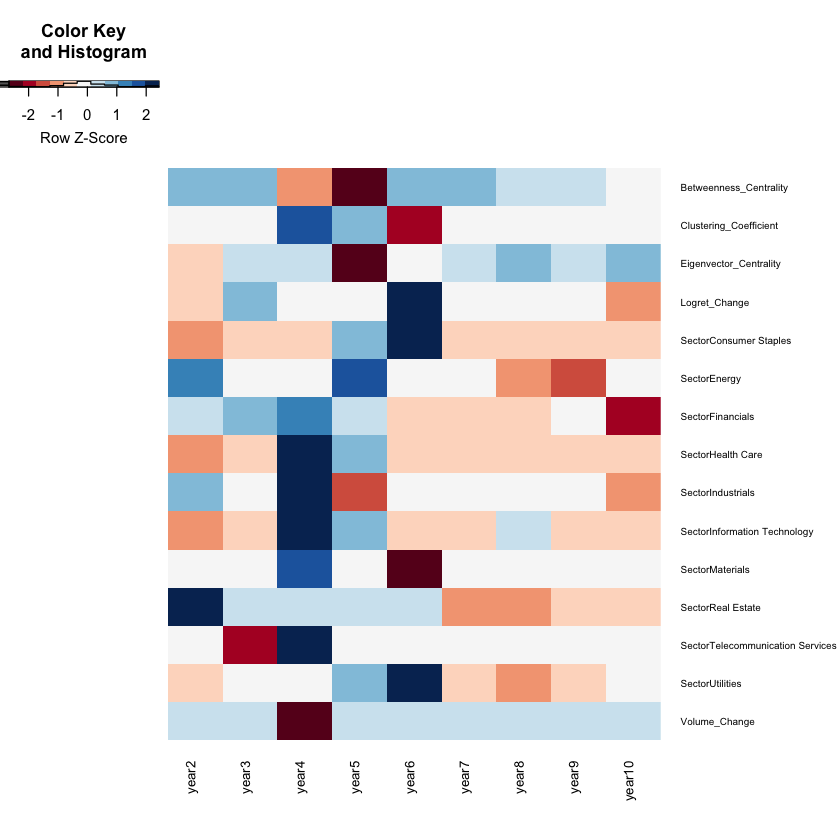

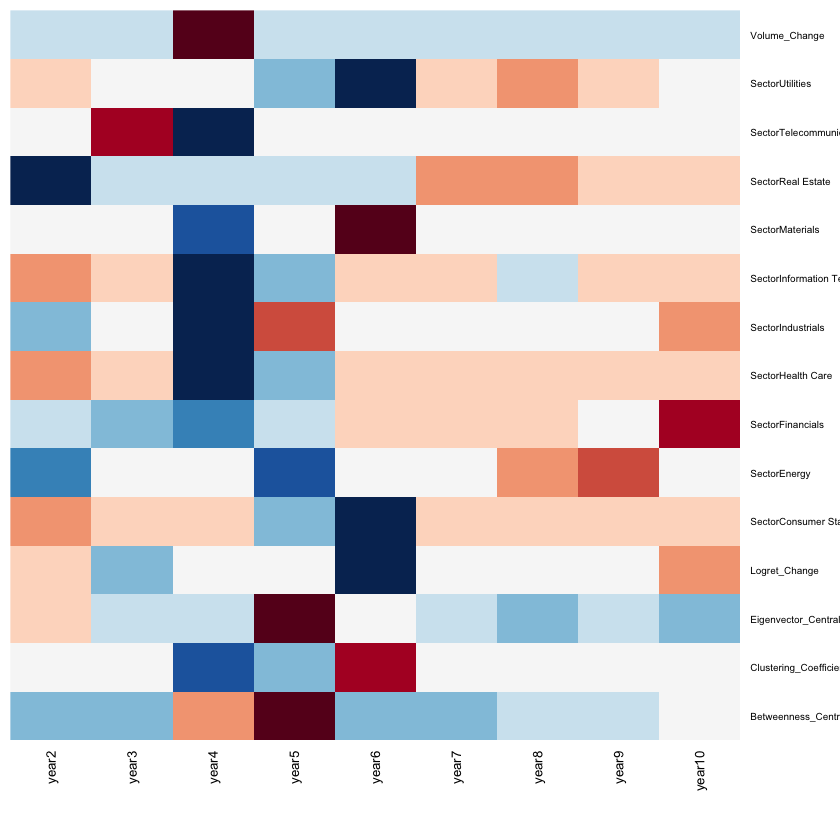

In [37]:
# Create heatmaps
heatmap.2(as.matrix(df_signif_all), col=brewer.pal(11,"RdBu"), Colv=NA, Rowv=NA, scale="row", trace="none", 
          cexRow=0.6, cexCol=0.8, margins=c(5,9), symkey=FALSE, symbreaks=FALSE, dendrogram='none',
          density.info='histogram', denscol="black", keysize=1, key.par=list(mar=c(4.5,0.5,4.5,0.5)))

heatmap(as.matrix(df_signif_all),col=brewer.pal(11,"RdBu"), Colv=NA, Rowv=NA, scale="row", cexRow=0.6, cexCol=0.8)

In [38]:
# All linear regression outputs as an HTML file
#sjt.lm(linregs_all[[1]], linregs_all[[2]], linregs_all[[3]], linregs_all[[4]], linregs_all[[5]],
 #      linregs_all[[6]], linregs_all[[7]], linregs_all[[8]], linregs_all[[9]], show.header=TRUE, group.pred=FALSE)

In [39]:
# Run new linear regressions for each year using all features except average volume
linregs_vol <- list()

for (i in 1:9) {
    linregs_vol[[i]] <- step(lm(Change_Deg_Centr ~ Logret_Change + Betweenness_Centrality + Eigenvector_Centrality + 
                           Clustering_Coefficient + Sector, data=years[[i]]), direction='both')
}

Start:  AIC=-1993.61
Change_Deg_Centr ~ Logret_Change + Betweenness_Centrality + Eigenvector_Centrality + 
    Clustering_Coefficient + Sector

                         Df Sum of Sq    RSS     AIC
- Betweenness_Centrality  1    0.0002 3.0326 -1995.6
- Clustering_Coefficient  1    0.0041 3.0364 -1995.1
<none>                                3.0324 -1993.6
- Logret_Change           1    0.0846 3.1170 -1984.3
- Sector                 10    1.1875 4.2199 -1877.5
- Eigenvector_Centrality  1    3.9423 6.9747 -1652.4

Step:  AIC=-1995.59
Change_Deg_Centr ~ Logret_Change + Eigenvector_Centrality + Clustering_Coefficient + 
    Sector

                         Df Sum of Sq    RSS     AIC
- Clustering_Coefficient  1    0.0049 3.0374 -1996.9
<none>                                3.0326 -1995.6
+ Betweenness_Centrality  1    0.0002 3.0324 -1993.6
- Logret_Change           1    0.0845 3.1171 -1986.3
- Sector                 10    1.1938 4.2263 -1878.8
- Eigenvector_Centrality  1    5.3020 8.3345 -15

In [40]:
coeffs <- list()
sig <- list()
signif <- list()
df_coeffs_vol <- data.frame()
df_signif_vol <- data.frame()

# Print summary statistics of each linear regression
# (slightly worse R2 than regression with volume, except two years with same results)
for (i in 1:length(linregs_vol)) {
    print(i)
    print(summary(linregs_vol[[i]]))
    
    # Create table of coefficients and their significance
    coeffs[[i]] <- summary(linregs_vol[[i]])$coefficients
    sig[[i]] <- data.frame(coeffs[[i]][2:nrow(coeffs[[i]]),1], coeffs[[i]][2:nrow(coeffs[[i]]),4] < 0.05)
    colnames(sig[[i]])[1] <- paste("year", as.character(i+1), "_coeffs", sep = "")
    colnames(sig[[i]])[2] <- paste("year", as.character(i+1), "_signif", sep = "")
    
    df_coeffs_vol <- merge(x = df_coeffs_vol, y = sig[[i]], by = 'row.names', all = TRUE)
    rownames(df_coeffs_vol) <- df_coeffs_vol$Row.names
    df_coeffs_vol <- df_coeffs_vol[,2:ncol(df_coeffs_vol)]
    
    # Create table of only significant coefficients
    signif[[i]] <- data.frame(coeffs[[i]][coeffs[[i]][,4] < 0.05,][,1])
    colnames(signif[[i]])[1] <- paste("year", as.character(i+1), sep = "")
    
    if (i==1) {
        df_signif_vol <- signif[[i]]
    } else {
         df_signif_vol <- merge(x = df_signif_vol, y = signif[[i]], by = 'row.names', all = TRUE)
        rownames(df_signif_vol) <- df_signif_vol$Row.names
        df_signif_vol <- df_signif_vol[,2:ncol(df_signif_vol)]
    
    }
   
}

[1] 1

Call:
lm(formula = Change_Deg_Centr ~ Logret_Change + Eigenvector_Centrality + 
    Sector, data = years[[i]])

Residuals:
     Min       1Q   Median       3Q      Max 
-0.34346 -0.05267  0.00020  0.03742  0.28354 

Coefficients:
                                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)                       0.0229769  0.0156860   1.465 0.143762    
Logret_Change                    -0.3738972  0.1110940  -3.366 0.000838 ***
Eigenvector_Centrality           -5.1586847  0.1786208 -28.881  < 2e-16 ***
SectorConsumer Staples           -0.0550491  0.0218484  -2.520 0.012139 *  
SectorEnergy                      0.0547996  0.0208586   2.627 0.008941 ** 
SectorFinancials                  0.0768631  0.0161985   4.745 2.91e-06 ***
SectorHealth Care                -0.0612867  0.0177538  -3.452 0.000616 ***
SectorIndustrials                 0.0443745  0.0167136   2.655 0.008248 ** 
SectorInformation Technology     -0.0373019  0.0166032  -2.247 0.025207 *  
Sec

In [41]:
# Inspect dataframes
df_coeffs_vol
df_signif_vol

year2_coeffs  year2_signif year3_coeffs
Betweenness_Centrality                      NA    NA        -1.18997613 
Clustering_Coefficient                      NA    NA        -0.04522656 
Eigenvector_Centrality           -5.1586847330  TRUE        -2.62545066 
Logret_Change                    -0.3738972052  TRUE         1.15775763 
SectorConsumer Staples           -0.0550491196  TRUE        -0.02761174 
SectorEnergy                      0.0547995597  TRUE         0.02929656 
SectorFinancials                  0.0768631027  TRUE         0.09511137 
SectorHealth Care                -0.0612866924  TRUE         0.05522819 
SectorIndustrials                 0.0443744941  TRUE         0.06008248 
SectorInformation Technology     -0.0373018781  TRUE        -0.02719127 
SectorMaterials                  -0.0004426018 FALSE         0.01214304 
SectorReal Estate                 0.1341839085  TRUE         0.00698791 
SectorTelecommunication Services -0.0950903804 FALSE        -0.33110177 
SectorUtilities                  -0.0634539707  TRUE        -0.06475244 
                                 year3_signif year4_coeffs year4_signif
Betweenness_Centrality           FALSE        -8.87078848   TRUE       
Clustering_Coefficient           FALSE         0.16965697   TRUE       
Eigenvector_Centrality            TRUE        -2.46834968   TRUE       
Logret_Change                     TRUE                 NA     NA       
SectorConsumer Staples           FALSE         0.07735324  FALSE       
SectorEnergy                     FALSE         0.06755569  FALSE       
SectorFinancials                  TRUE         0.14242519   TRUE       
SectorHealth Care                FALSE         0.23601274   TRUE       
SectorIndustrials                FALSE         0.11247894   TRUE       
SectorInformation Technology     FALSE         0.11870964   TRUE       
SectorMaterials                  FALSE         0.12183822   TRUE       
SectorReal Estate                FALSE        -0.01625363  FALSE       
SectorTelecommunication Services  TRUE         0.30622918   TRUE       
SectorUtilities                  FALSE         0.06147387  FALSE       
                                 year5_coeffs year5_signif year6_coeffs
Betweenness_Centrality           -16.34338176  TRUE                 NA 
Clustering_Coefficient             0.09105133  TRUE        -0.13092750 
Eigenvector_Centrality           -13.75069004  TRUE        -3.21532790 
Logret_Change                              NA    NA         2.58944569 
SectorConsumer Staples             0.11865198  TRUE         0.31465706 
SectorEnergy                       0.08006437  TRUE        -0.01620245 
SectorFinancials                   0.07182562  TRUE        -0.02015590 
SectorHealth Care                  0.12330008  TRUE        -0.05634286 
SectorIndustrials                 -0.07037795  TRUE        -0.07048767 
SectorInformation Technology       0.08006660  TRUE         0.03658568 
SectorMaterials                   -0.01636569 FALSE        -0.17210851 
SectorReal Estate                 -0.04315999 FALSE        -0.09352470 
SectorTelecommunication Services   0.12546317 FALSE         0.01073650 
SectorUtilities                    0.06825368  TRUE         0.14217011 
                                 year6_signif year7_coeffs year7_signif
Betweenness_Centrality              NA                  NA    NA       
Clustering_Coefficient            TRUE         0.022252809  TRUE       
Eigenvector_Centrality            TRUE        -1.259238329  TRUE       
Logret_Change                     TRUE                  NA    NA       
SectorConsumer Staples            TRUE        -0.008346600 FALSE       
SectorEnergy                     FALSE        -0.030291321 FALSE       
SectorFinancials                 FALSE         0.014726528 FALSE       
SectorHealth Care                FALSE        -0.003227197 FALSE       
SectorIndustrials                FALSE         0.001151053 FALSE       
SectorInformation Technology     FALSE        -0.011030428

year2       year3       year4     
(Intercept)                               NA -0.11266923         NA
Betweenness_Centrality                    NA          NA -8.8707885
Clustering_Coefficient                    NA          NA  0.1696570
Eigenvector_Centrality           -5.15868473 -2.62545066 -2.4683497
Logret_Change                    -0.37389721  1.15775763         NA
SectorConsumer Staples           -0.05504912          NA         NA
SectorEnergy                      0.05479956          NA         NA
SectorFinancials                  0.07686310  0.09511137  0.1424252
SectorHealth Care                -0.06128669          NA  0.2360127
SectorIndustrials                 0.04437449          NA  0.1124789
SectorInformation Technology     -0.03730188          NA  0.1187096
SectorMaterials                           NA          NA  0.1218382
SectorReal Estate                 0.13418391          NA         NA
SectorTelecommunication Services          NA -0.33110177  0.3062292
SectorUtilities                  -0.06345397          NA         NA
                                 year5        year6      year7      
(Intercept)                       -0.12148071 -0.3643340          NA
Betweenness_Centrality           -16.34338176         NA          NA
Clustering_Coefficient             0.09105133 -0.1309275  0.02225281
Eigenvector_Centrality           -13.75069004 -3.2153279 -1.25923833
Logret_Change                              NA  2.5894457          NA
SectorConsumer Staples             0.11865198  0.3146571          NA
SectorEnergy                       0.08006437         NA          NA
SectorFinancials                   0.07182562         NA          NA
SectorHealth Care                  0.12330008         NA          NA
SectorIndustrials                 -0.07037795         NA          NA
SectorInformation Technology       0.08006660         NA          NA
SectorMaterials                            NA -0.1721085          NA
SectorReal Estate                          NA         NA -0.06684811
SectorTelecommunication Services           NA         NA          NA
SectorUtilities                    0.06825368  0.1421701 -0.03719307
                                 year8       year9       year10     
(Intercept)                       0.02461851          NA -0.04499536
Betweenness_Centrality           -2.30983115 -1.63633386 -3.42877714
Clustering_Coefficient                    NA          NA          NA
Eigenvector_Centrality           -0.41726070 -2.55917969 -0.67646842
Logret_Change                             NA          NA -0.68244804
SectorConsumer Staples                    NA          NA          NA
SectorEnergy                     -0.04520160 -0.05689292          NA
SectorFinancials                          NA  0.03171906 -0.14308166
SectorHealth Care                         NA          NA          NA
SectorIndustrials                         NA -0.01692379 -0.06299232
SectorInformation Technology      0.05470855          NA          NA
SectorMaterials                           NA          NA          NA
SectorReal Estate                -0.09059081 -0.05592300 -0.03677775
SectorTelecommunication Services          NA          NA          NA
SectorUtilities                  -0.09623198 -0.05734124          NA

In [42]:
# Make NA values 0 and delete Intercept row
df_signif_vol[is.na(df_signif_vol)] <- 0
df_signif_vol <- df_signif_vol[-1,]
df_signif_vol

year2       year3       year4     
Betweenness_Centrality            0.00000000  0.00000000 -8.8707885
Clustering_Coefficient            0.00000000  0.00000000  0.1696570
Eigenvector_Centrality           -5.15868473 -2.62545066 -2.4683497
Logret_Change                    -0.37389721  1.15775763  0.0000000
SectorConsumer Staples           -0.05504912  0.00000000  0.0000000
SectorEnergy                      0.05479956  0.00000000  0.0000000
SectorFinancials                  0.07686310  0.09511137  0.1424252
SectorHealth Care                -0.06128669  0.00000000  0.2360127
SectorIndustrials                 0.04437449  0.00000000  0.1124789
SectorInformation Technology     -0.03730188  0.00000000  0.1187096
SectorMaterials                   0.00000000  0.00000000  0.1218382
SectorReal Estate                 0.13418391  0.00000000  0.0000000
SectorTelecommunication Services  0.00000000 -0.33110177  0.3062292
SectorUtilities                  -0.06345397  0.00000000  0.0000000
                                 year5        year6      year7      
Betweenness_Centrality           -16.34338176  0.0000000  0.00000000
Clustering_Coefficient             0.09105133 -0.1309275  0.02225281
Eigenvector_Centrality           -13.75069004 -3.2153279 -1.25923833
Logret_Change                      0.00000000  2.5894457  0.00000000
SectorConsumer Staples             0.11865198  0.3146571  0.00000000
SectorEnergy                       0.08006437  0.0000000  0.00000000
SectorFinancials                   0.07182562  0.0000000  0.00000000
SectorHealth Care                  0.12330008  0.0000000  0.00000000
SectorIndustrials                 -0.07037795  0.0000000  0.00000000
SectorInformation Technology       0.08006660  0.0000000  0.00000000
SectorMaterials                    0.00000000 -0.1721085  0.00000000
SectorReal Estate                  0.00000000  0.0000000 -0.06684811
SectorTelecommunication Services   0.00000000  0.0000000  0.00000000
SectorUtilities                    0.06825368  0.1421701 -0.03719307
                                 year8       year9       year10     
Betweenness_Centrality           -2.30983115 -1.63633386 -3.42877714
Clustering_Coefficient            0.00000000  0.00000000  0.00000000
Eigenvector_Centrality           -0.41726070 -2.55917969 -0.67646842
Logret_Change                     0.00000000  0.00000000 -0.68244804
SectorConsumer Staples            0.00000000  0.00000000  0.00000000
SectorEnergy                     -0.04520160 -0.05689292  0.00000000
SectorFinancials                  0.00000000  0.03171906 -0.14308166
SectorHealth Care                 0.00000000  0.00000000  0.00000000
SectorIndustrials                 0.00000000 -0.01692379 -0.06299232
SectorInformation Technology      0.05470855  0.00000000  0.00000000
SectorMaterials                   0.00000000  0.00000000  0.00000000
SectorReal Estate                -0.09059081 -0.05592300 -0.03677775
SectorTelecommunication Services  0.00000000  0.00000000  0.00000000
SectorUtilities                  -0.09623198 -0.05734124  0.00000000

In [43]:
# Create heatmap file
png(filename="heatmap_volume.png", width=1000, height=800)
volume_hm <- heatmap.2(as.matrix(df_signif_vol), col=brewer.pal(11,"RdBu"), Colv=NA, Rowv=NA, scale="row", trace="none", 
          cexRow=0.6, cexCol=0.8, margins=c(5,9), symkey=FALSE, symbreaks=FALSE, dendrogram='none',
          density.info='histogram', denscol="black", keysize=1, key.par=list(mar=c(4.5,0.5,4.5,0.5)))
dev.off()

pdf 
  2

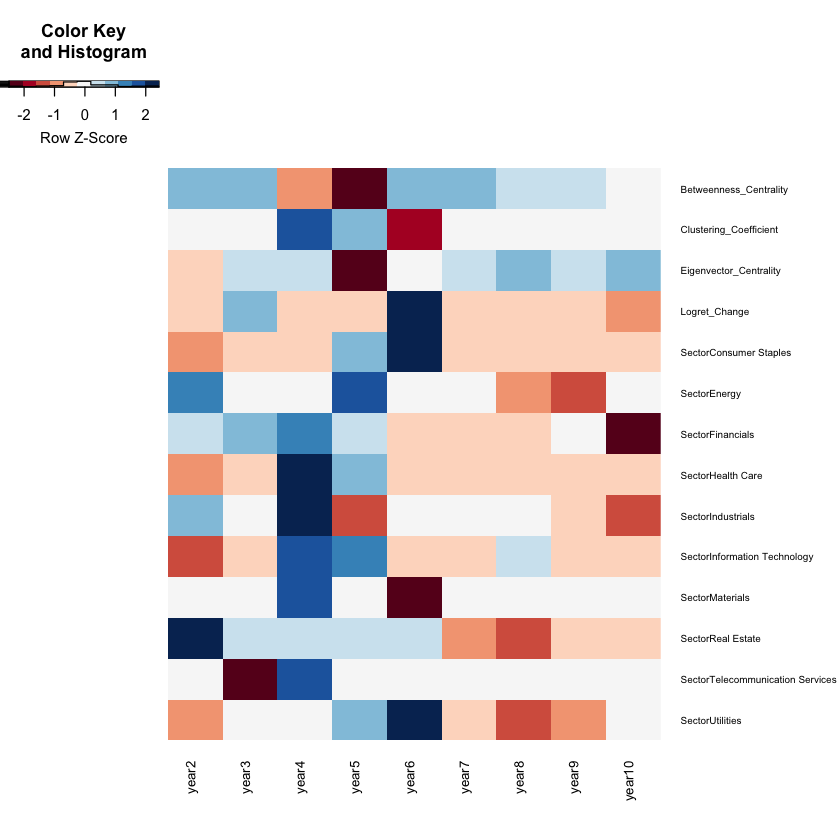

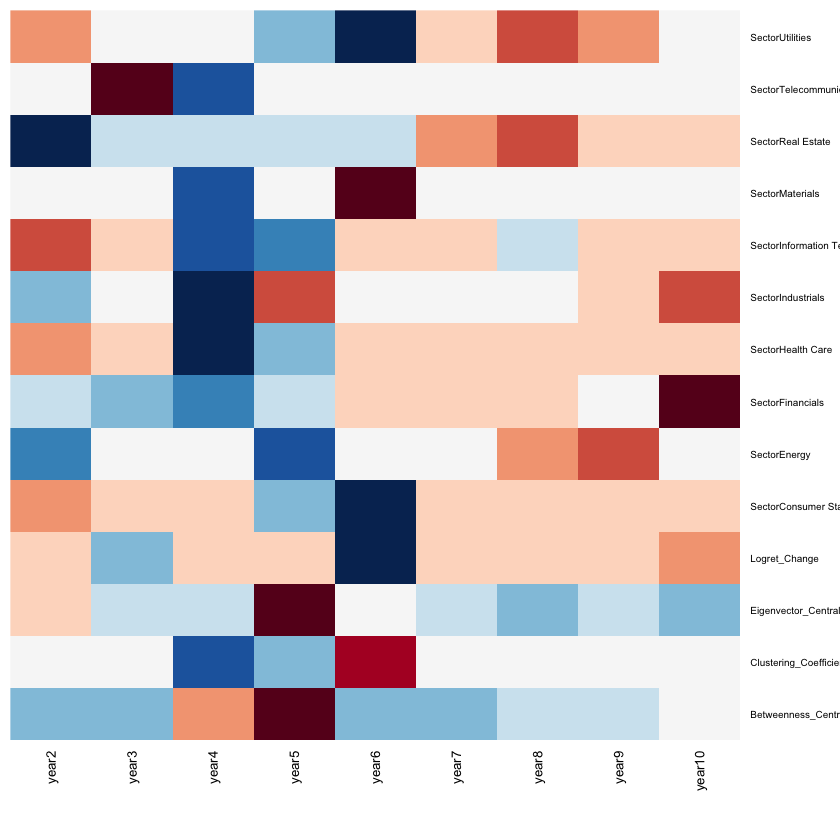

In [44]:
# Create heatmaps
heatmap.2(as.matrix(df_signif_vol), col=brewer.pal(11,"RdBu"), Colv=NA, Rowv=NA, scale="row", trace="none", 
          cexRow=0.6, cexCol=0.8, margins=c(5,9), symkey=FALSE, symbreaks=FALSE, dendrogram='none',
          density.info='histogram', denscol="black", keysize=1, key.par=list(mar=c(4.5,0.5,4.5,0.5)))

heatmap(as.matrix(df_signif_vol),col=brewer.pal(11,"RdBu"), Colv=NA, Rowv=NA, scale="row", cexRow=0.6, cexCol=0.8)

## Build decision trees (regression)

In [45]:
# Build decision (regession) trees for each year with all features
dtrees_all <- list()
for (i in 1:9) {
    dtrees_all[[i]] <- rpart(Change_Deg_Centr ~ Volume_Change + Logret_Change +  Betweenness_Centrality + 
                             Eigenvector_Centrality + Clustering_Coefficient + Sector, data=years[[i]], 
                             method = "anova", cp = 0.01)
}

[1] 1


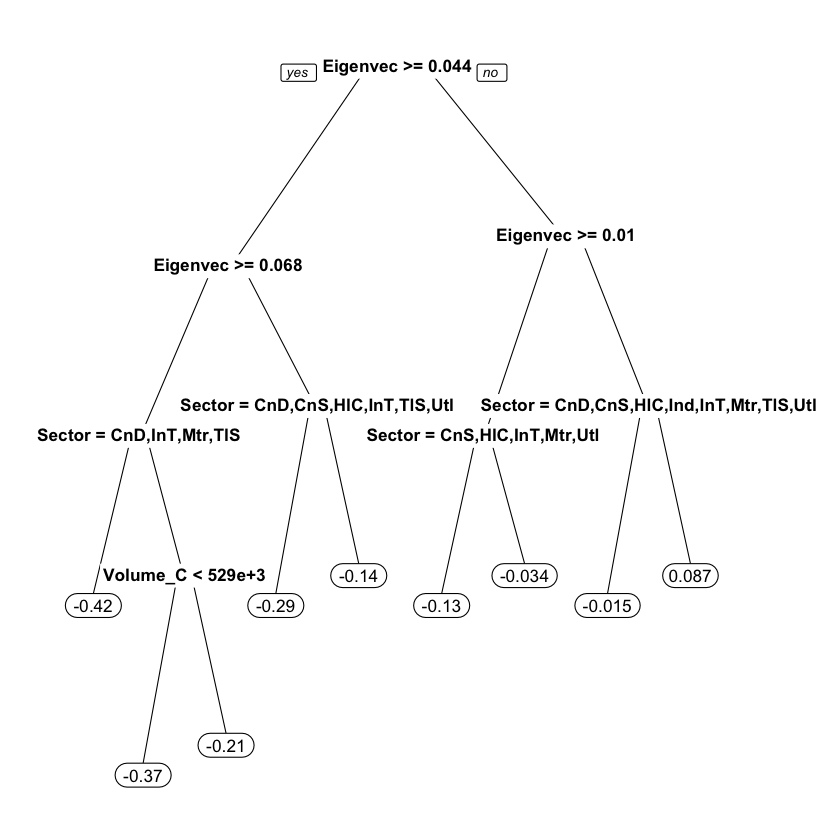

[1] 2


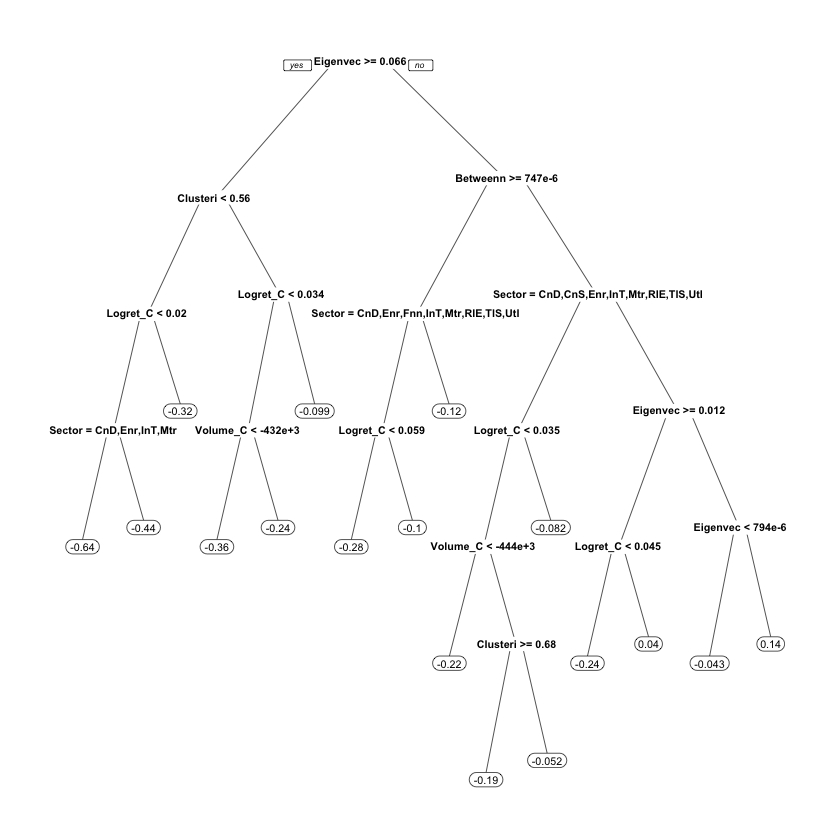

[1] 3


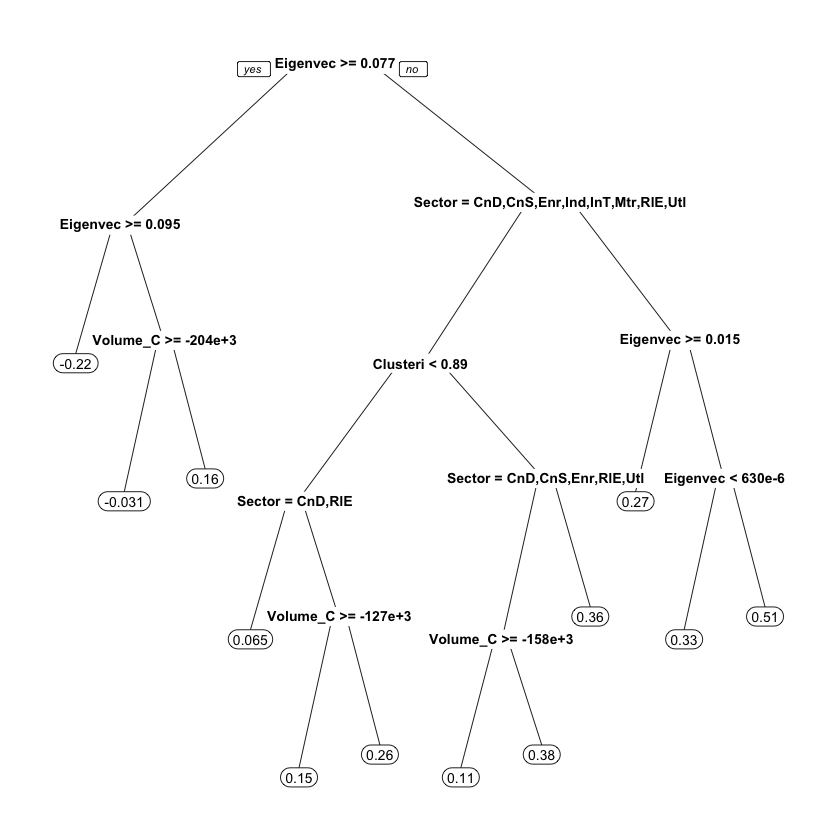

[1] 4


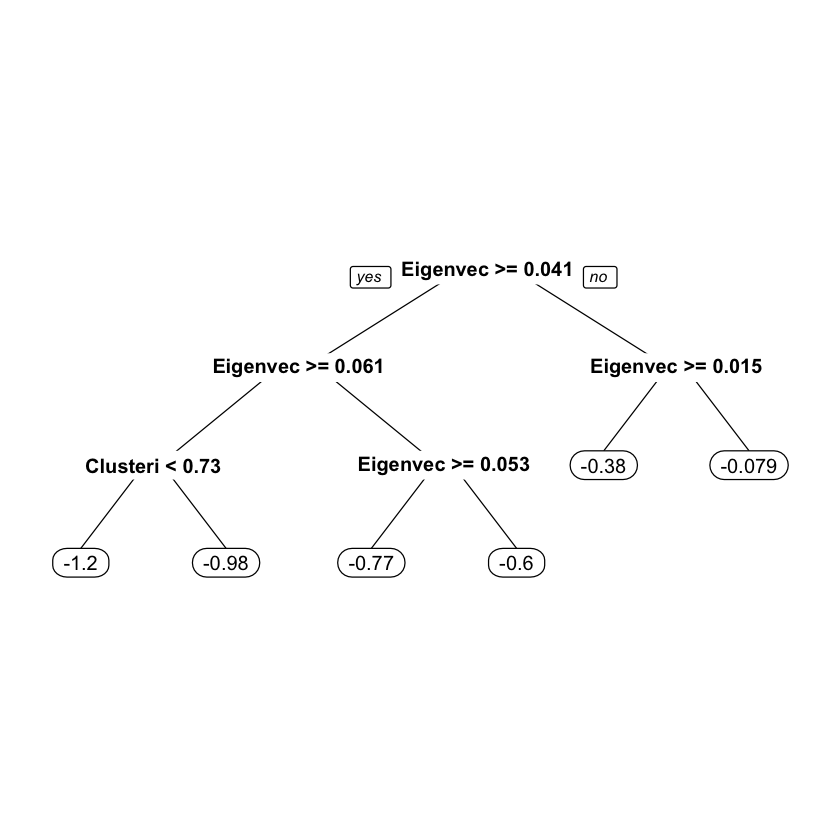

[1] 5


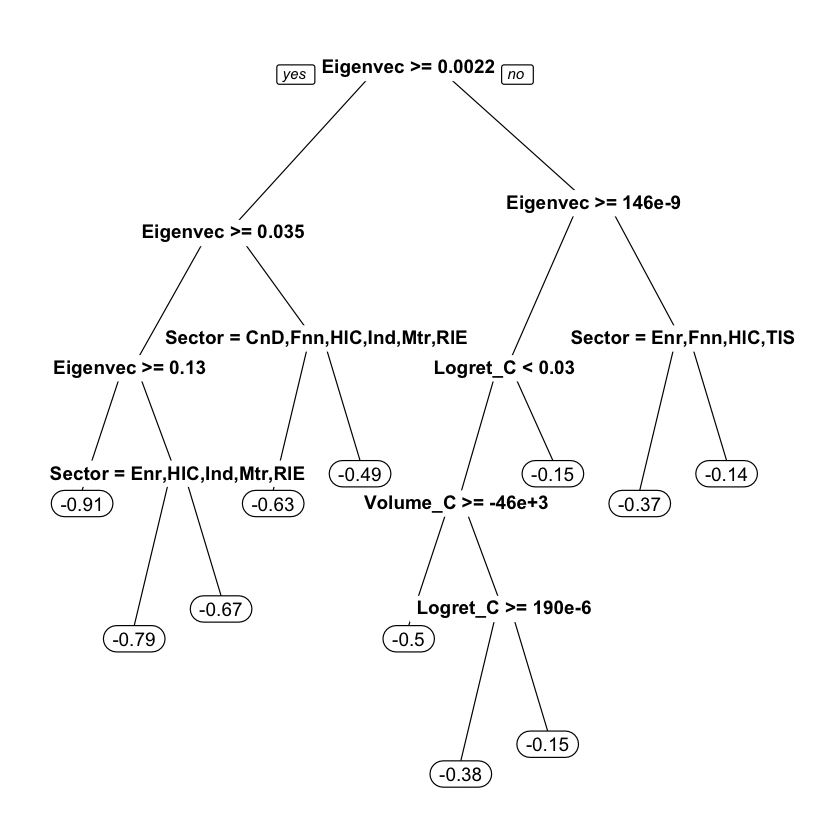

[1] 6


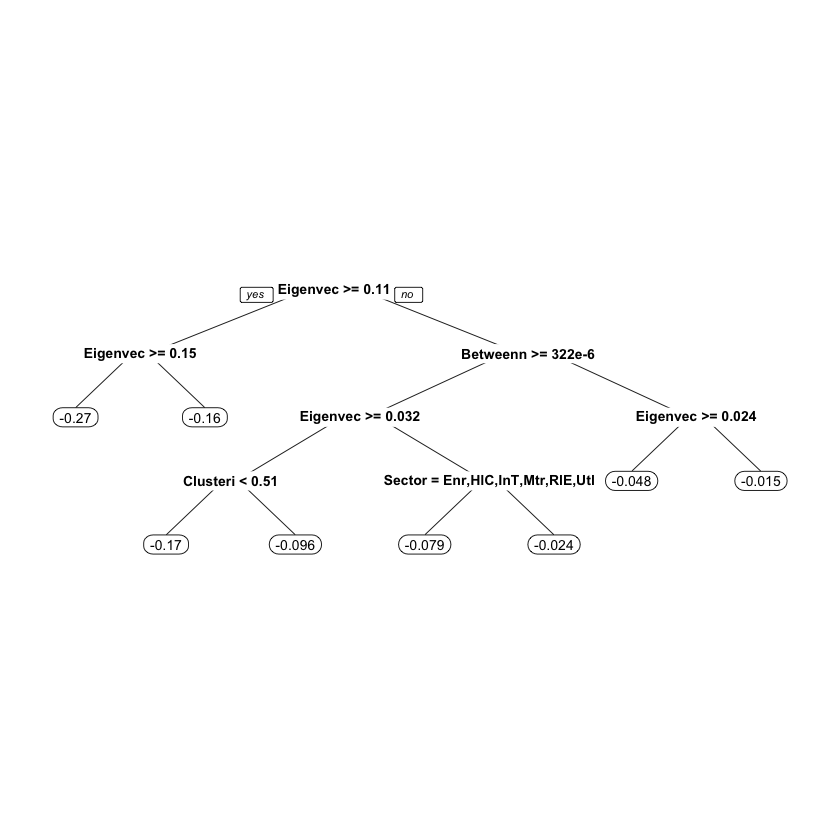

[1] 7


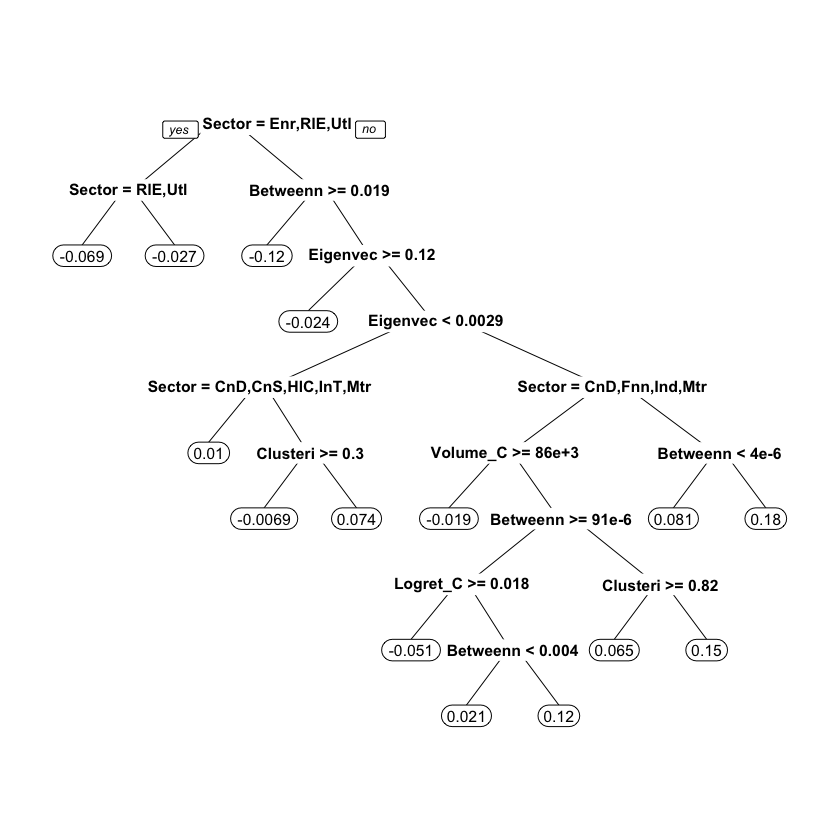

[1] 8


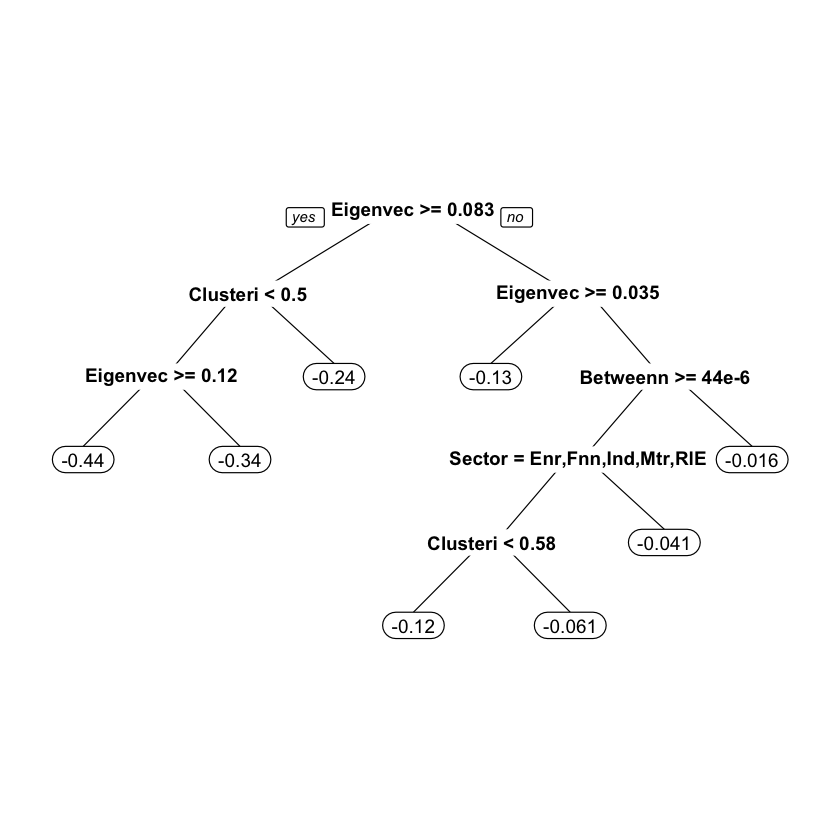

[1] 9


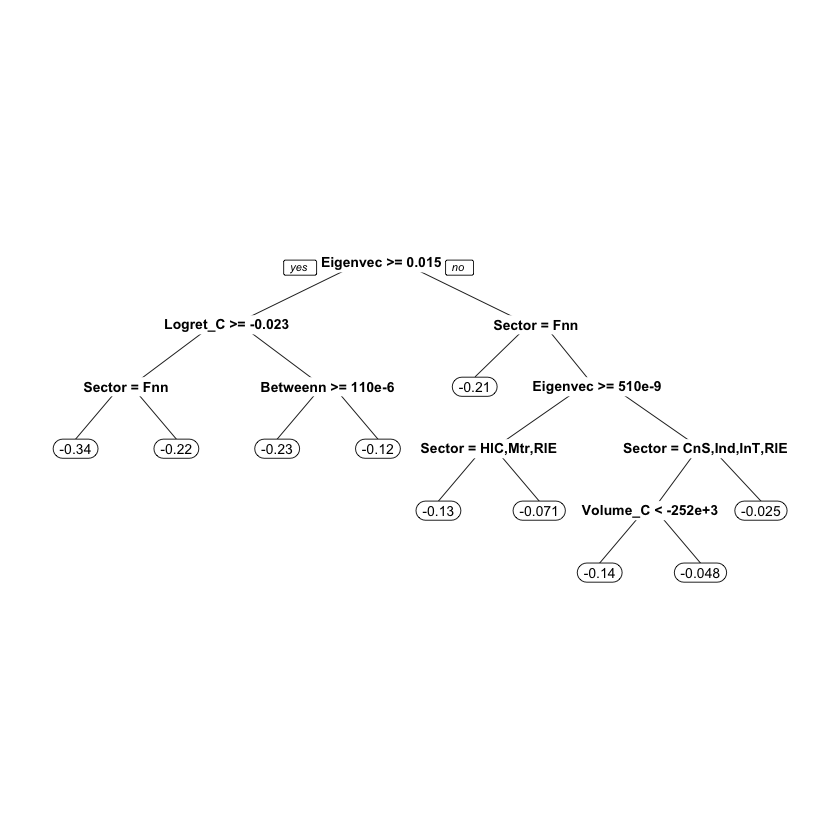

In [46]:
# Decision tree diagrams
for (i in 1:length(dtrees_all)) {
    prp(dtrees_all[[i]])
    png(filename=paste("dtree", as.character(i+1), ".png"), width=800, height=800)
    prp(dtrees_all[[i]])
    dev.off()
    print(i)
}

## Logistic regressions

In [47]:
# Run logistic regressions for each year using all features
logregs_all <- list()

for (i in 1:9) {
    logregs_all[[i]] <- glm(Stays_In_Network ~ Avg_Volume + Logret_Change + Betweenness_Centrality + 
                           Eigenvector_Centrality + Clustering_Coefficient + Sector, family=binomial(link='logit'),
                            data=years[[i]])
}

Warning message:
“glm.fit: algorithm did not converge”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

In [48]:
# Print summary statistics of each linear regression 
# (slightly worse R2 than regression with volume, except two years with same results)
for (i in 1:length(logregs_all)) {
    print(i)
    print(summary(logregs_all[[i]]))
}

[1] 1

Call:
glm(formula = Stays_In_Network ~ Avg_Volume + Logret_Change + 
    Betweenness_Centrality + Eigenvector_Centrality + Clustering_Coefficient + 
    Sector, family = binomial(link = "logit"), data = years[[i]])

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-2.91051   0.00008   0.15705   0.28295   1.85806  

Coefficients:
                                   Estimate Std. Error z value Pr(>|z|)    
(Intercept)                       3.514e+00  1.296e+00   2.711  0.00672 ** 
Avg_Volume                        6.802e-08  9.617e-08   0.707  0.47941    
Logret_Change                    -7.199e+00  5.535e+00  -1.301  0.19338    
Betweenness_Centrality           -8.492e+00  1.241e+02  -0.068  0.94544    
Eigenvector_Centrality            2.296e+01  1.303e+01   1.762  0.07806 .  
Clustering_Coefficient           -9.822e-01  8.406e-01  -1.168  0.24264    
SectorConsumer Staples           -4.745e+00  1.142e+00  -4.155 3.25e-05 ***
SectorEnergy                   

[1] 1
Analysis of Deviance Table

Model: binomial, link: logit

Response: Stays_In_Network

Terms added sequentially (first to last)


                       Df Deviance Resid. Df Resid. Dev  Pr(>Chi)    
NULL                                     411     288.36              
Avg_Volume              1    0.506       410     287.86 0.4769597    
Logret_Change           1   14.663       409     273.19 0.0001286 ***
Betweenness_Centrality  1   12.781       408     260.41 0.0003502 ***
Eigenvector_Centrality  1   28.716       407     231.69 8.380e-08 ***
Clustering_Coefficient  1    0.061       406     231.63 0.8046733    
Sector                 10   77.316       396     154.32 1.682e-12 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


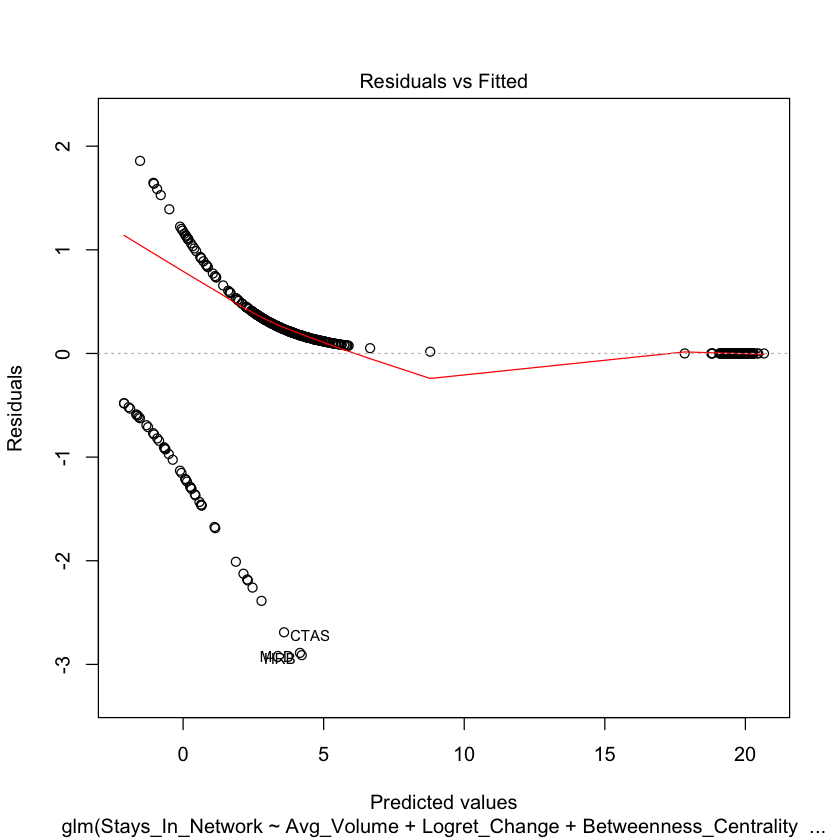

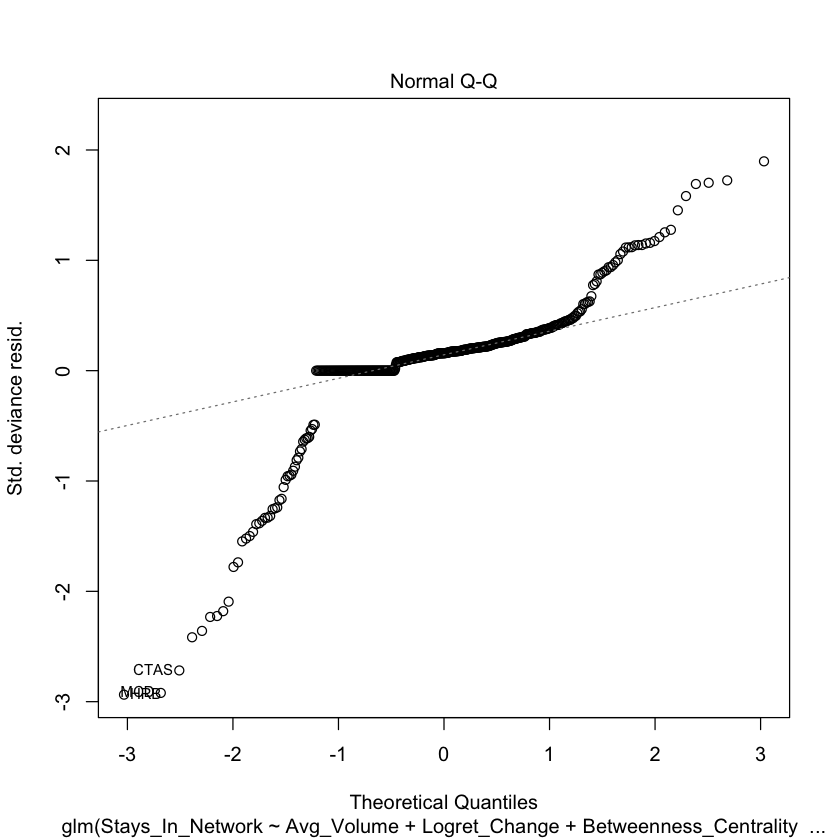

Classes and Methods for R developed in the
Political Science Computational Laboratory
Department of Political Science
Stanford University
Simon Jackman
hurdle and zeroinfl functions by Achim Zeileis


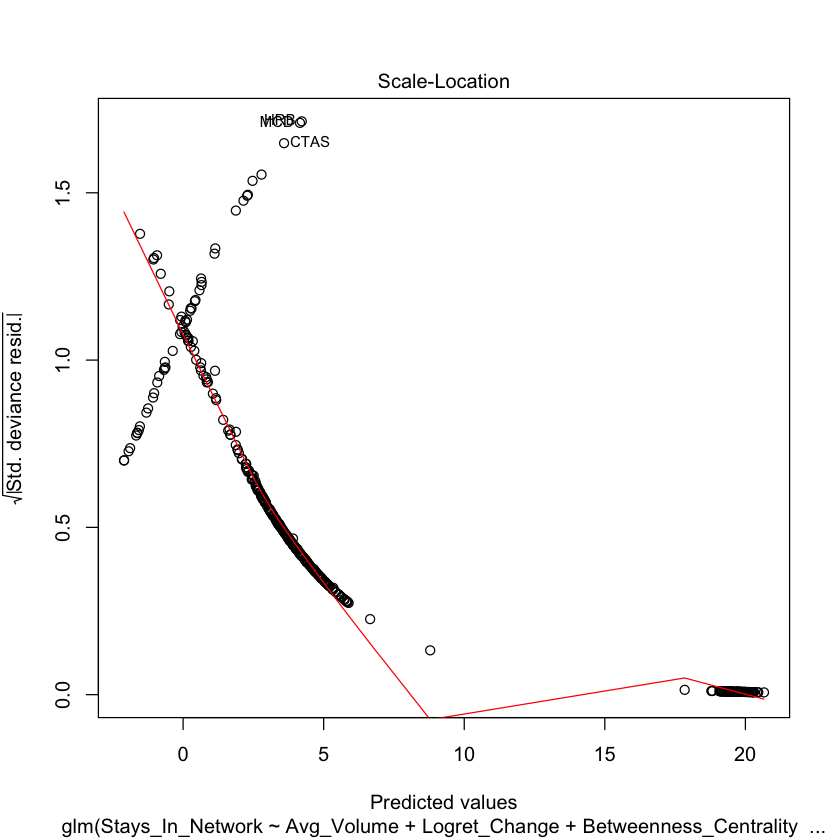

         llh      llhNull           G2     McFadden         r2ML         r2CU 
 -77.1592601 -144.1803157  134.0421111    0.4648419    0.2777218    0.5517280 
                                     Overall
Avg_Volume                       0.707258757
Logret_Change                    1.300640670
Betweenness_Centrality           0.068434336
Eigenvector_Centrality           1.762054120
Clustering_Coefficient           1.168404611
SectorConsumer Staples           4.155210176
SectorEnergy                     0.007633674
SectorFinancials                 0.059174307
SectorHealth Care                2.921248877
SectorIndustrials                0.998605244
SectorInformation Technology     1.039430987
SectorMaterials                  0.791150695
SectorReal Estate                0.007814775
SectorTelecommunication Services 2.093429079
SectorUtilities                  0.007526116
[1] 2
Analysis of Deviance Table

Model: binomial, link: logit

Response: Stays_In_Network

Terms added sequentially (firs

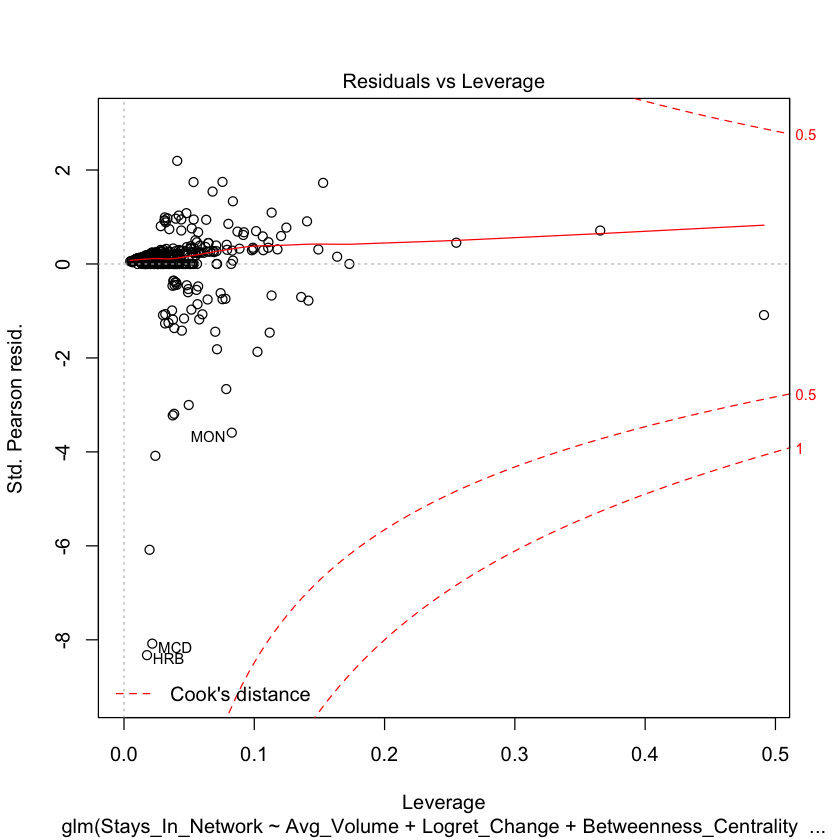

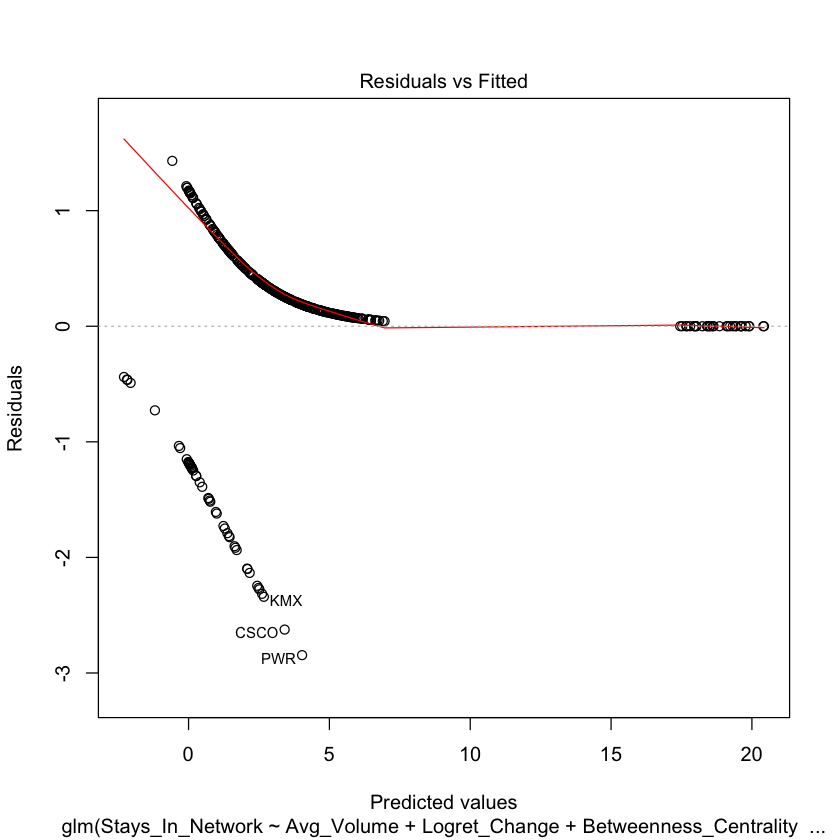

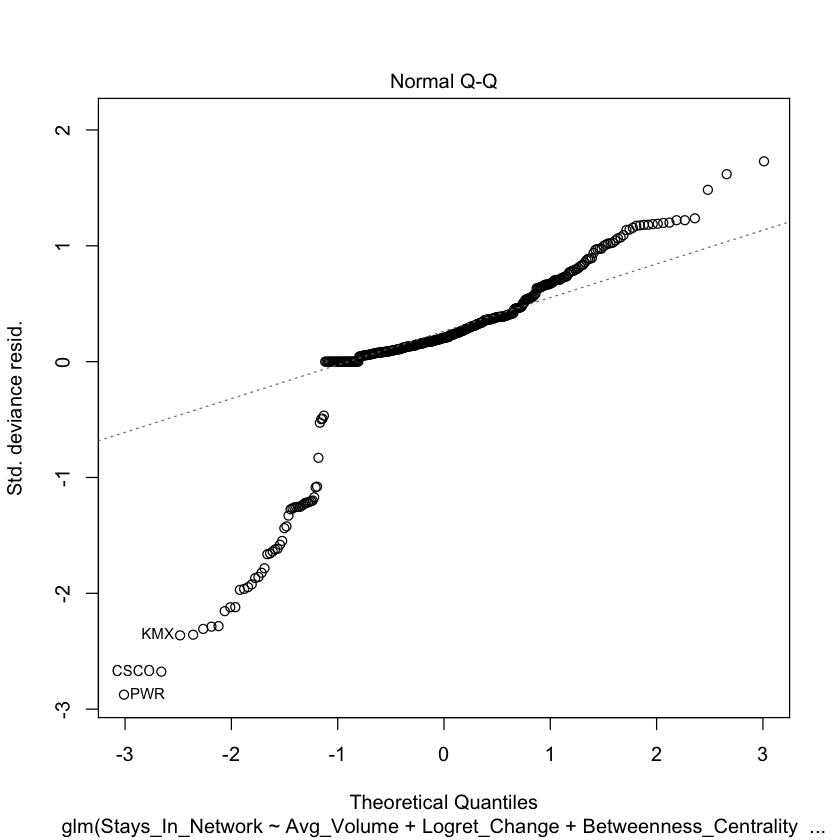

         llh      llhNull           G2     McFadden         r2ML         r2CU 
-101.7121274 -148.3848014   93.3453481    0.3145381    0.2162942    0.4011170 
                                     Overall
Avg_Volume                       0.702704767
Logret_Change                    0.841053290
Betweenness_Centrality           0.396598537
Eigenvector_Centrality           3.021876586
Clustering_Coefficient           2.549354236
SectorConsumer Staples           2.768735552
SectorEnergy                     0.012457104
SectorFinancials                 0.842562177
SectorHealth Care                2.029405687
SectorIndustrials                0.507714967
SectorInformation Technology     2.129678924
SectorMaterials                  0.639347455
SectorReal Estate                1.832464991
SectorTelecommunication Services 0.003764018
SectorUtilities                  0.062824307
[1] 3


Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: algorithm did not converge”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: algorithm did not converge”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: algorithm did not converge”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

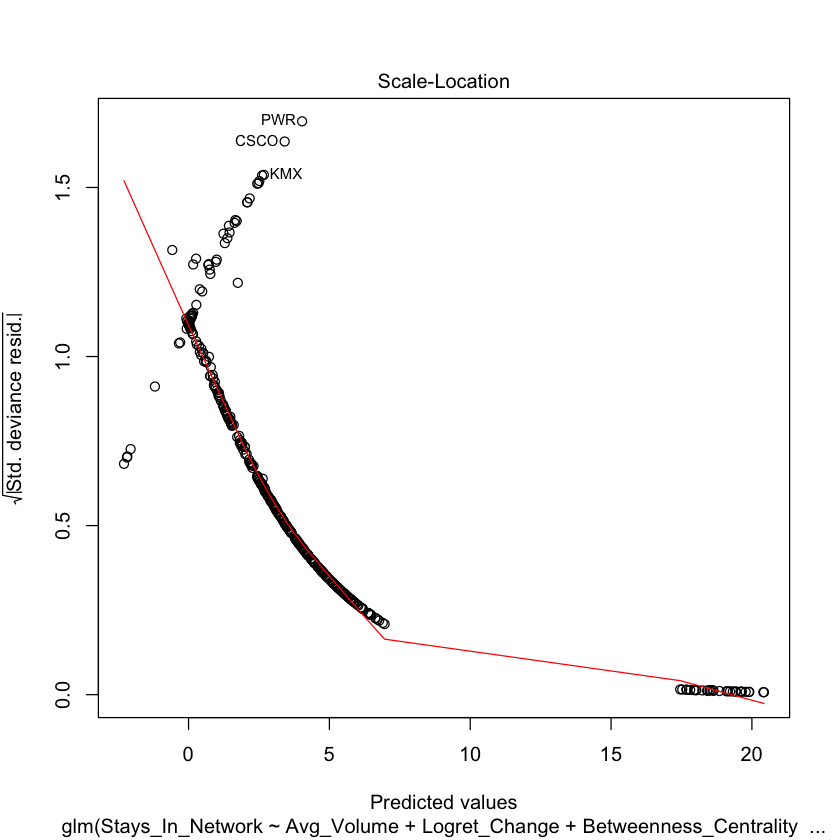

Analysis of Deviance Table

Model: binomial, link: logit

Response: Stays_In_Network

Terms added sequentially (first to last)


                       Df Deviance Resid. Df Resid. Dev Pr(>Chi)   
NULL                                     353    24.6933            
Avg_Volume              1   0.7871       352    23.9061 0.374967   
Logret_Change           1   0.2336       351    23.6726 0.628891   
Betweenness_Centrality  1   8.2560       350    15.4166 0.004062 **
Eigenvector_Centrality  1   0.4392       349    14.9774 0.507499   
Clustering_Coefficient  1   0.0139       348    14.9635 0.906207   
Sector                 10   5.8743       338     9.0891 0.825707   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


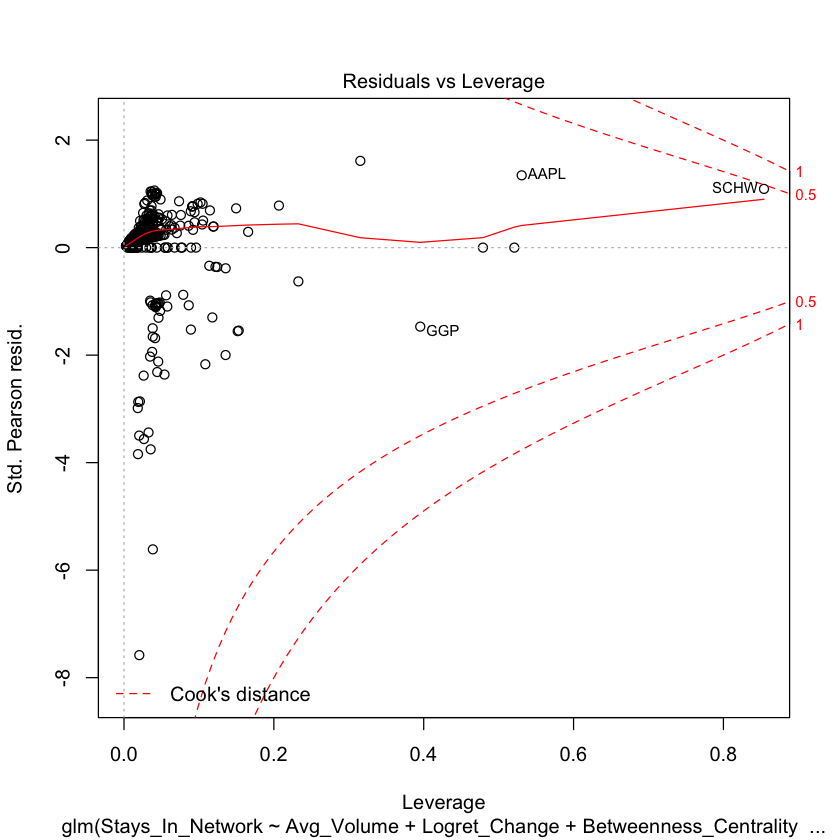

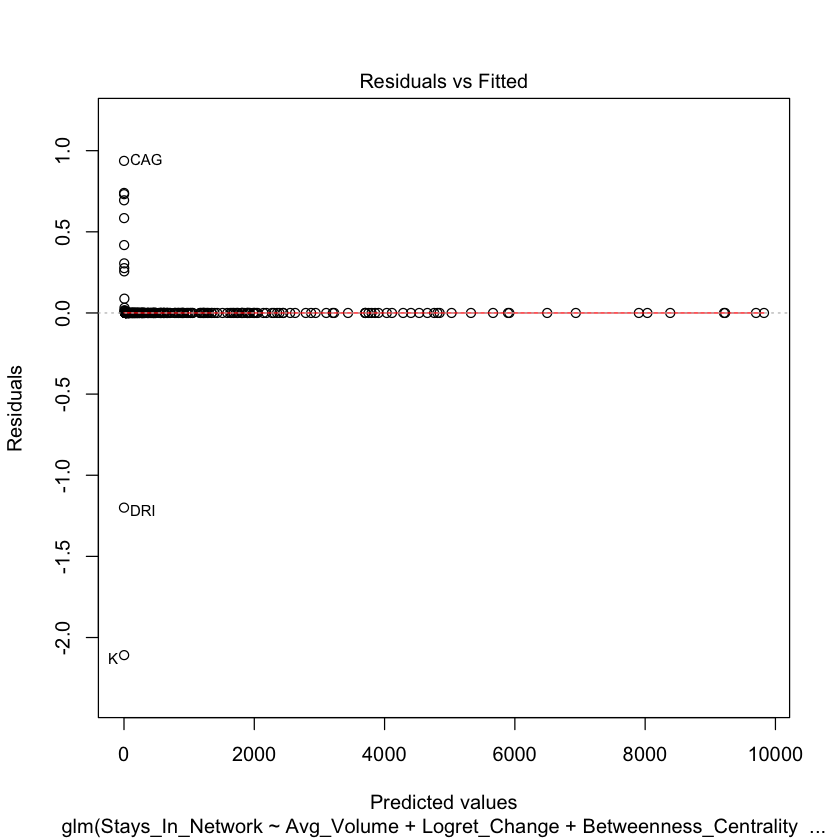

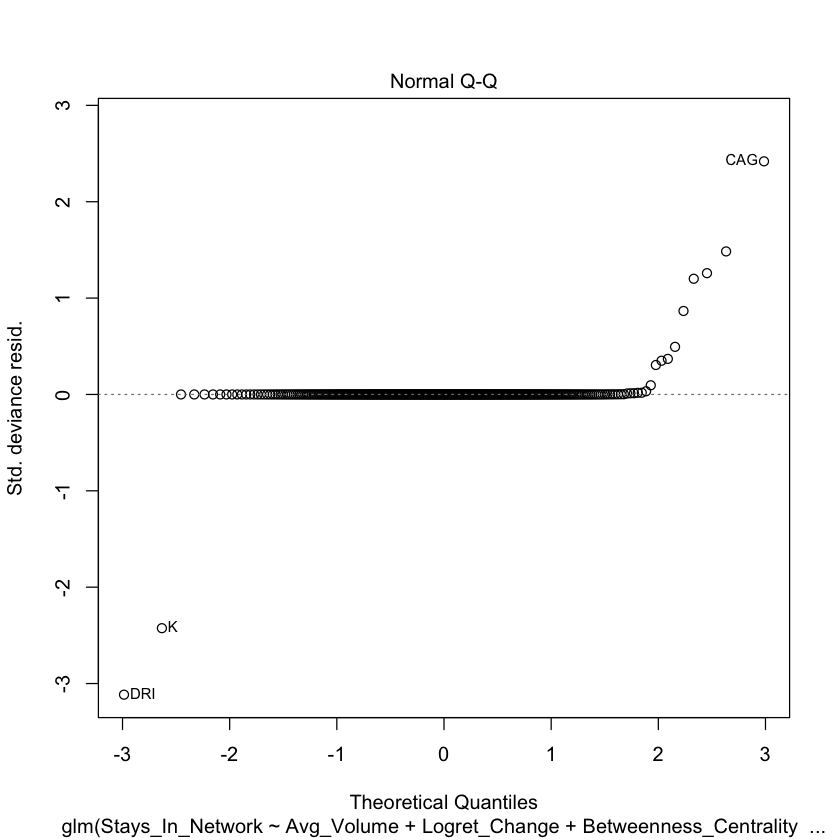

Warning message in sqrt(crit * p * (1 - hh)/hh):
“NaNs produced”Warning message in sqrt(crit * p * (1 - hh)/hh):
“NaNs produced”

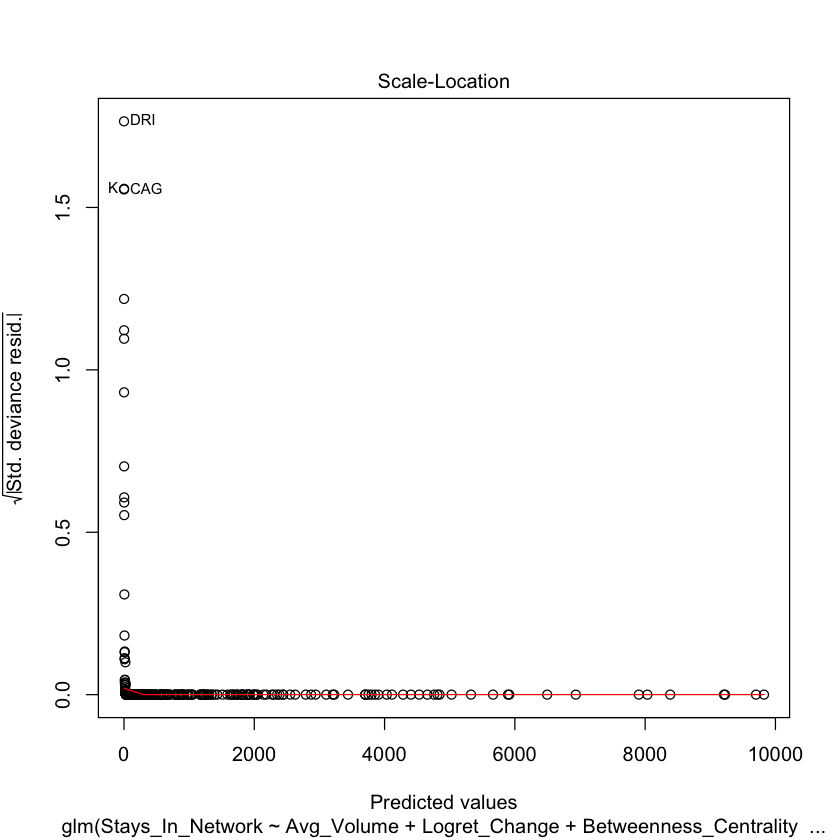

         llh      llhNull           G2     McFadden         r2ML         r2CU 
 -4.54456722 -12.34663908  15.60414371   0.63191868   0.04312212   0.64000545 
                                      Overall
Avg_Volume                       6.111224e-01
Logret_Change                    5.446787e-01
Betweenness_Centrality           4.051775e-02
Eigenvector_Centrality           3.758729e-01
Clustering_Coefficient           5.835075e-01
SectorConsumer Staples           4.799935e-01
SectorEnergy                     6.851701e-04
SectorFinancials                 7.497495e-04
SectorHealth Care                6.036688e-04
SectorIndustrials                9.018970e-04
SectorInformation Technology     2.814760e-03
SectorMaterials                  9.034372e-04
SectorReal Estate                6.978662e-04
SectorTelecommunication Services 5.133941e-05
SectorUtilities                  4.935334e-04
[1] 4
Analysis of Deviance Table

Model: binomial, link: logit

Response: Stays_In_Network

Terms added se

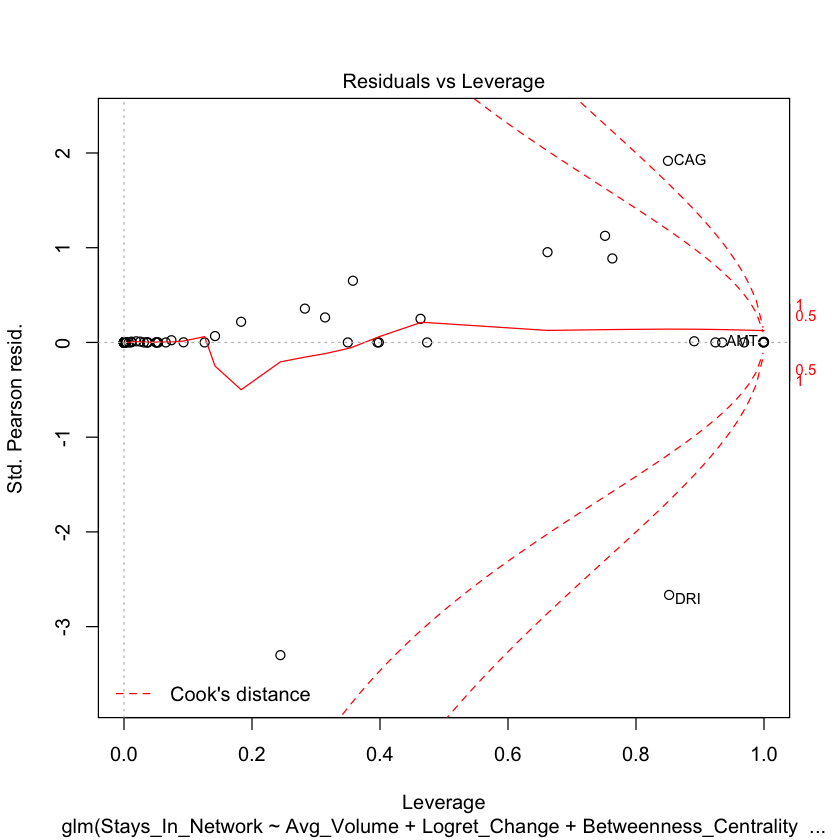

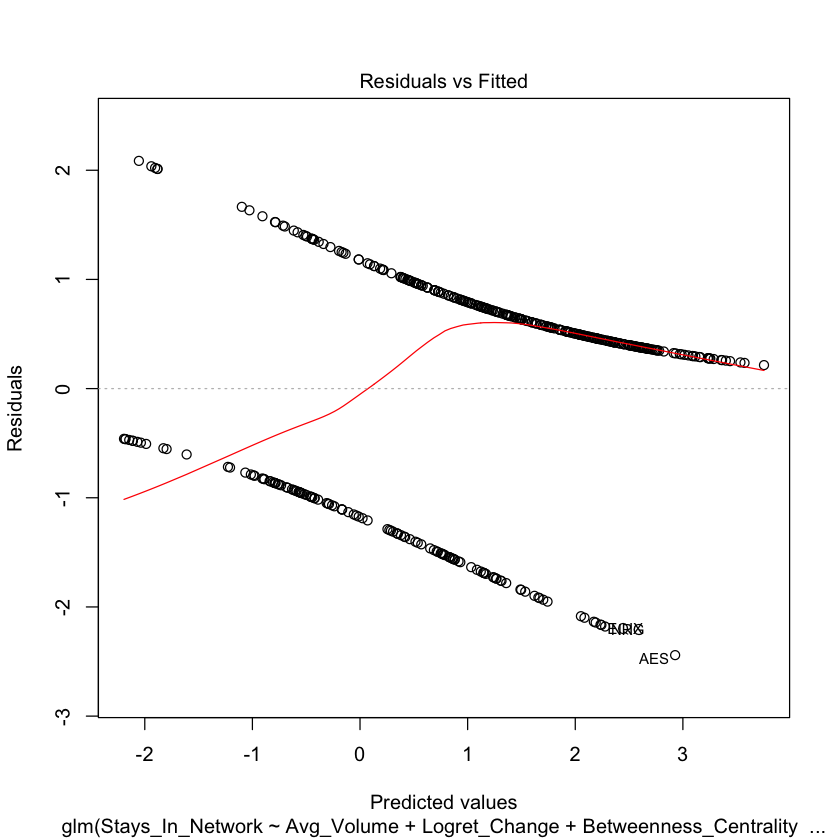

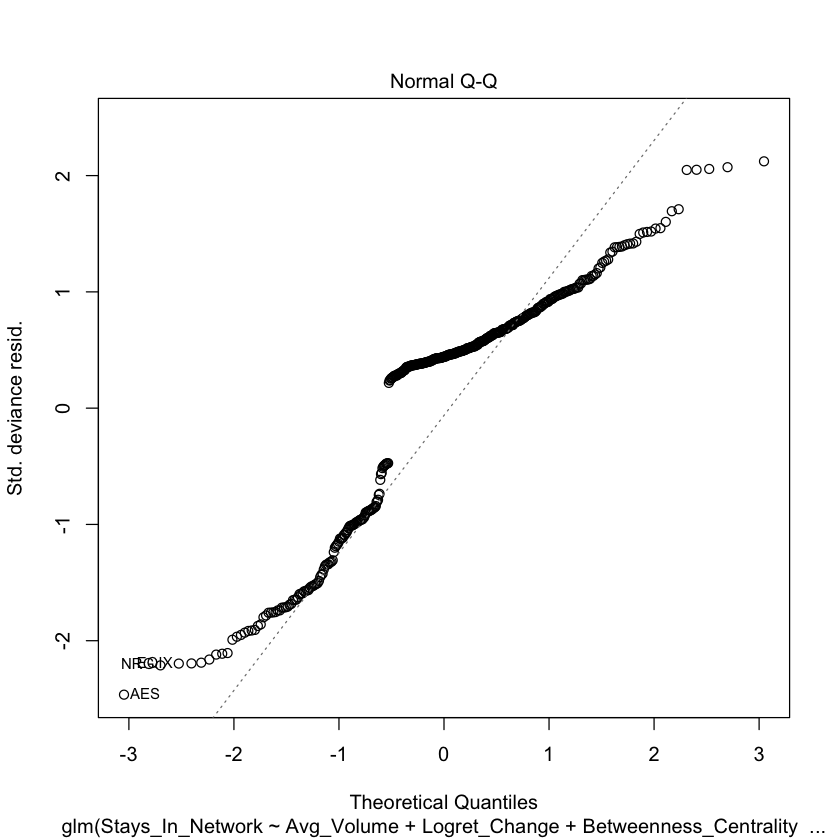

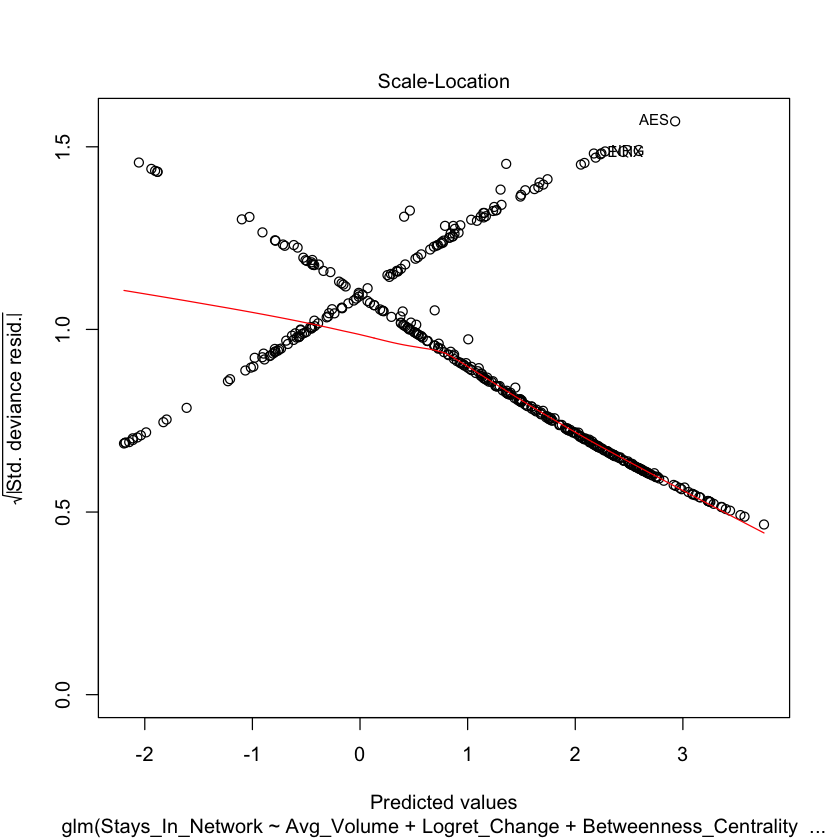

         llh      llhNull           G2     McFadden         r2ML         r2CU 
-205.6695335 -263.3830139  115.4269608    0.2191238    0.2344740    0.3327842 
                                     Overall
Avg_Volume                       0.979761886
Logret_Change                    0.751607383
Betweenness_Centrality           1.563948750
Eigenvector_Centrality           3.902616254
Clustering_Coefficient           0.003298786
SectorConsumer Staples           2.535944934
SectorEnergy                     2.514833794
SectorFinancials                 2.062731031
SectorHealth Care                1.049748541
SectorIndustrials                0.466913650
SectorInformation Technology     0.755363859
SectorMaterials                  1.201940406
SectorReal Estate                2.100432323
SectorTelecommunication Services 0.409542274
SectorUtilities                  2.574821766
[1] 5
Analysis of Deviance Table

Model: binomial, link: logit

Response: Stays_In_Network

Terms added sequentially (firs

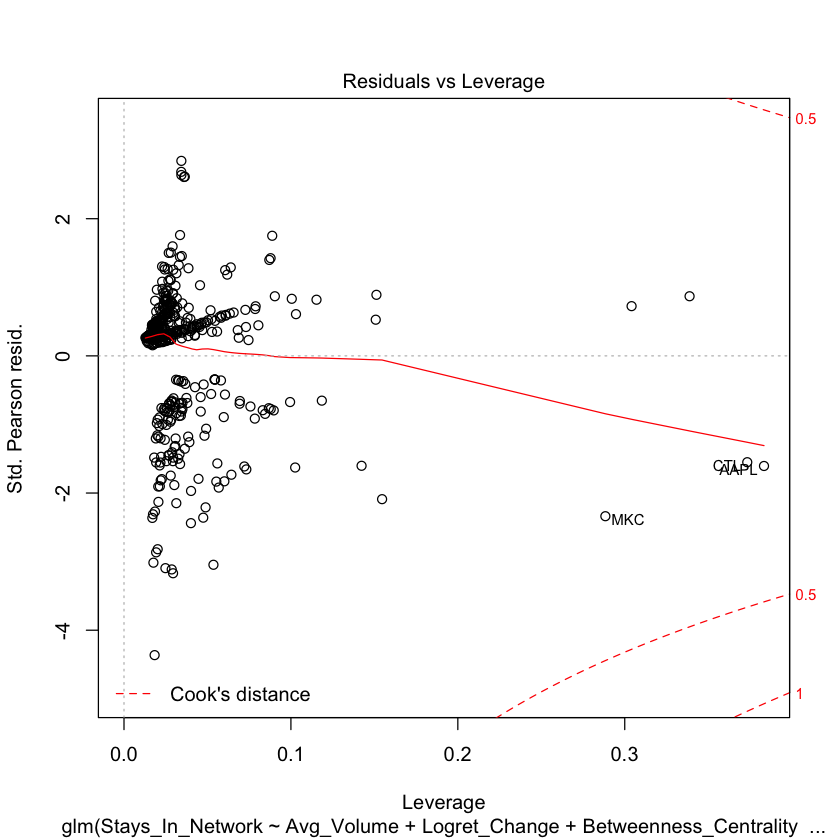

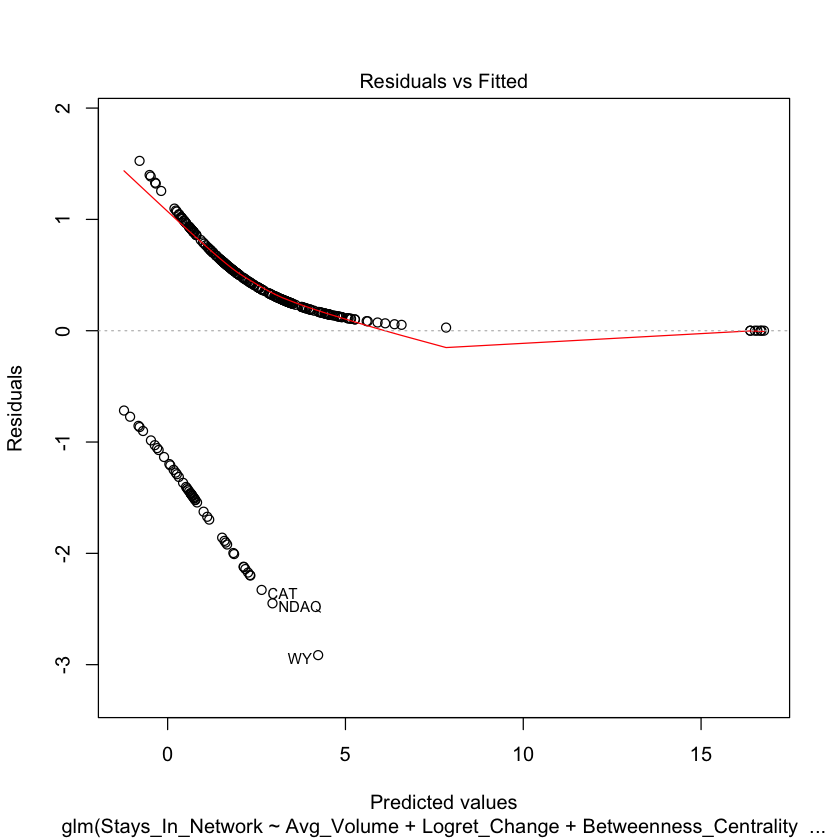

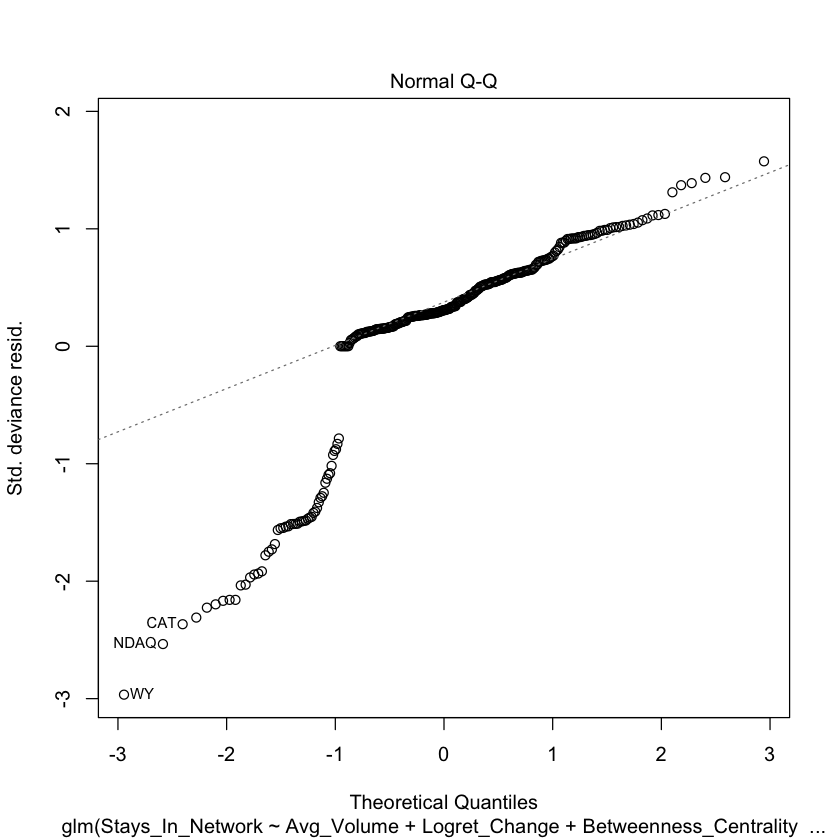

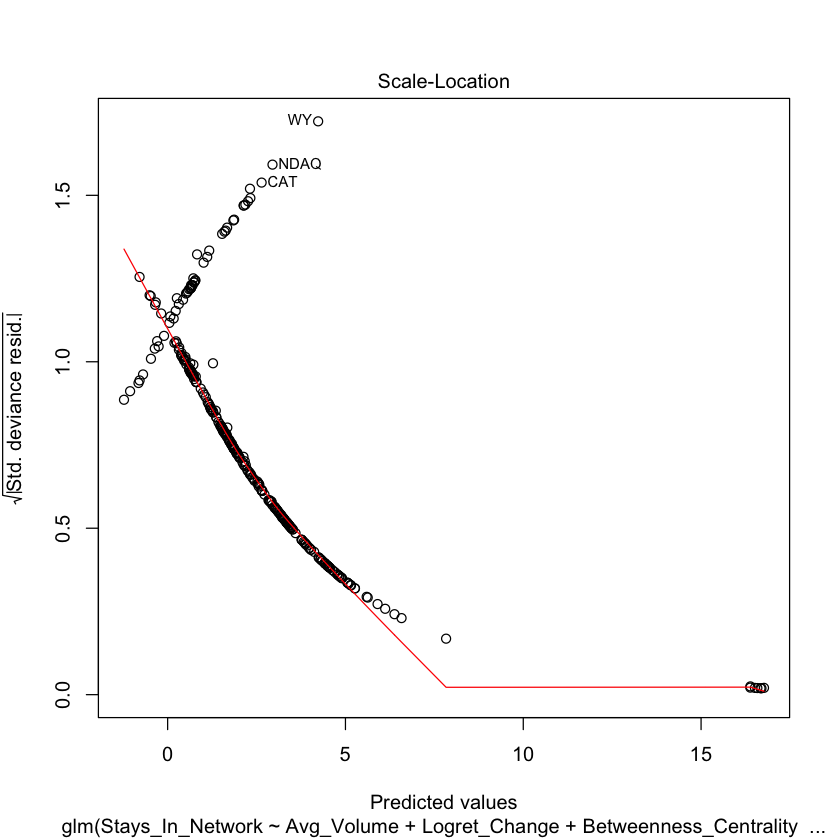

         llh      llhNull           G2     McFadden         r2ML         r2CU 
-109.0131524 -140.0252274   62.0241500    0.2214749    0.1818629    0.3051450 
                                     Overall
Avg_Volume                       1.904261894
Logret_Change                    0.036852417
Betweenness_Centrality           0.449280695
Eigenvector_Centrality           1.650825114
Clustering_Coefficient           1.638493596
SectorConsumer Staples           0.014875036
SectorEnergy                     0.067032192
SectorFinancials                 1.820009498
SectorHealth Care                0.069620207
SectorIndustrials                0.486613731
SectorInformation Technology     2.051933142
SectorMaterials                  0.850597511
SectorReal Estate                1.661324855
SectorTelecommunication Services 0.009699801
SectorUtilities                  1.560515025
[1] 6
Analysis of Deviance Table

Model: binomial, link: logit

Response: Stays_In_Network

Terms added sequentially (firs

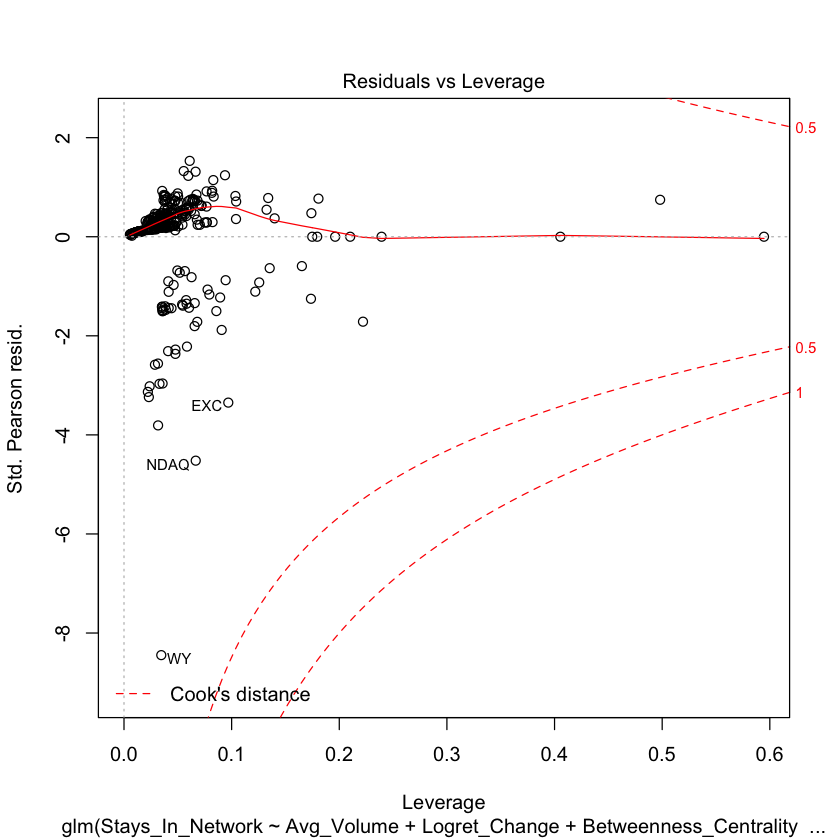

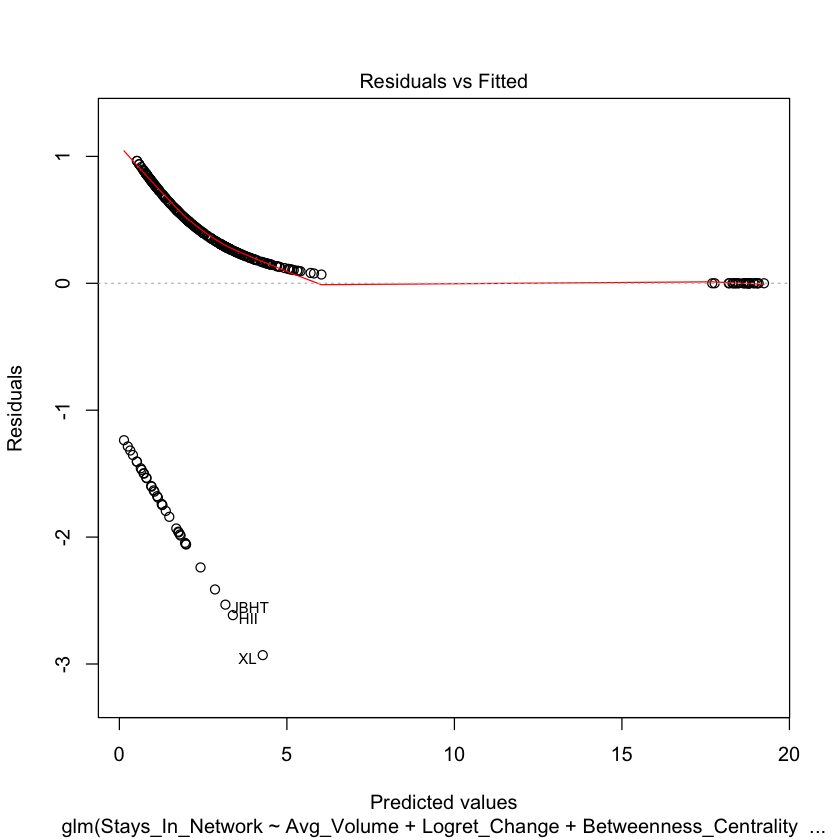

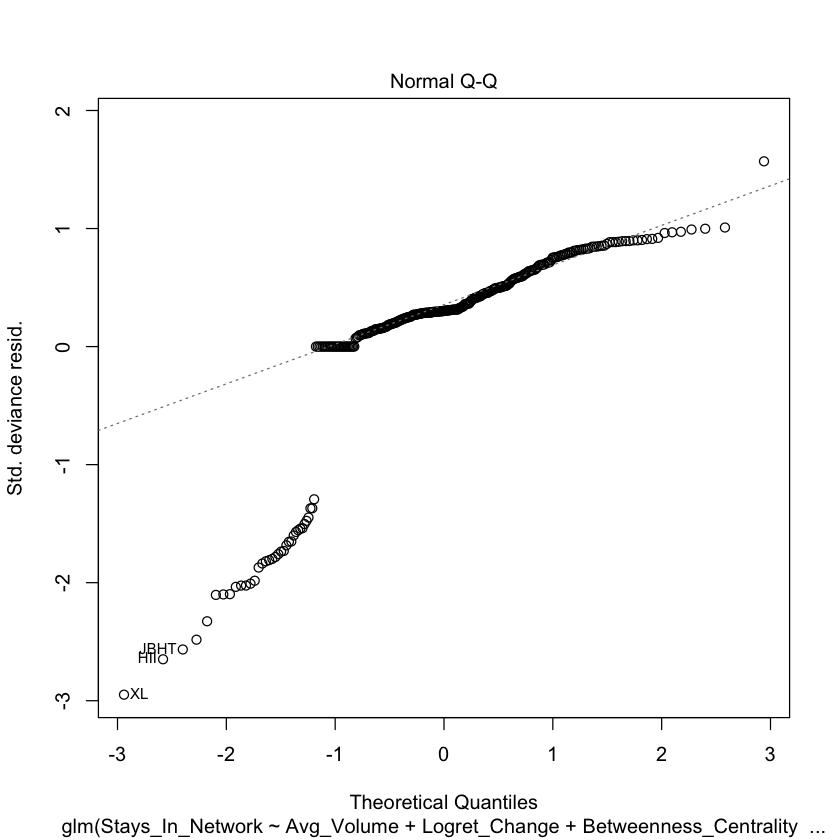

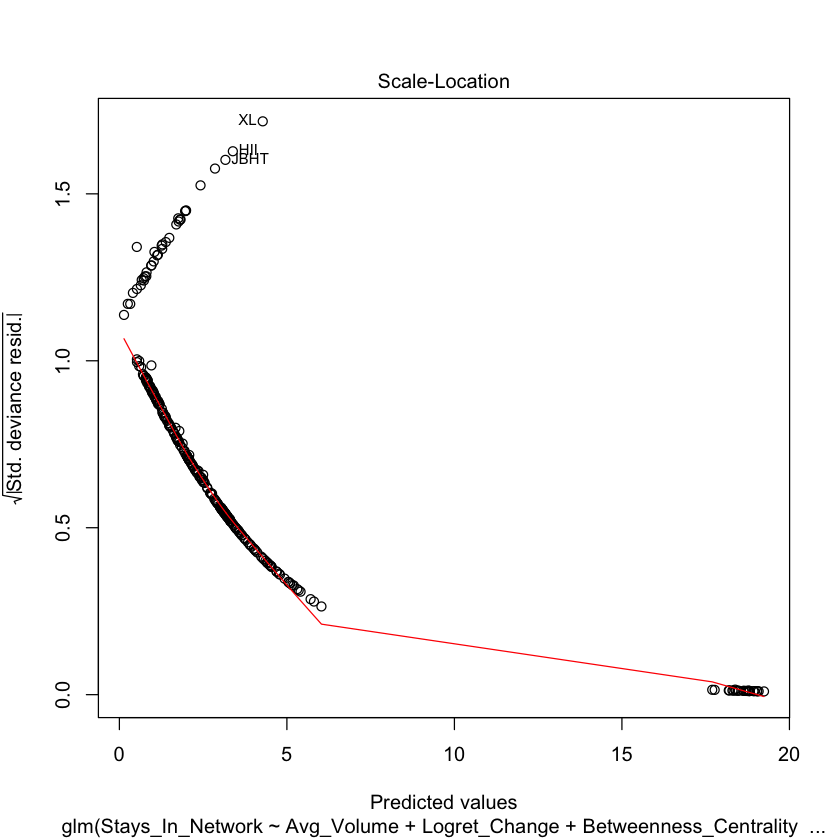

         llh      llhNull           G2     McFadden         r2ML         r2CU 
 -91.4699769 -110.7110490   38.4821441    0.1737954    0.1185359    0.2296553 
                                     Overall
Avg_Volume                       1.440706282
Logret_Change                    0.910820739
Betweenness_Centrality           0.099572559
Eigenvector_Centrality           1.535112347
Clustering_Coefficient           0.121996022
SectorConsumer Staples           0.318673769
SectorEnergy                     0.013408713
SectorFinancials                 1.091841926
SectorHealth Care                0.870571140
SectorIndustrials                1.900277159
SectorInformation Technology     0.443696882
SectorMaterials                  0.635680043
SectorReal Estate                0.982256849
SectorTelecommunication Services 0.003909222
SectorUtilities                  1.658941979
[1] 7
Analysis of Deviance Table

Model: binomial, link: logit

Response: Stays_In_Network

Terms added sequentially (firs

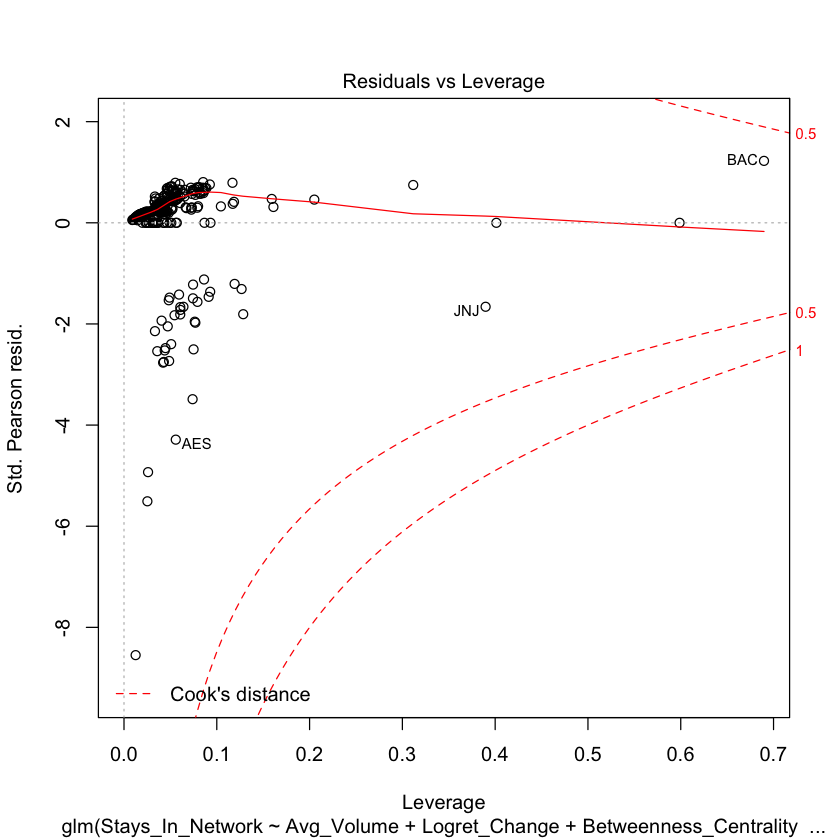

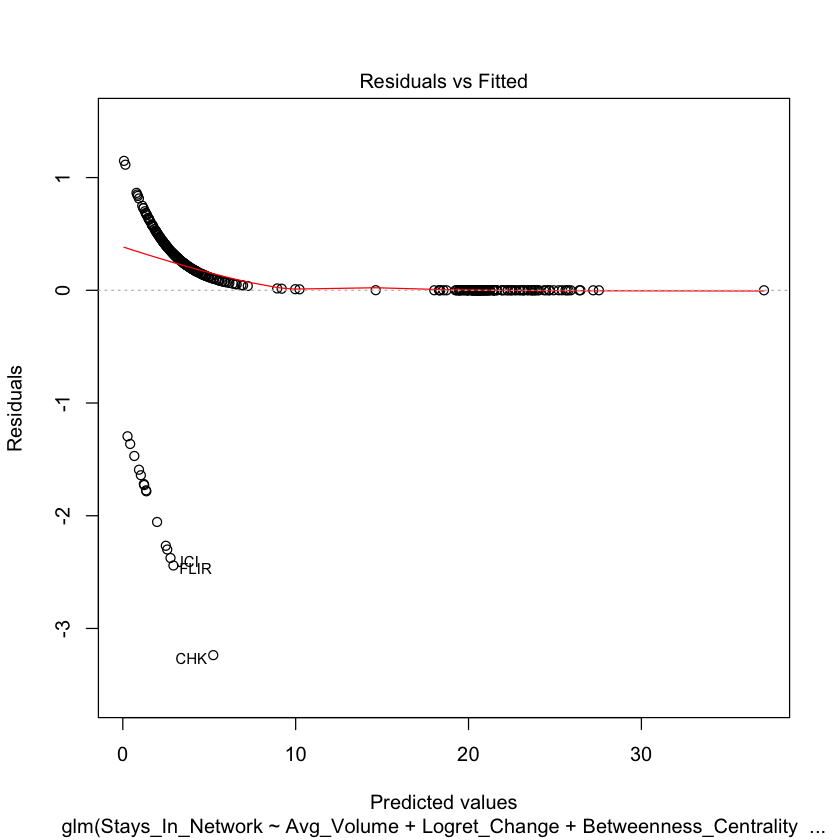

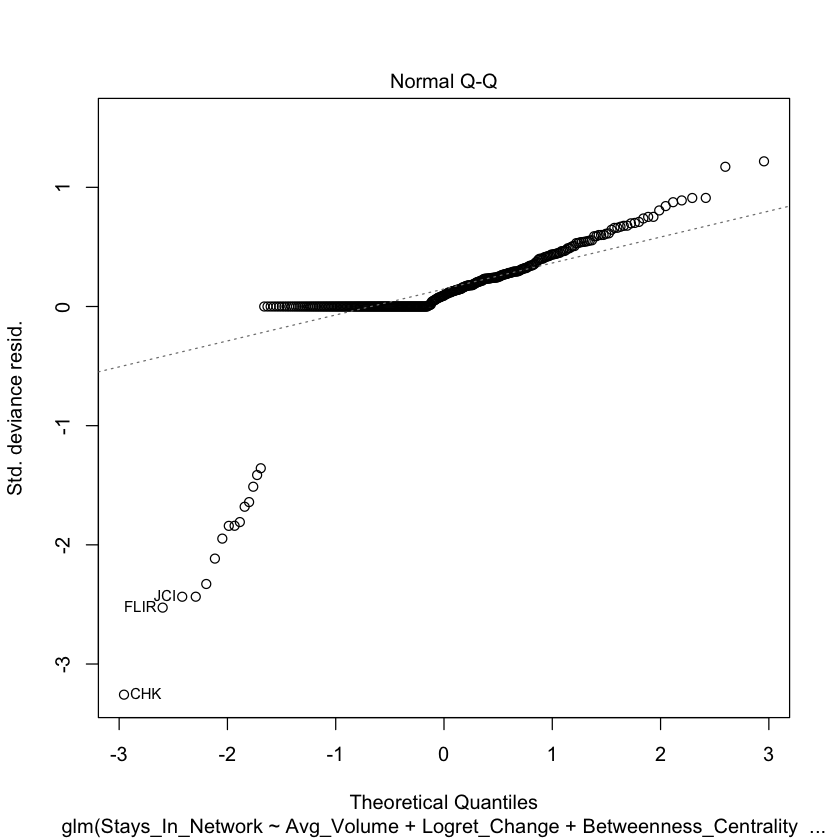

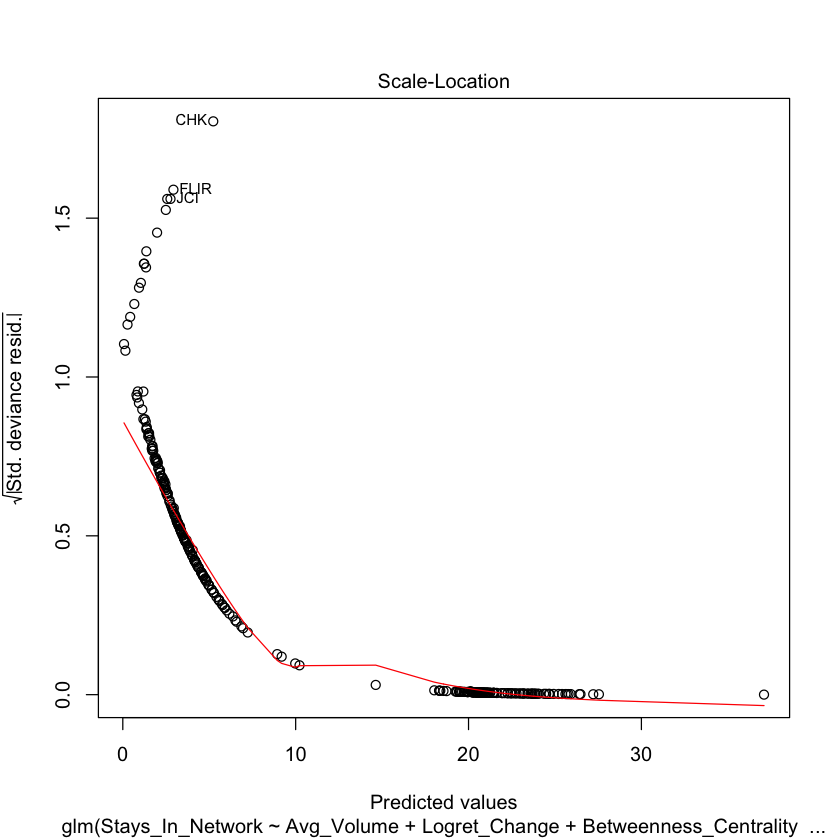

        llh     llhNull          G2    McFadden        r2ML        r2CU 
-43.2216834 -60.5468738  34.6503807   0.2861451   0.1026259   0.3257387 
                                     Overall
Avg_Volume                       1.266033896
Logret_Change                    2.163901678
Betweenness_Centrality           0.614322490
Eigenvector_Centrality           0.668892353
Clustering_Coefficient           0.864815488
SectorConsumer Staples           1.089353154
SectorEnergy                     1.741413559
SectorFinancials                 0.009121748
SectorHealth Care                1.456444157
SectorIndustrials                1.396449051
SectorInformation Technology     1.130387702
SectorMaterials                  0.004115267
SectorReal Estate                0.005588547
SectorTelecommunication Services 0.001353351
SectorUtilities                  0.005748991
[1] 8
Analysis of Deviance Table

Model: binomial, link: logit

Response: Stays_In_Network

Terms added sequentially (first to last)



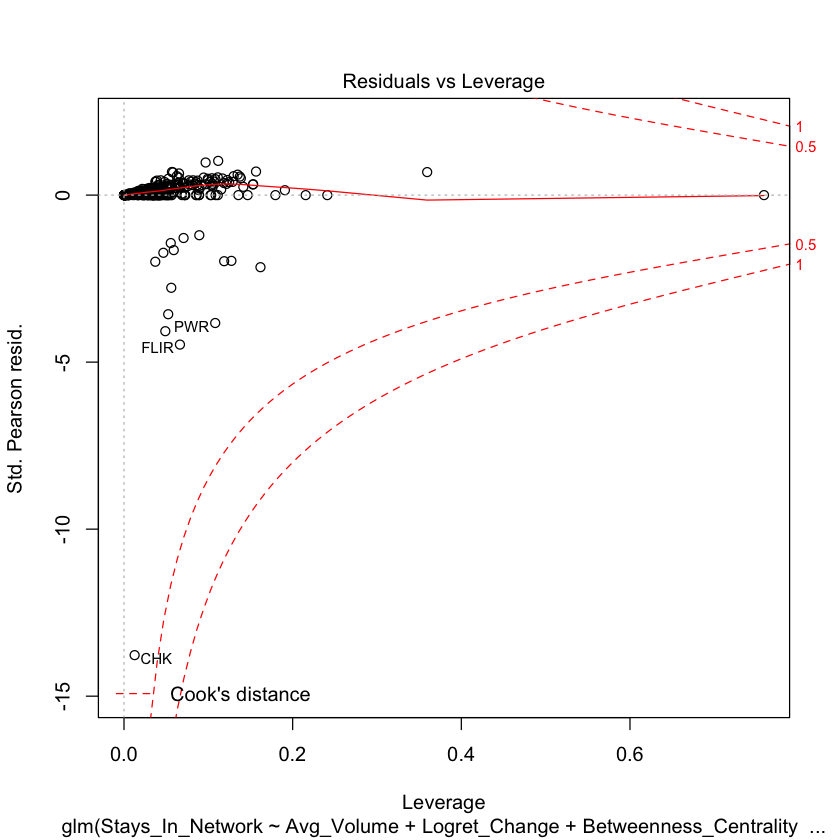

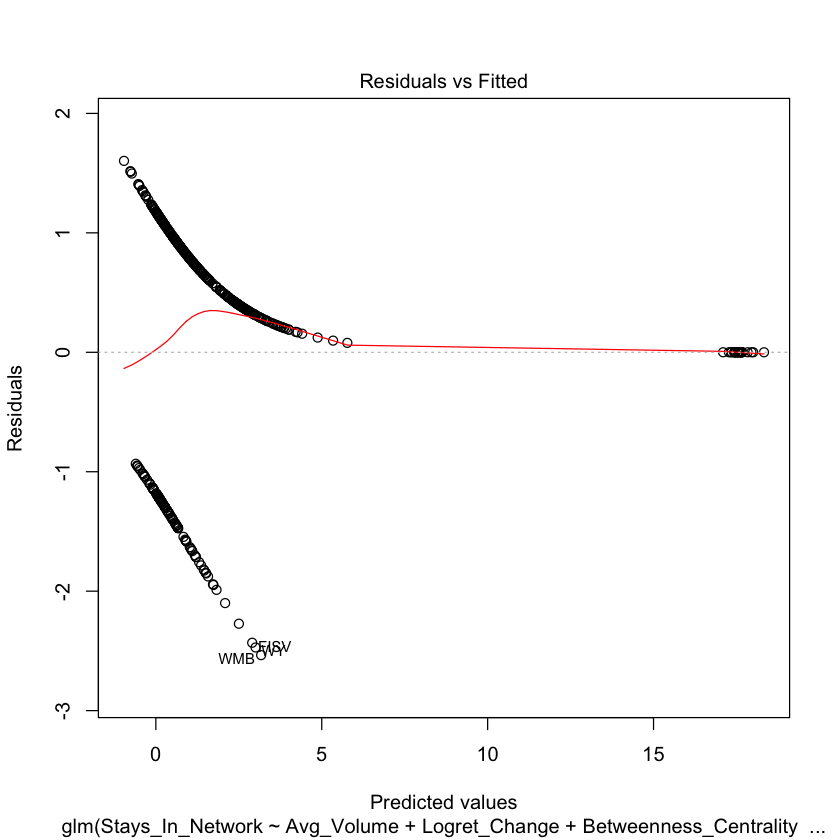

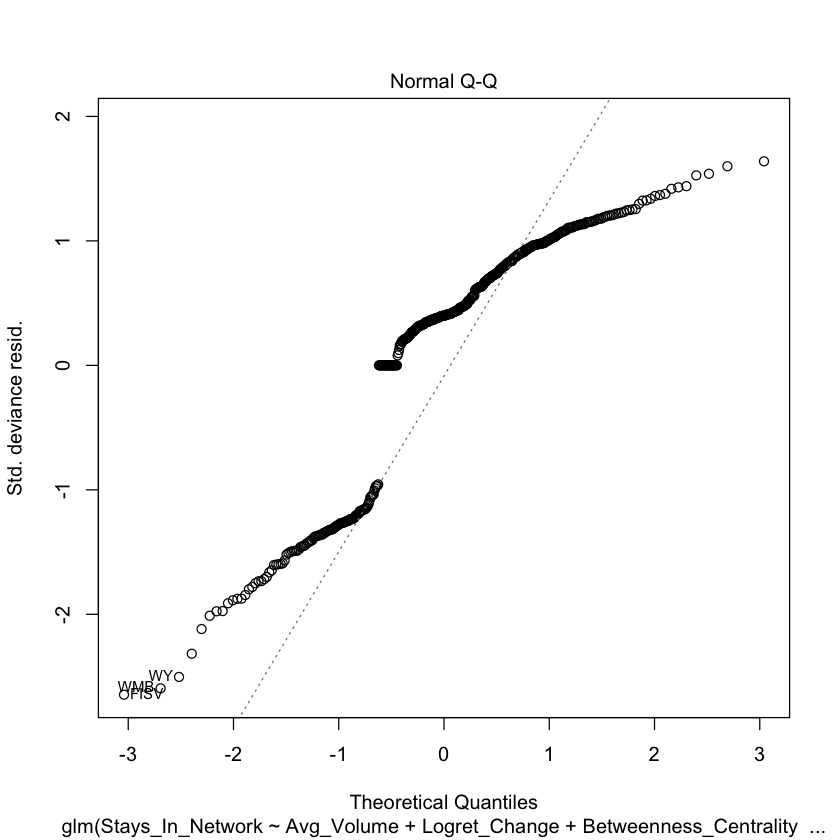

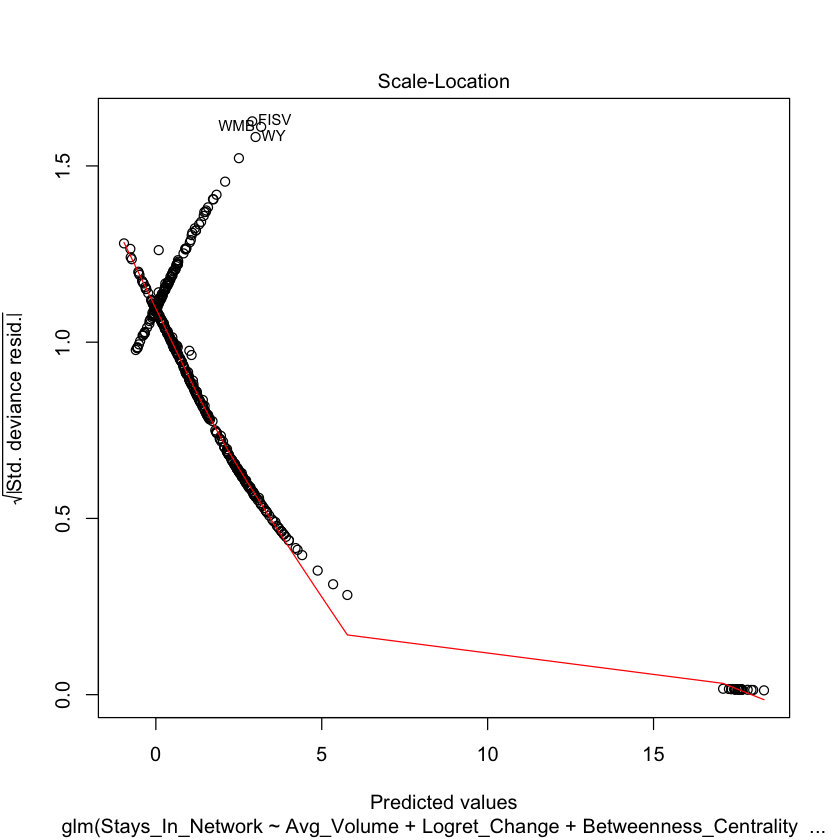

         llh      llhNull           G2     McFadden         r2ML         r2CU 
-200.5847772 -245.5061960   89.8428376    0.1829747    0.1913543    0.2786334 
                                   Overall
Avg_Volume                       0.5784698
Logret_Change                    2.2905596
Betweenness_Centrality           1.3511210
Eigenvector_Centrality           1.2199840
Clustering_Coefficient           0.9368719
SectorConsumer Staples           0.8151156
SectorEnergy                     2.8428242
SectorFinancials                 2.7690442
SectorHealth Care                0.5844686
SectorIndustrials                2.3344798
SectorInformation Technology     0.4137499
SectorMaterials                  0.8632797
SectorReal Estate                3.2699087
SectorTelecommunication Services 0.4304974
SectorUtilities                  0.0228606
[1] 9
Analysis of Deviance Table

Model: binomial, link: logit

Response: Stays_In_Network

Terms added sequentially (first to last)


                   

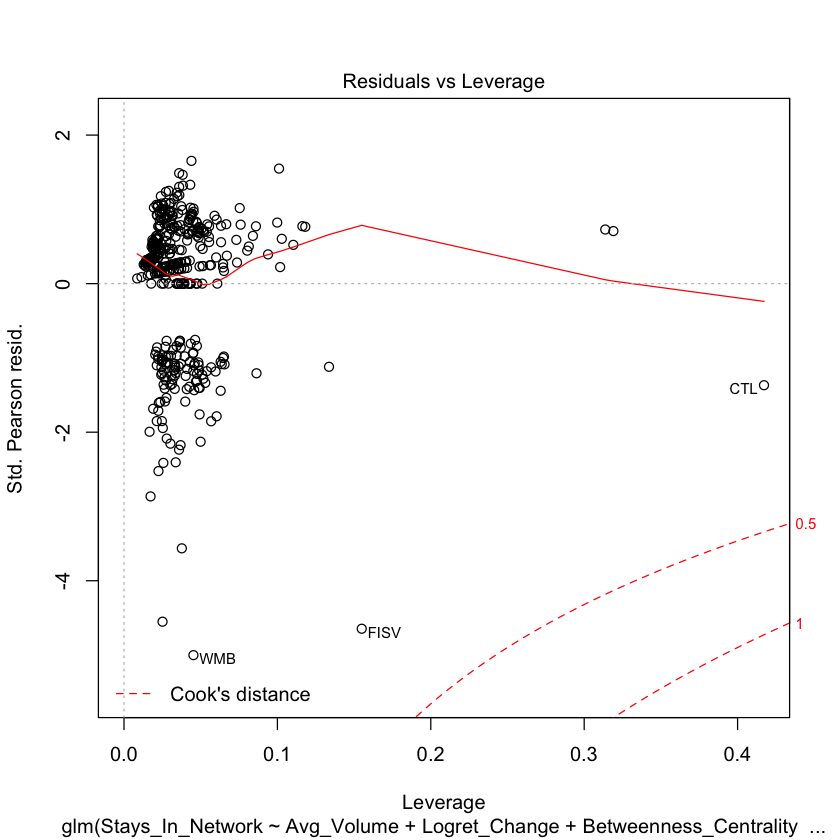

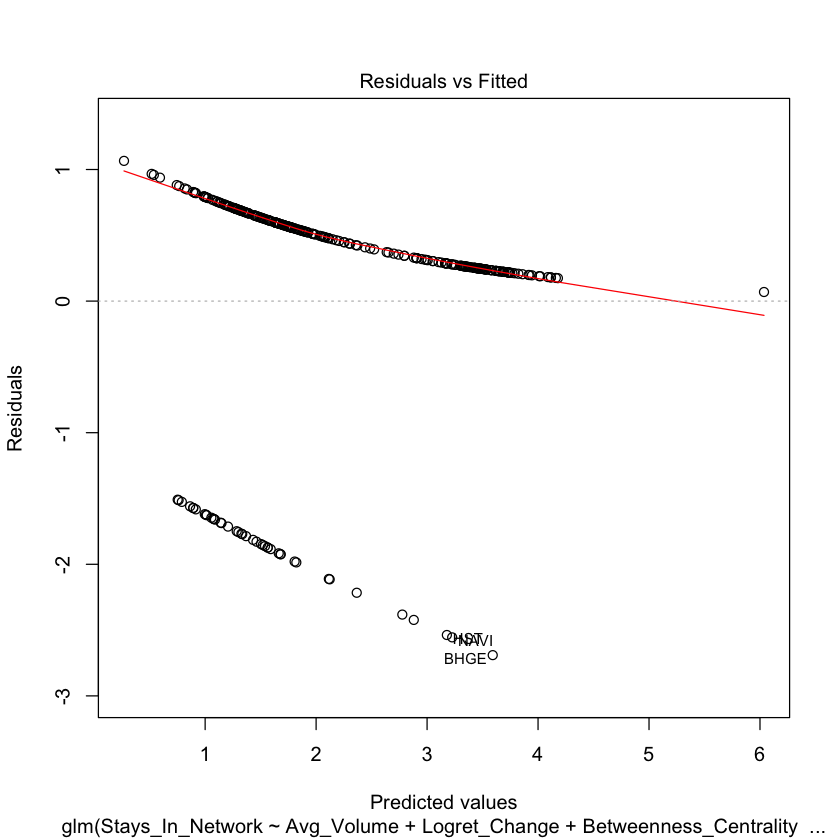

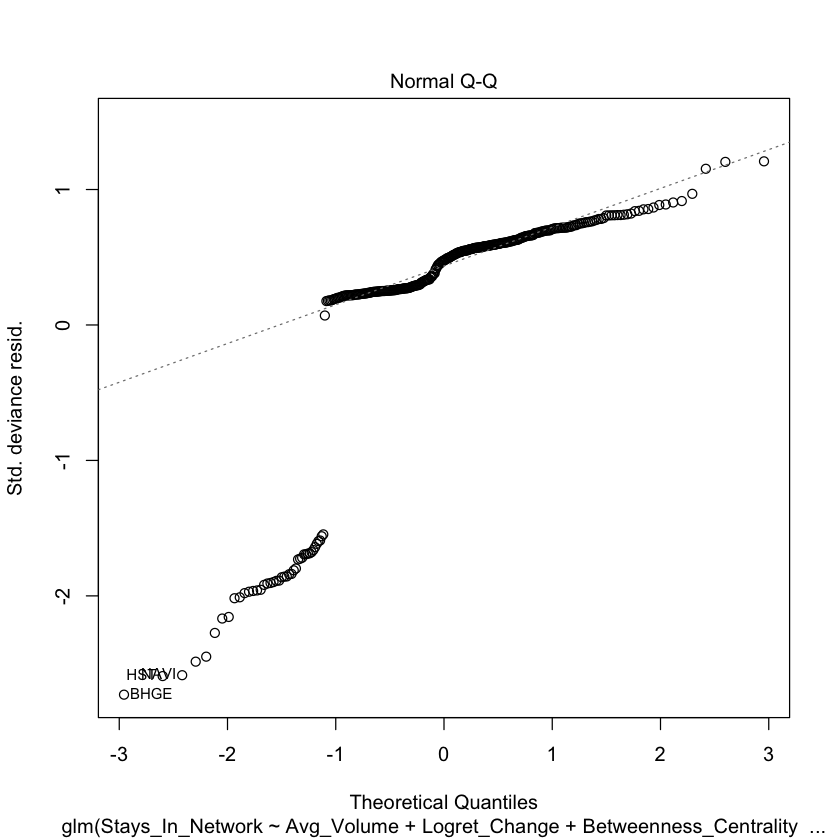

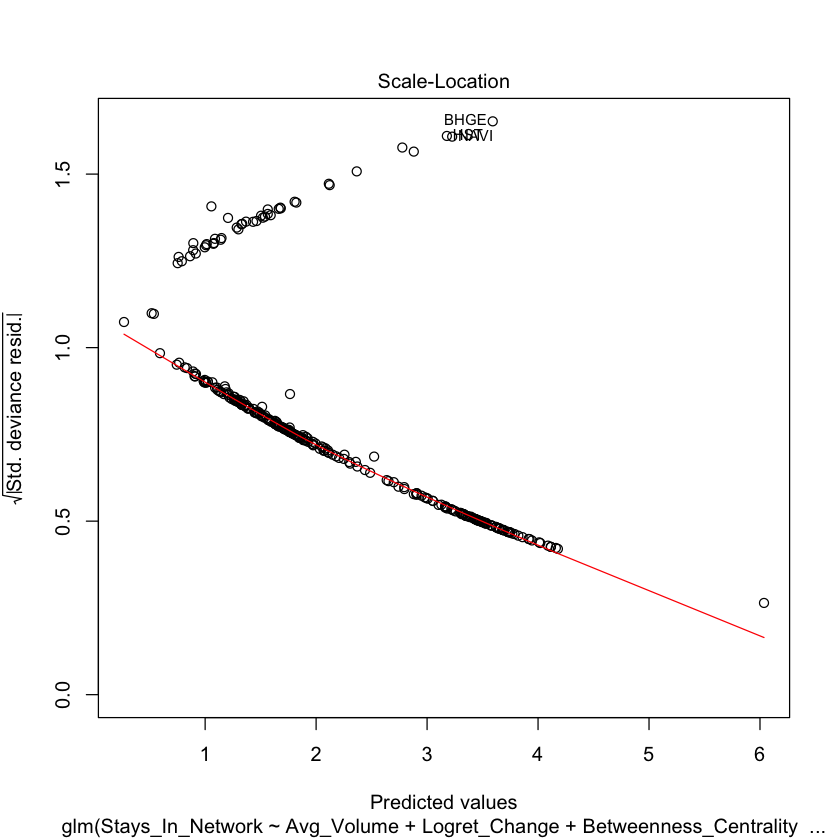

          llh       llhNull            G2      McFadden          r2ML 
-114.35580802 -126.42232594   24.13303584    0.09544610    0.07242423 
         r2CU 
   0.13286408 
                                    Overall
Avg_Volume                       0.87242999
Logret_Change                    1.14811136
Betweenness_Centrality           0.26479053
Eigenvector_Centrality           1.07079551
Clustering_Coefficient           0.49496845
SectorConsumer Staples           0.36791944
SectorEnergy                     1.37989898
SectorFinancials                 0.43738029
SectorHealth Care                0.49420864
SectorIndustrials                0.03301589
SectorInformation Technology     0.73861100
SectorMaterials                  0.37401305
SectorReal Estate                1.70202680
SectorTelecommunication Services 0.26150154
SectorUtilities                  0.44413851


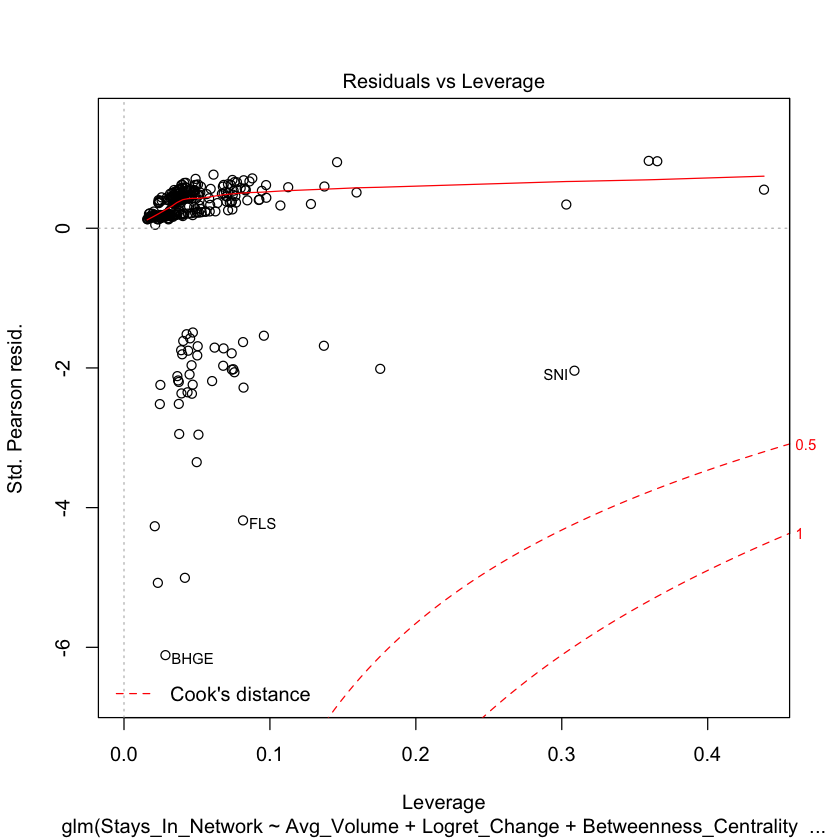

In [49]:
for (i in 1:length(logregs_all)) {
    print(i)
    print(anova(logregs_all[[i]], test="Chisq"))
    plot(logregs_all[[i]])


    library(pscl)
    print(pR2(logregs_all[[i]])) #McFadden pseudo R2

    print(varImp(logregs_all[[i]])) #variable importance
    
}